## Problem 1

## Context

### CNBE, a prominent news channel, is gearing up to provide insightful coverage of recent elections, recognizing the importance of data-driven analysis. A comprehensive survey has been conducted, capturing the perspectives of 1525 voters across various demographic and socio-economic factors. This dataset encompasses 9 variables, offering a rich source of information regarding voters' characteristics and preferences.

## Objective

### The primary objective is to leverage machine learning to build a predictive model capable of forecasting which political party a voter is likely to support. This predictive model, developed based on the provided information, will serve as the foundation for creating an exit poll. The exit poll aims to contribute to the accurate prediction of the overall election outcomes, including determining which party is likely to secure the majority of seats.

## Data Description: 

The dataset has 9 variables, including the name of the car and its various attributes like horsepower, weight, region of origin, etc. Missing values in the data are marked by a series of question marks.

A detailed description of the variables is given below.

System measures used:

1. **age:** in years
2. **economic.cond.national:** Assessment of current national economic conditions, 1 to 5.
3. **economic.cond.household:** Assessment of current household economic conditions, 1 to 5.
4. **Blair:** Assessment of the Labour leader, 1 to 5.
5. **Hague:** Assessment of the Conservative leader, 1 to 5.
6. **Europe:** an 11-point scale that measures respondents' attitudes toward European integration.   High scores represent ‘Eurosceptic’ sentiment.
7. **political.knowledge:** Knowledge of parties' positions on European integration, 0 to 3.
8. **gender:** female or male.

------------------------

 9. **vote**: Party choice: Conservative or Labour

### Part 1: Define the problem and perform exploratory Data Analysis

### Problem definition - Check shape, Data types, statistical summary - Univariate analysis - Multivariate analysis - Use appropriate visualizations to identify the patterns and insights - Key meaningful observations on individual variables and the relationship between variables

## Defining the Problem

The primary problem we aim to solve is to develop a predictive model that can forecast a voter's party support (Conservative or Labour) in an election. 

This prediction will be based on various factors like the voter's age, economic conditions, opinions on party leaders, views on European integration, political knowledge, and gender. 

The model will be used to create an exit poll for predicting overall election outcomes and determining which party is likely to secure the majority of seats.

## Import Libraries

In [1601]:
import numpy as np   
import pandas as pd
import os

import seaborn as sns
import matplotlib.pyplot as plt   
import matplotlib.style
plt.style.use('classic')

import warnings
warnings.filterwarnings("ignore")

## Load and explore the data

In [1602]:
cData = pd.read_excel('Election_Data.xlsx', sheet_name=1)
#cData = pd.read_excel("Election_Data.xlsx")

In [1603]:
# let's check the shape of the data
cData.shape

(1525, 10)

In [1604]:
# let's check the first 5 rows of the data
cData.head()

Unnamed: 0    vote  age  economic.cond.national  economic.cond.household  \
0           1  Labour   43                       3                        3   
1           2  Labour   36                       4                        4   
2           3  Labour   35                       4                        4   
3           4  Labour   24                       4                        2   
4           5  Labour   41                       2                        2   

   Blair  Hague  Europe  political.knowledge  gender  
0      4      1       2                    2  female  
1      4      4       5                    2    male  
2      5      2       3                    2    male  
3      2      1       4                    0  female  
4      1      1       6                    2    male

In [1605]:
# let's check column types and number of values
cData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               1525 non-null   int64 
 1   vote                     1525 non-null   object
 2   age                      1525 non-null   int64 
 3   economic.cond.national   1525 non-null   int64 
 4   economic.cond.household  1525 non-null   int64 
 5   Blair                    1525 non-null   int64 
 6   Hague                    1525 non-null   int64 
 7   Europe                   1525 non-null   int64 
 8   political.knowledge      1525 non-null   int64 
 9   gender                   1525 non-null   object
dtypes: int64(8), object(2)
memory usage: 119.3+ KB


* Most of the columns in the data are numeric in nature ('int64' type).
* The gender and vote columns are a string column ('object' type).

## Statistical Summary

In [1606]:
# let's check the statistical summary of the data
cData.describe().T

count        mean         std   min    25%    50%  \
Unnamed: 0               1525.0  763.000000  440.373894   1.0  382.0  763.0   
age                      1525.0   54.182295   15.711209  24.0   41.0   53.0   
economic.cond.national   1525.0    3.245902    0.880969   1.0    3.0    3.0   
economic.cond.household  1525.0    3.140328    0.929951   1.0    3.0    3.0   
Blair                    1525.0    3.334426    1.174824   1.0    2.0    4.0   
Hague                    1525.0    2.746885    1.230703   1.0    2.0    2.0   
Europe                   1525.0    6.728525    3.297538   1.0    4.0    6.0   
political.knowledge      1525.0    1.542295    1.083315   0.0    0.0    2.0   

                            75%     max  
Unnamed: 0               1144.0  1525.0  
age                        67.0    93.0  
economic.cond.national      4.0     5.0  
economic.cond.household     4.0     5.0  
Blair                       4.0     5.0  
Hague                       4.0     5.0  
Europe                     10.0    11.0  
political.knowledge         2.0     3.0

## Univariate Analysis - Discrete Numeric (Before Pre Processing)

In [1607]:
cData['vote'].value_counts()

Labour          1063
Conservative     462
Name: vote, dtype: int64

In [1608]:
cData['vote'].value_counts(1)

Labour          0.697049
Conservative    0.302951
Name: vote, dtype: float64

In [1609]:
cData['economic.cond.national'].value_counts()

3    607
4    542
2    257
5     82
1     37
Name: economic.cond.national, dtype: int64

In [1610]:
cData['economic.cond.household'].value_counts()

3    648
4    440
2    280
5     92
1     65
Name: economic.cond.household, dtype: int64

In [1611]:
cData['political.knowledge'].value_counts()

2    782
0    455
3    250
1     38
Name: political.knowledge, dtype: int64

In [1612]:
cData['Blair'].value_counts()

4    836
2    438
5    153
1     97
3      1
Name: Blair, dtype: int64

In [1613]:
cData['Hague'].value_counts()

2    624
4    558
1    233
5     73
3     37
Name: Hague, dtype: int64

In [1614]:
cData['Europe'].value_counts()

11    338
6     209
3     129
4     127
5     124
8     112
9     111
1     109
10    101
7      86
2      79
Name: Europe, dtype: int64

In [1615]:
cData_num = cData[('age')].reset_index()

In [1616]:
cData_num.head()

index  age
0      0   43
1      1   36
2      2   35
3      3   24
4      4   41

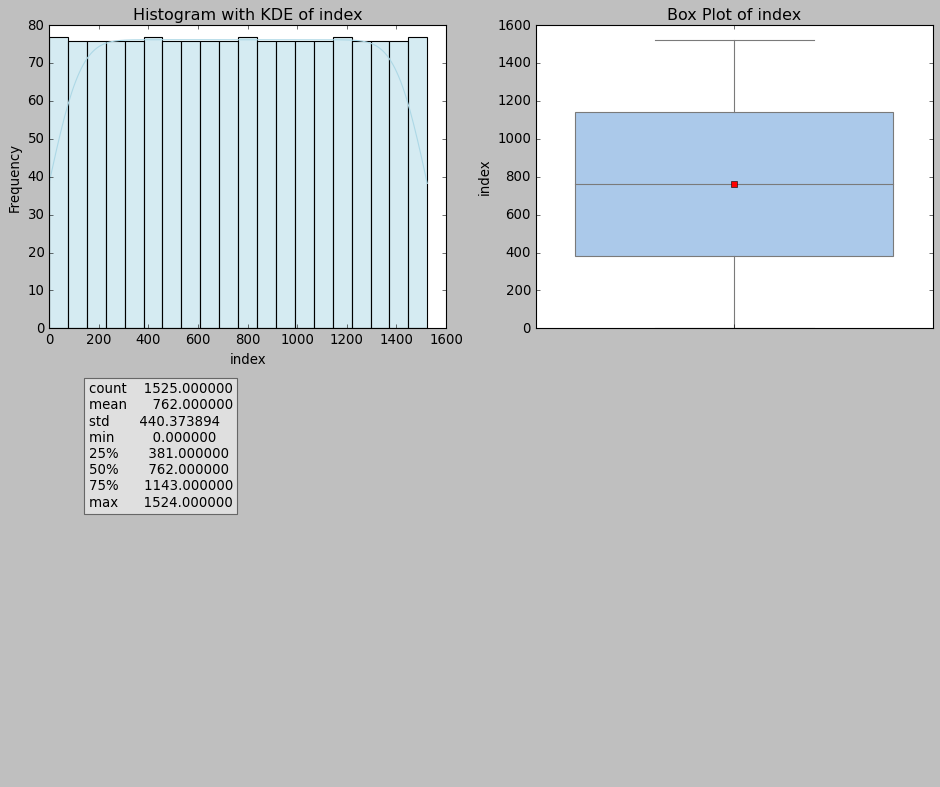

-------------------------------------------


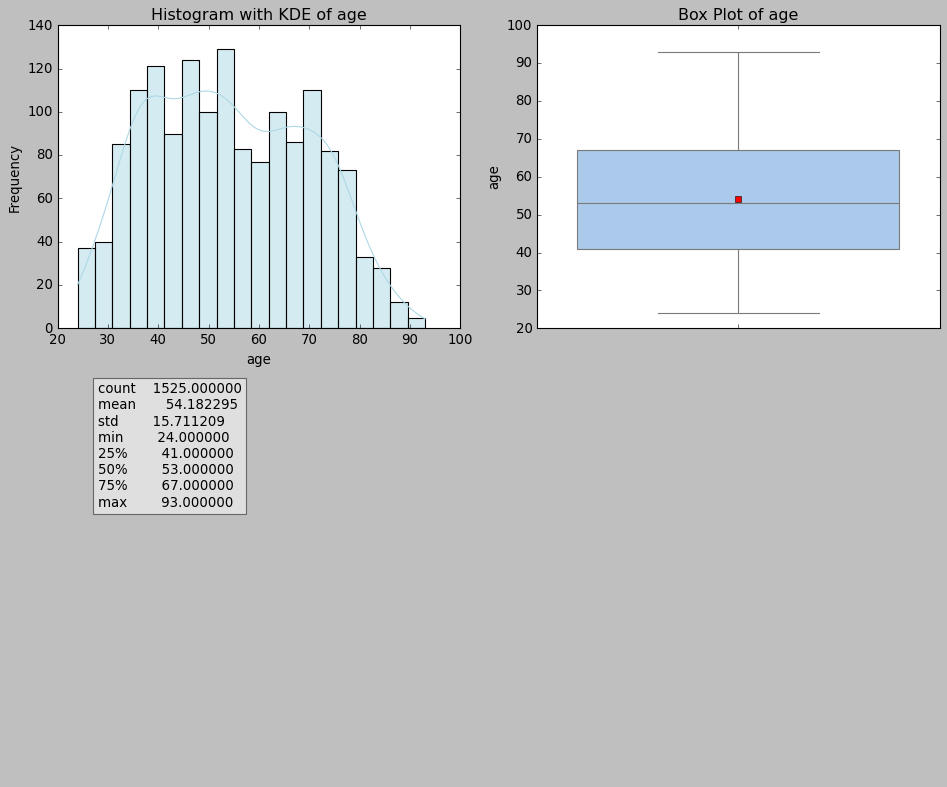

-------------------------------------------


In [1617]:
# Create a grid layout for the subplots
num_cols = 3
num_rows = (len(cData_num.columns) + 2) // num_cols

# Loop through each column and create histogram and box plot side by side
for i, column in enumerate(cData_num.columns):
    # Create a new figure for each set of plots
    plt.figure(figsize=(18, 10))
    
    # Plot Histogram (subplot 1)
    plt.subplot(2, 3, 1)
    sns.histplot(cData_num[column], bins=20, color='lightblue', palette='pastel', kde=True)
    plt.title(f"Histogram with KDE of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    
    # Plot Box Plot (subplot 2)
    plt.subplot(2, 3, 2)
    sns.boxplot(data=cData_num, y=column, color='lightblue', palette='pastel', showmeans=True)
    plt.title(f"Box Plot of {column}")
    plt.ylabel(column)
    
    # Add the statistical summary as a text box below the plots
    summary_text = cData_num[column].describe().to_string()
    plt.subplot(2, 3, 4)
    plt.text(0.1, 0.9, summary_text, transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))
    plt.axis('off')  # Hide axes for the text box
    
    # Adjust spacing between subplots
    plt.tight_layout()
    
    # Show the plots
    plt.show()
    
    print("-------------------------------------------")

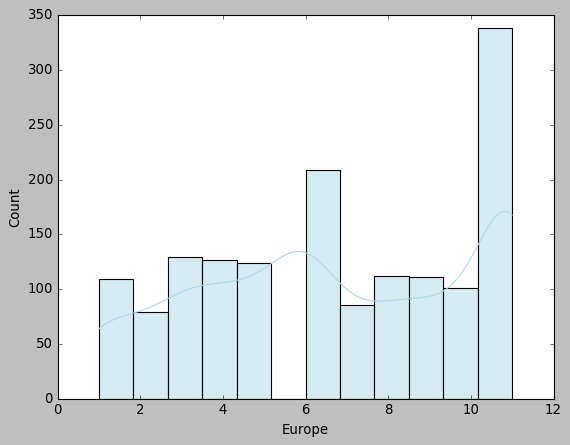

In [1618]:
sns.histplot(cData, x='Europe', kde=True, color='lightblue', palette='pastel');

In [1619]:
skewness = cData['Europe'].skew()
print("Skewness of the 'Europe' column:", skewness)

Skewness of the 'Europe' column: -0.13594670991422228


#### Insights

The skewness of the 'Europe' column in the dataset is approximately -0.136. This indicates a slight left skew in the distribution of attitudes towards European integration. In practical terms, this means that the distribution has a slightly longer tail on the left side, suggesting a minor concentration of responses in the lower end of the scale, which represents more pro-European sentiments. However, the value being close to zero also suggests that the overall distribution is fairly symmetric. 

In [1620]:
# To perform univariate analysis we make 2 separate sub dataframes of Categorical and Numerical Variables
cData_cat = cData.drop(['Unnamed: 0', 'age', 'Europe'], axis=1)

Column: vote


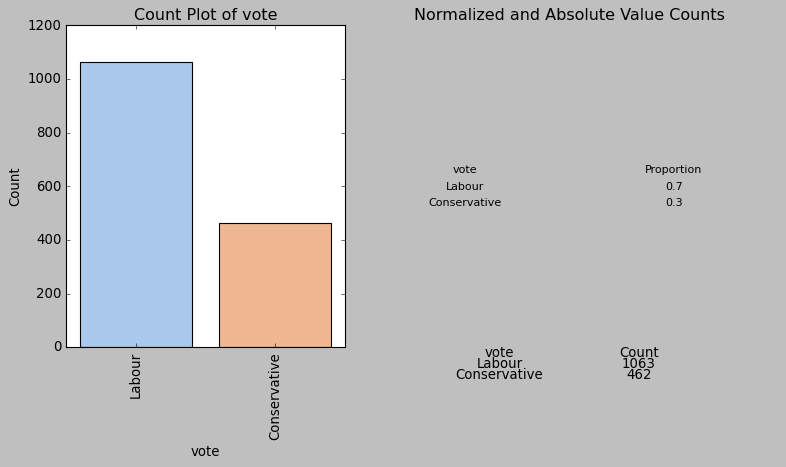

-------------------------------------------
Column: economic.cond.national


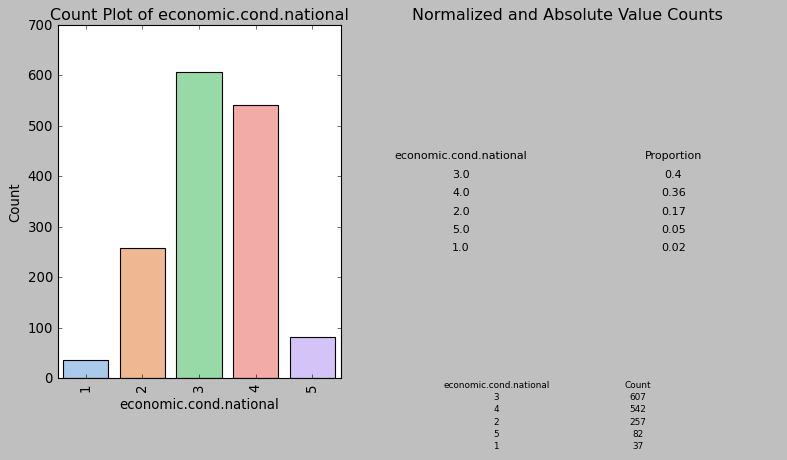

-------------------------------------------
Column: economic.cond.household


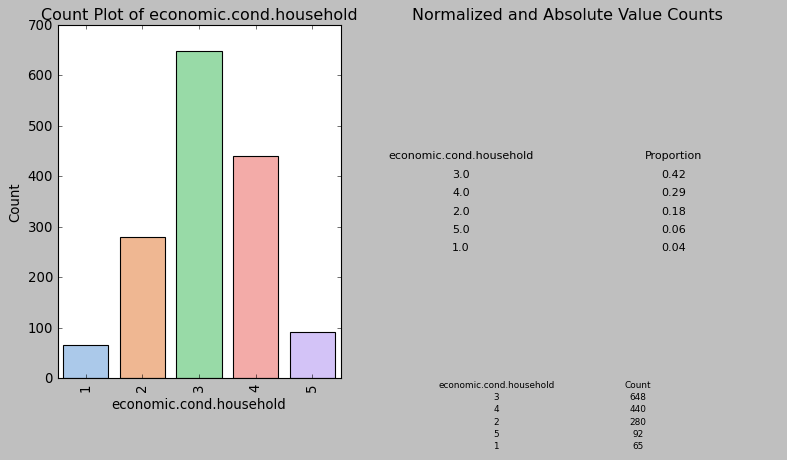

-------------------------------------------
Column: Blair


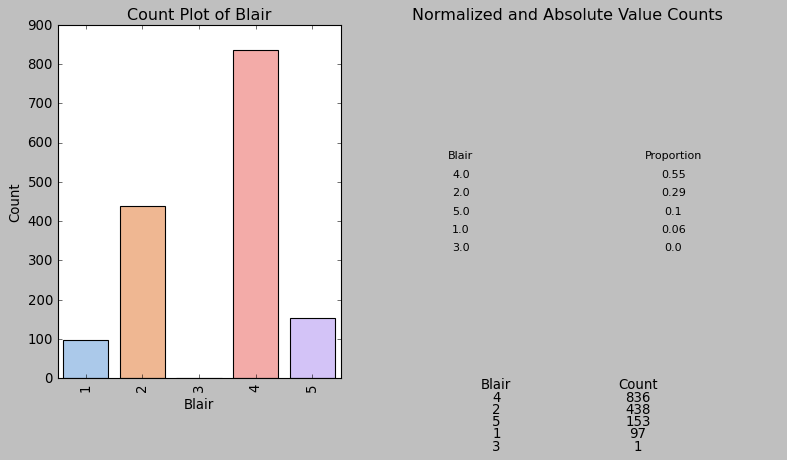

-------------------------------------------
Column: Hague


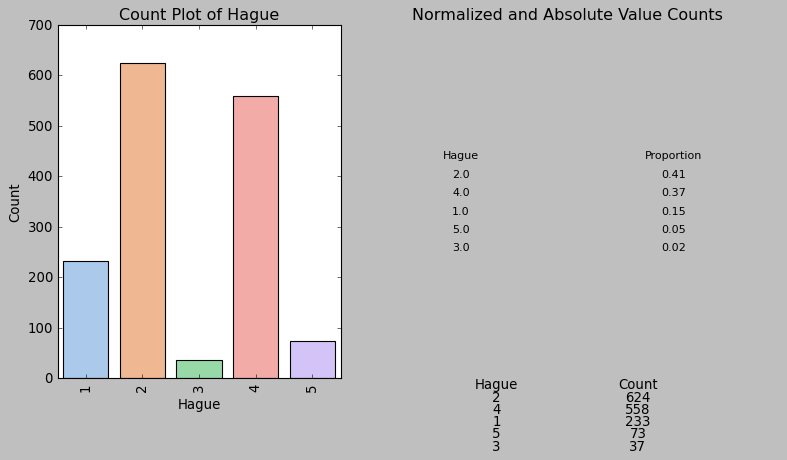

-------------------------------------------
Column: political.knowledge


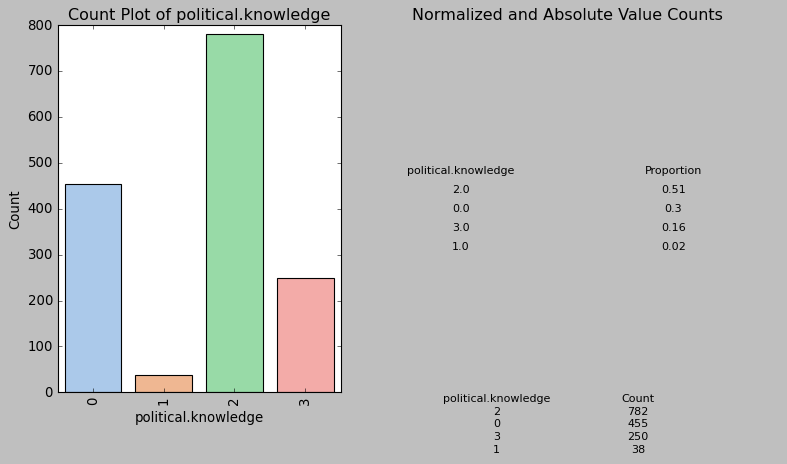

-------------------------------------------
Column: gender


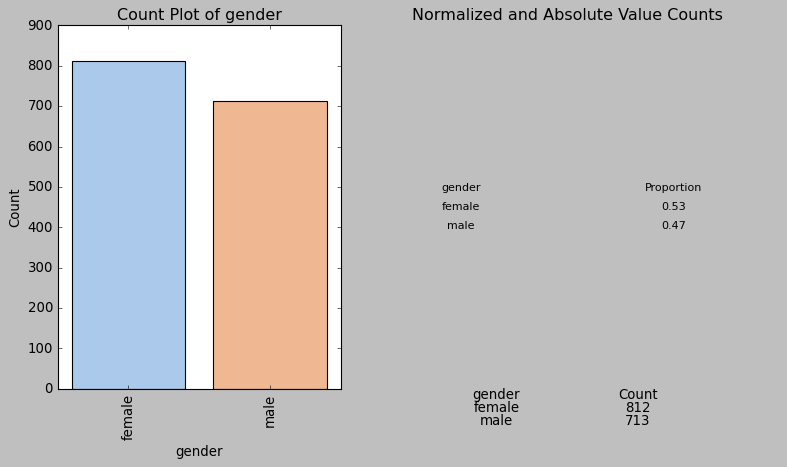

-------------------------------------------


In [1621]:
# List of column names in the DataFrame
columns_list = cData_cat.columns

# Loop through each column and perform univariate analysis
for column in columns_list:
    print("Column:", column)
    
    # Create a new figure for each plot
    plt.figure(figsize=(10, 6))
    
    # Plot Count Plot on the left side
    plt.subplot(1, 2, 1)
    sns.countplot(data=cData_cat, x=column, color='lightblue', palette='pastel')
    plt.title(f"Count Plot of {column}")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
    
    # Calculate normalized value count
    value_counts_normalized = cData_cat[column].value_counts(normalize=True).reset_index()
    value_counts_normalized.columns = [column, 'Proportion']
    
    # Round 'Proportion' to two decimal places
    value_counts_normalized['Proportion'] = value_counts_normalized['Proportion'].round(2)
    
    # Calculate absolute value count
    value_counts_absolute = cData_cat[column].value_counts().reset_index()
    value_counts_absolute.columns = [column, 'Count']
    
    # Display Normalized Value Counts as a Table on the right side
    plt.subplot(1, 2, 2)
    plt.axis('off')  # Hide axes for the table
    table_normalized = plt.table(cellText=value_counts_normalized.values, colLabels=value_counts_normalized.columns,
                                 cellLoc='center', loc='center', edges='open')
    table_normalized.auto_set_font_size(False)
    table_normalized.set_fontsize(10)
    table_normalized.scale(1.5, 1.5)
    plt.title("Normalized and Absolute Value Counts")
    
    # Display Absolute Value Counts as a Table below the normalized value counts table
    plt.table(cellText=value_counts_absolute.values, colLabels=value_counts_absolute.columns,
              cellLoc='center', loc='bottom', edges='open')
    
    # Adjust spacing between subplots
    plt.tight_layout()
    
    # Show the plot
    plt.show()
    
    print("-------------------------------------------")

## Multivariate Analysis - Continuous (before Data PreProcessing)

In [1622]:
# Assuming cData is a pandas DataFrame and has been loaded correctly
corr = cData.corr()

# Rounding the correlation matrix to two decimal places
corr_rounded = corr.round(2)

# Display the rounded correlation matrix
corr_rounded


Unnamed: 0   age  economic.cond.national  \
Unnamed: 0                     1.00  0.01                    0.07   
age                            0.01  1.00                    0.02   
economic.cond.national         0.07  0.02                    1.00   
economic.cond.household        0.04 -0.04                    0.35   
Blair                          0.00  0.03                    0.33   
Hague                          0.00  0.03                   -0.20   
Europe                         0.04  0.07                   -0.21   
political.knowledge            0.00 -0.05                   -0.02   

                         economic.cond.household  Blair  Hague  Europe  \
Unnamed: 0                                  0.04   0.00   0.00    0.04   
age                                        -0.04   0.03   0.03    0.07   
economic.cond.national                      0.35   0.33  -0.20   -0.21   
economic.cond.household                     1.00   0.22  -0.10   -0.11   
Blair                                       0.22   1.00  -0.24   -0.30   
Hague                                      -0.10  -0.24   1.00    0.29   
Europe                                     -0.11  -0.30   0.29    1.00   
political.knowledge                        -0.04  -0.02  -0.03   -0.15   

                         political.knowledge  
Unnamed: 0                              0.00  
age                                    -0.05  
economic.cond.national                 -0.02  
economic.cond.household                -0.04  
Blair                                  -0.02  
Hague                                  -0.03  
Europe                                 -0.15  
political.knowledge                     1.00

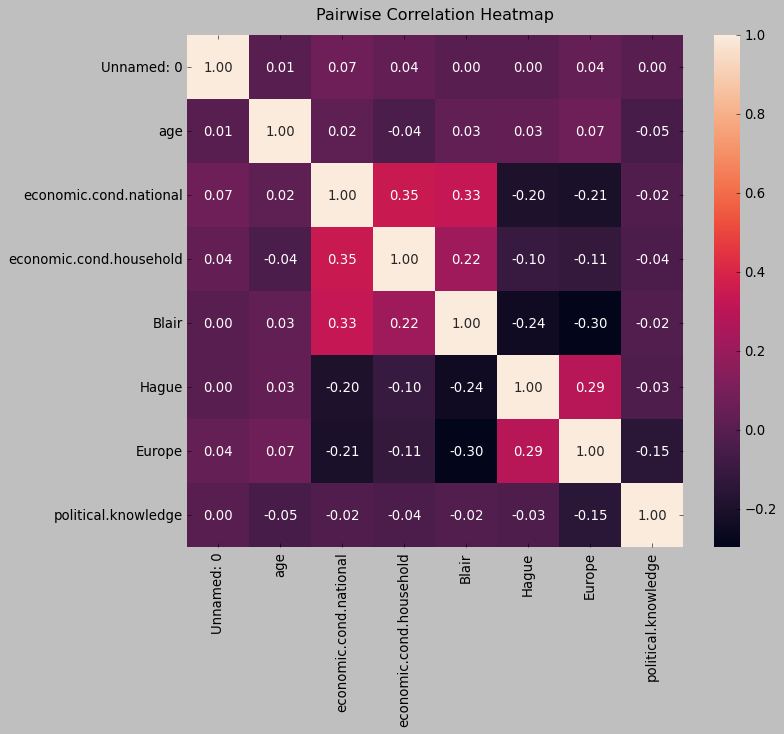

In [1623]:
#create the heatmap
plt.figure(figsize=(10, 8))  # You can adjust the size as needed
heatmap = sns.heatmap(corr, annot=True, fmt=".2f")

# Adding a title to the heatmap
plt.title('Pairwise Correlation Heatmap', y=1.02)

# Display the plot
plt.show()


## Insights from Correlation Matrix and Heatmap 

### Economic Conditions vs European Integration Sentiment Ratings

The negative correlation between economic conditions (both national and household) and Europe ratings indicates an interesting relationship between voters' perceptions of economic conditions and their views on European integration:

Negative Correlation with Economic Conditions: This negative correlation suggests that as the rating for economic conditions (whether national or household) increases (meaning better economic conditions), the Europe score tends to decrease (indicating less Euroscepticism). Essentially, voters who perceive the economy as doing well are more likely to have favorable views towards European integration, or at least are less Eurosceptic.

Interpretation of Economic Prosperity and European Integration: This relationship could imply that voters associate economic prosperity or stability with positive aspects of European integration. It might reflect a belief that a stronger economy is either a result of or conducive to closer European ties. Alternatively, when the economy is perceived as struggling, voters might attribute this to European integration or become more Eurosceptic.

Impact on Political Narratives: The correlation can also provide insights into political narratives and strategies. Political parties or leaders advocating for stronger European integration might be perceived more favorably in times of economic prosperity, while those advocating for less integration or a more Eurosceptic approach might gain more traction during economic downturns.

This correlation is crucial for understanding the dynamics between economic perceptions and attitudes towards European policies. It suggests that economic performance and views on European integration are interlinked in the minds of voters, influencing their political opinions and potentially their voting behavior.


### Economic Conditions vs Leader Ratings

The positive correlation between economic conditions (both national and household) and Blair ratings, contrasted with the negative correlation between economic conditions and Hague ratings, provides insightful observations about voter perceptions:

Positive Correlation with Blair Ratings: A positive correlation between economic conditions and Blair ratings suggests that voters who view the national or their household economic conditions more favorably also tend to have a higher opinion of Blair, the Labour leader. This could imply that when voters perceive the economy as doing well, they attribute some of this success to the Labour leader. This relationship is common in politics where the ruling party or its leaders often receive credit for good economic performance.

Negative Correlation with Hague Ratings: Conversely, a negative correlation between economic conditions and Hague ratings indicates that voters who view the economy (national or household) more favorably tend to rate Hague, the Conservative leader, lower. This could suggest that when voters perceive economic conditions positively, they are less inclined to view the opposition leader favorably. This might reflect a belief that the opposition leader is not responsible for the positive economic conditions or a general satisfaction with the current ruling party (Labour in this context), reducing the appeal of the opposition.

These correlations reveal how economic perceptions can influence political leader ratings differently depending on whether the leader is from the ruling party or the opposition. Voters tend to credit the ruling party's leaders for good economic conditions and view opposition leaders less favorably when they perceive the economy to be doing well. This phenomenon underscores the importance of economic conditions as a factor in political support and leader perception.

### European Integration Sentiment vs Leader Ratings

The positive correlation between Europe (attitudes towards European integration) and Hague ratings, in contrast to the negative correlation between Europe and Blair ratings, sheds light on how voters' views on European integration are associated with their perceptions of the Conservative and Labour leaders:

Positive Correlation with Hague Ratings: A positive correlation between Europe scores and Hague ratings indicates that voters with more Eurosceptic views (higher scores on the Europe scale) tend to rate Hague, the Conservative leader, more favorably. This suggests that Hague may be perceived as more aligned with Eurosceptic views, or that voters who are skeptical of European integration find his policies or stance more appealing.

Negative Correlation with Blair Ratings: Conversely, a negative correlation between Europe scores and Blair ratings implies that as Euroscepticism increases (higher Europe scores), the favorability towards Blair, the Labour leader, decreases. This could mean that Blair is perceived as less favorable by those who are skeptical of European integration, possibly due to his policies or positions being viewed as more pro-European.

These correlations highlight a clear partisan divide in attitudes towards European integration and its impact on leader perception. Eurosceptic voters appear to lean more towards the Conservative leader, while those less skeptical of European integration seem to favor the Labour leader. This suggests that attitudes towards European integration are a significant factor in shaping political preferences and leader ratings in this context.


In [1624]:
cData.columns

Index(['Unnamed: 0', 'vote', 'age', 'economic.cond.national',
       'economic.cond.household', 'Blair', 'Hague', 'Europe',
       'political.knowledge', 'gender'],
      dtype='object')

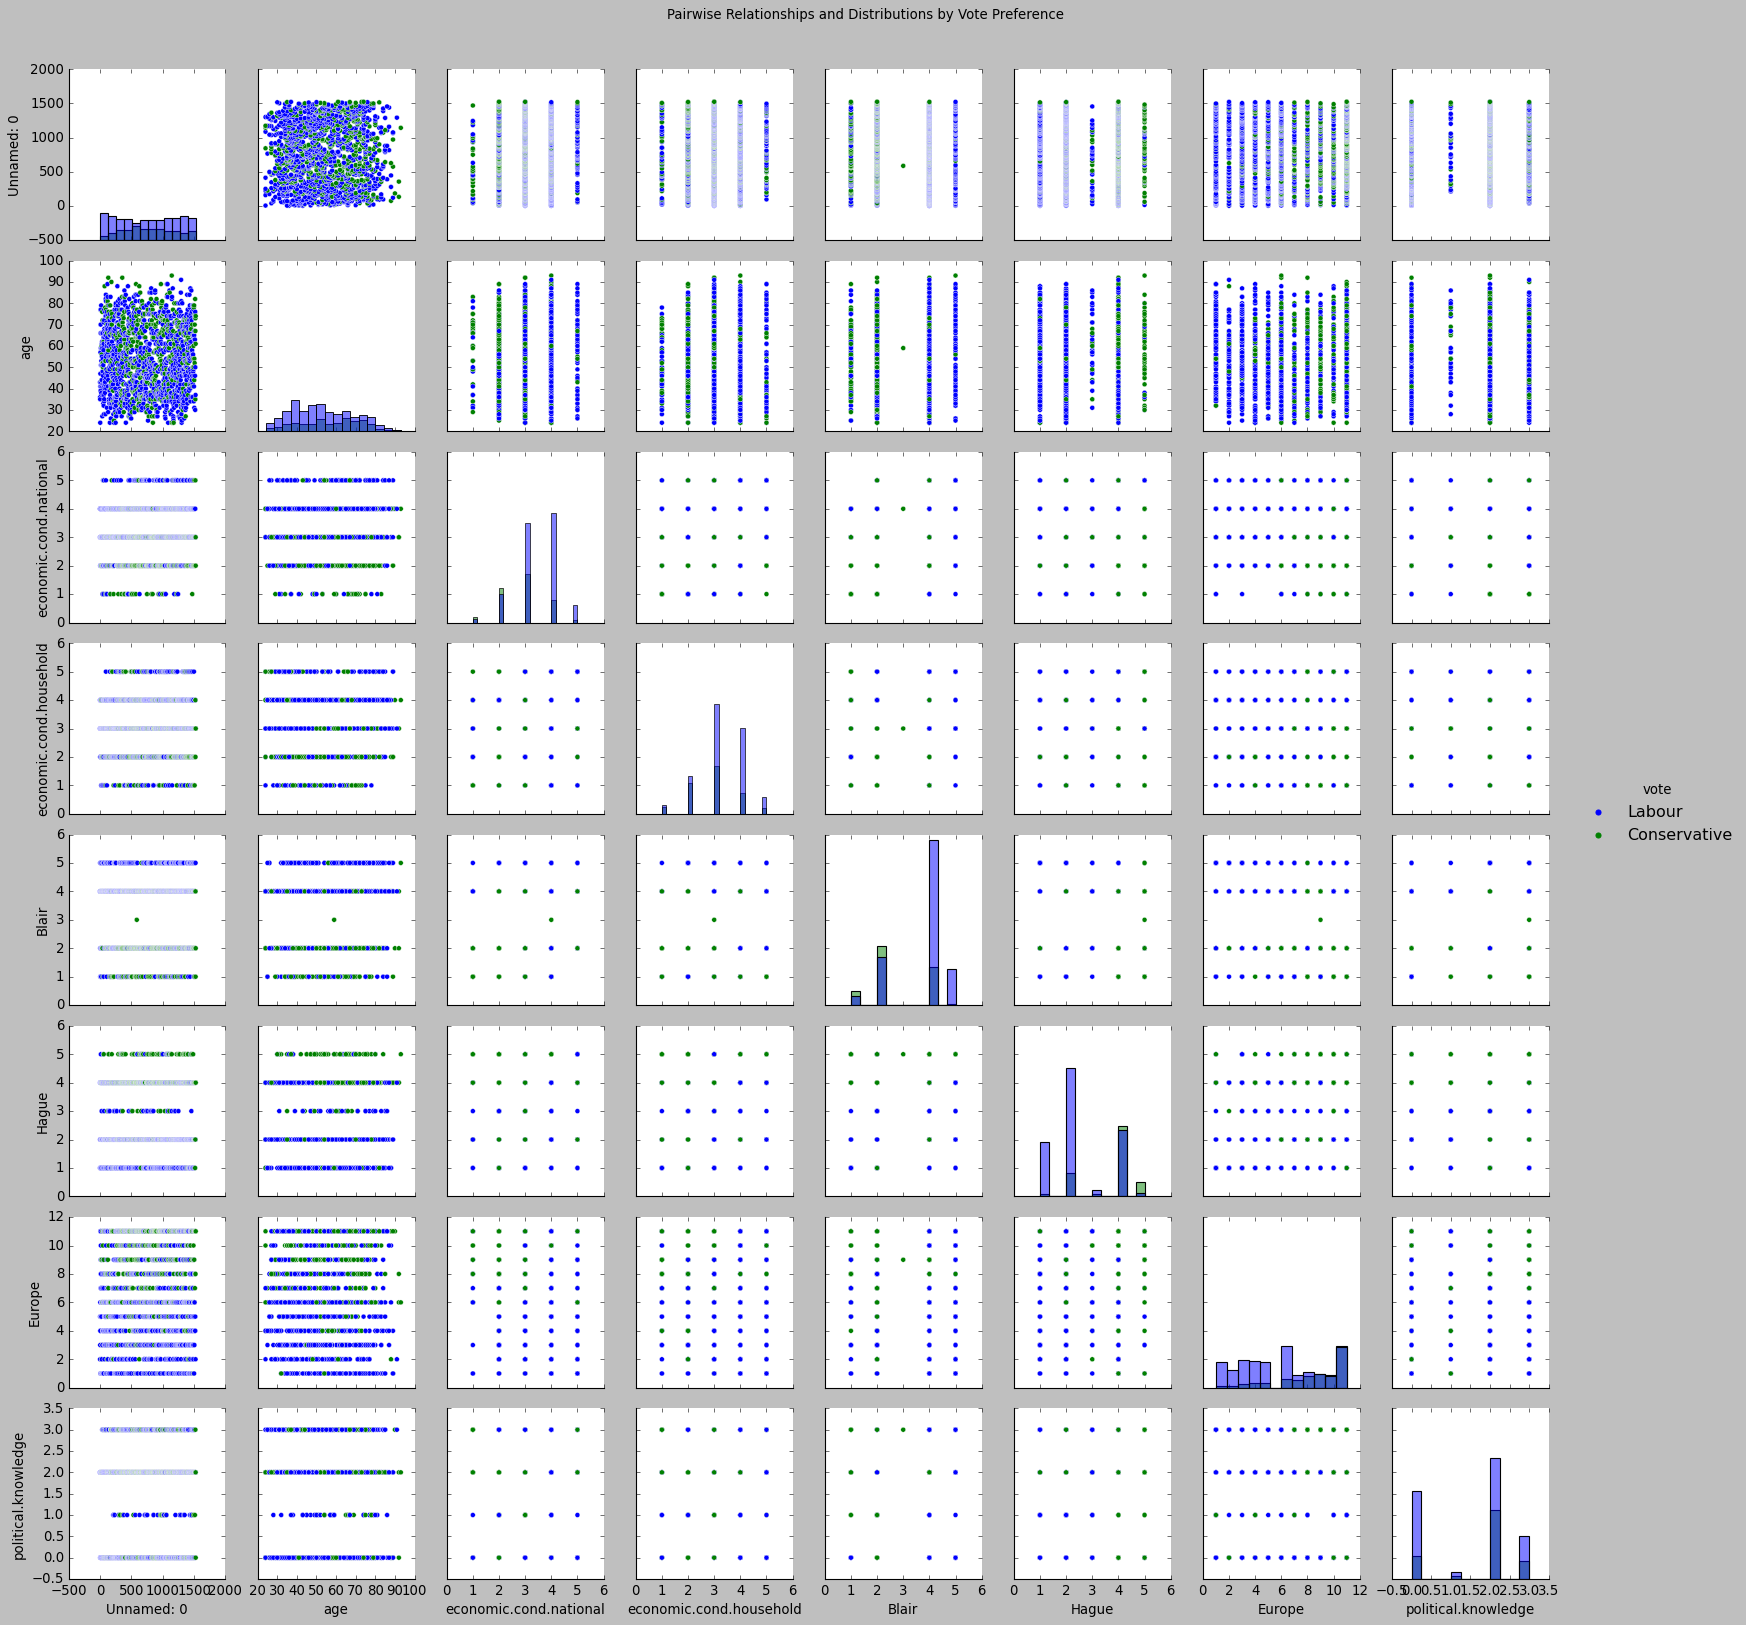

In [1625]:
# Creating a pairplot for the dataset with histogram on the diagonal and colored by vote
pairplot = sns.pairplot(cData, diag_kind='hist', hue='vote')

# Adding a title to the pairplot
pairplot.fig.suptitle('Pairwise Relationships and Distributions by Vote Preference', y=1.02)

# Display the plot
plt.show()


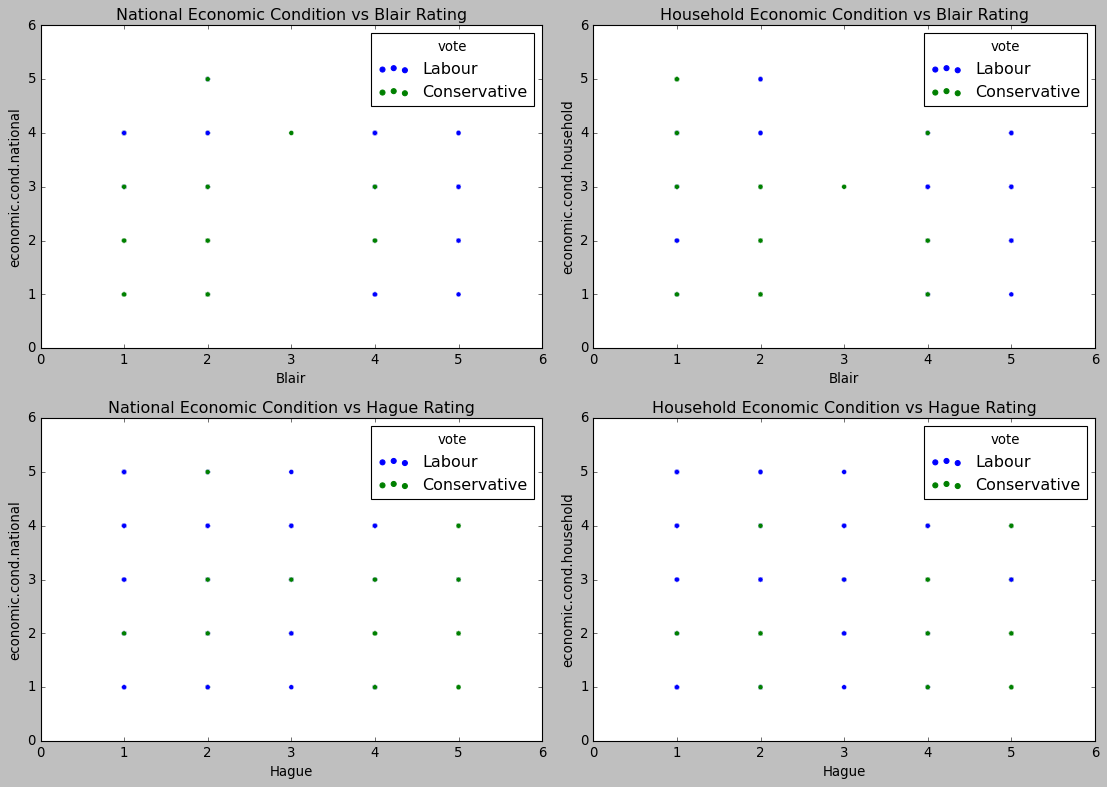

In [1626]:
# Setting up the matplotlib figure with 2 rows and 2 columns
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Creating scatterplots and assigning them to the appropriate subplot
sns.scatterplot(data=cData, y='economic.cond.national', x='Blair', hue='vote', ax=axes[0, 0])
axes[0, 0].set_title('National Economic Condition vs Blair Rating')

sns.scatterplot(data=cData, y='economic.cond.household', x='Blair', hue='vote', ax=axes[0, 1])
axes[0, 1].set_title('Household Economic Condition vs Blair Rating')

sns.scatterplot(data=cData, y='economic.cond.national', x='Hague', hue='vote', ax=axes[1, 0])
axes[1, 0].set_title('National Economic Condition vs Hague Rating')

sns.scatterplot(data=cData, y='economic.cond.household', x='Hague', hue='vote', ax=axes[1, 1])
axes[1, 1].set_title('Household Economic Condition vs Hague Rating')

# Display the plots with a tight layout
plt.tight_layout()
plt.show()


### Insights

### The scatter plots comparing national economic condition ratings with Blair and Hague ratings, differentiated by vote preference, reveal distinct patterns for each leader. Here are the key differences in insights based on the two plots:

1. Association with Economic Conditions:

Blair: For Blair, there is a more pronounced positive correlation among Labour voters, where higher ratings for Blair are often associated with more favorable views of the national economic conditions. This suggests that Labour voters who view Blair favorably are likely to perceive the economy positively.

Hague: In contrast, the correlation for Hague among Conservative voters is also positive but shows a different pattern. While higher ratings for Hague tend to correspond with more favorable views of the economy among Conservative voters, the association is less straightforward among Labour voters.

2. Partisan Differences:

Blair: The scatter plot for Blair highlights a clearer partisan divide. Labour voters' views on the economy improve with higher ratings for Blair, while Conservative voters show a more varied pattern, with no clear trend associating their economic ratings with their views on Blair.

Hague: The scatter plot for Hague shows that Conservative voters who rate Hague highly also tend to view the economy more positively. However, Labour voters demonstrate a scattered pattern, indicating less direct association between their economic views and their perception of Hague.

3. Variability and Clustering:

Blair: The plot for Blair shows a more clustered pattern, especially among Labour voters, indicating a more uniform perception among them linking Blair's ratings with economic conditions.

Hague: The plot for Hague exhibits more variability, particularly among Labour voters, suggesting a broader range of opinions on the economy independent of their views on the Conservative leader.

4. Outliers and Extremes:

Both plots exhibit outliers and extremes, but the nature and implications of these outliers vary. In Blair's case, outliers may indicate Labour voters who view the economy positively despite low ratings for Blair, or vice versa. For Hague, outliers among Conservative voters might show those who rate the economy positively despite low ratings for their leader.

In summary, while both plots illustrate the interplay between leader ratings and perceptions of the economy, the nature of this relationship differs for Blair and Hague, reflecting partisan biases and differing perceptions among Conservative and Labour voters.

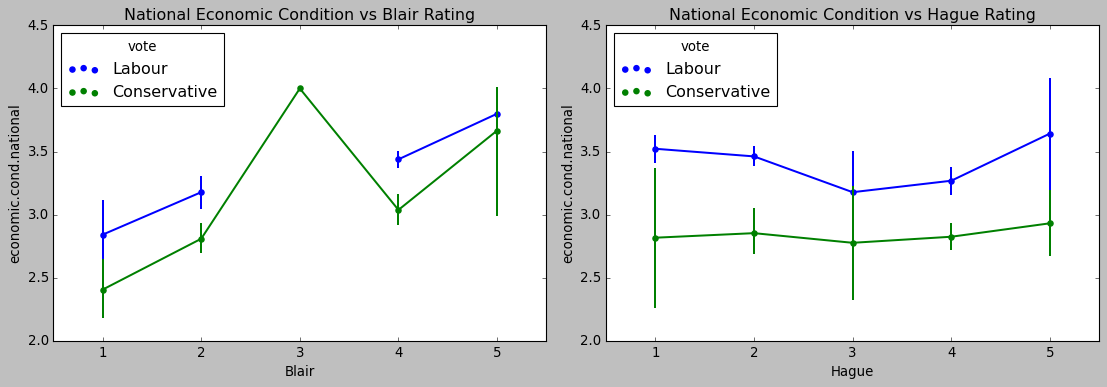

In [1627]:
# Using subplots to display both point plots in a single row with two columns
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Point plot for economic.cond.national vs Blair ratings, colored by vote
sns.pointplot(data=cData, y='economic.cond.national', x='Blair', hue='vote', ax=ax[0])
ax[0].set_title('National Economic Condition vs Blair Rating')

# Point plot for economic.cond.national vs Hague ratings, colored by vote
sns.pointplot(data=cData, y='economic.cond.national', x='Hague', hue='vote', ax=ax[1])
ax[1].set_title('National Economic Condition vs Hague Rating')

# Displaying the plot with a tight layout
plt.tight_layout()
plt.show()

### The two point plots – one showing the relationship between national economic condition ratings and Blair ratings, and the other showing the same for Hague ratings – each differentiated by vote preference, provide distinct insights. Here are the key differences based on the descriptions of these plots:

1. Trend in Economic Ratings Relative to Leader Ratings:

Blair: For Blair, there's typically a positive trend observed among Labour voters, where higher ratings for Blair correlate with more favorable ratings of national economic conditions. This implies that Labour voters who view Blair favorably are likely to perceive the economy positively.

Hague: In contrast, the trend for Hague among Conservative voters might also be positive, but the relationship could be less pronounced or more varied, especially among Labour voters. This indicates that Conservative voters who rate Hague highly may also view the economy more favorably, but the correlation may not be as strong as that observed for Blair among Labour voters.

2. Differences Between Voter Groups:

Blair: The plot for Blair likely shows a clear distinction between how Conservative and Labour voters perceive the economy in relation to their views on Blair. Labour voters’ perceptions of the economy might be more directly influenced by their views on Blair than Conservative voters.

Hague: Conversely, the plot for Hague may reveal that Conservative voters' views of the economy are influenced by their ratings of Hague, but Labour voters' economic ratings may not show a similar dependence on their views of the Conservative leader.

3. Intensity of Partisan Bias:

Both plots might exhibit partisan bias, but the intensity and nature of this bias could differ. Blair's plot might show a stronger correlation for Labour voters, while Hague's plot could reveal a less intense but still present correlation among Conservative voters.
Neutral Ratings of Leaders:

The response of voters to neutral ratings of Blair and Hague could also differ. In Blair’s case, moderate ratings might be associated with more neutral or mixed economic perceptions among both voter groups. For Hague, moderate ratings might show less clear trends, especially among Labour voters.
Overall, these point plots are expected to illustrate how political affiliations and opinions about party leaders can significantly impact voters' perceptions of the economy. The nature of these impacts, however, varies depending on whether the leader is affiliated with the voter's preferred party.

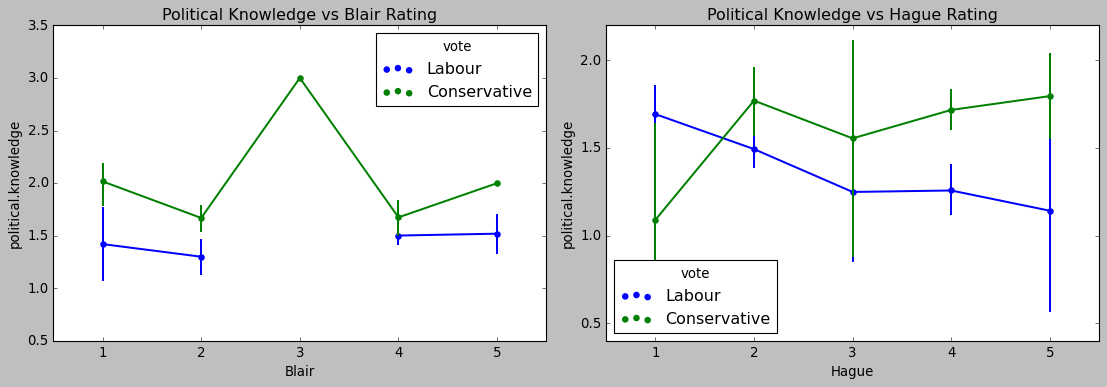

In [1628]:
# Using subplots to display both point plots in a single row with two columns
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Point plot for economic.cond.national vs Blair ratings, colored by vote
sns.pointplot(data=cData, y='political.knowledge', x='Blair', hue='vote', ax=ax[0])
ax[0].set_title('Political Knowledge vs Blair Rating')

# Point plot for economic.cond.national vs Hague ratings, colored by vote
sns.pointplot(data=cData, y='political.knowledge', x='Hague', hue='vote', ax=ax[1])
ax[1].set_title('Political Knowledge vs Hague Rating')

# Displaying the plot with a tight layout
plt.tight_layout()
plt.show()

#### The insights from the point plots for political knowledge in relation to ratings for Blair (Labour leader) and Hague (Conservative leader) reveal differences in how Conservative and Labour voters perceive their political knowledge based on their views of these party leaders. Here are the key differences:

Impact of Leader Ratings on Political Knowledge:

Blair: Higher ratings for Blair correlate with higher political knowledge ratings among Labour voters. Conversely, Conservative voters tend to show lower political knowledge ratings as their Blair ratings increase.
Hague: Higher ratings for Hague correlate with higher political knowledge ratings among Conservative voters. In contrast, Labour voters tend to show a decline or flat trend in political knowledge ratings as Hague ratings increase.
Perception Among Opposing Party Voters:

Blair: Conservative voters show a decreasing trend in political knowledge as their appreciation for Blair increases. This suggests that Conservative voters who view the Labour leader more favorably perceive themselves as less politically knowledgeable.
Hague: Labour voters show a decreasing trend in political knowledge as their appreciation for Hague increases, indicating that Labour voters who view the Conservative leader more favorably perceive themselves as less politically knowledgeable.
Neutral Ratings of Leaders:

Blair: At neutral ratings for Blair, there isn't a significant difference in the perceived political knowledge between Conservative and Labour voters.
Hague: Similarly, at neutral ratings for Hague, the perceived political knowledge among both Conservative and Labour voters does not show a significant difference.
Strong Supporters' Engagement:

Blair: Labour voters who strongly support Blair tend to rate themselves higher in political knowledge.
Hague: Conservative voters who strongly support Hague tend to rate themselves higher in political knowledge.
These differences highlight how political affiliations and opinions about party leaders can influence voters' self-perception of their political knowledge. The data suggests that voters may assess their political knowledge based on how closely their views align with those of party leaders, and this perception varies distinctly between supporters of different parties.

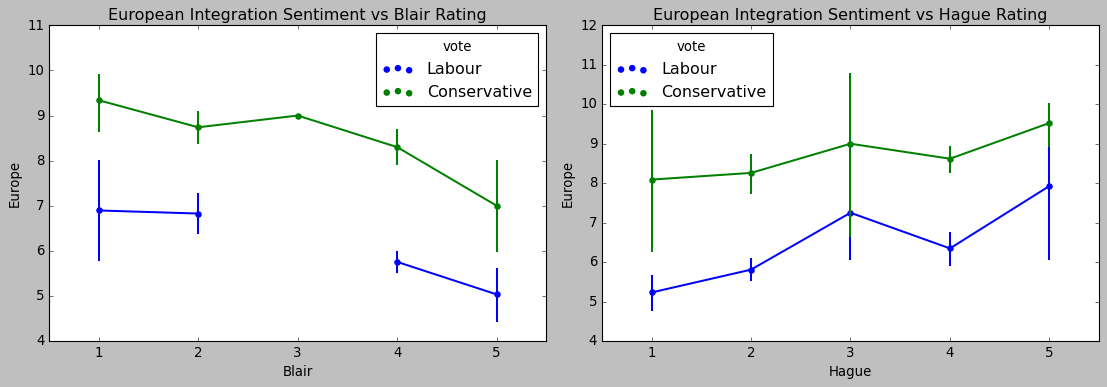

In [1629]:
# Using subplots to display both point plots in a single row with two columns
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Point plot for economic.cond.national vs Blair ratings, colored by vote
sns.pointplot(data=cData, y='Europe', x='Blair', hue='vote', ax=ax[0])
ax[0].set_title('European Integration Sentiment vs Blair Rating')

# Point plot for economic.cond.national vs Hague ratings, colored by vote
sns.pointplot(data=cData, y='Europe', x='Hague', hue='vote', ax=ax[1])
ax[1].set_title('European Integration Sentiment vs Hague Rating')

# Displaying the plot with a tight layout
plt.tight_layout()
plt.show()

The insights from the point plots for European Integration Sentiment Ratings in relation to ratings for Blair (Labour leader) and Hague (Conservative leader) reveal differences in how Conservative and Labour voters perceive European Integration based on their views of these party leaders. 

Here are the key insights:

Labour voters' attitudes towards Europe are influenced differently by their ratings for Blair and Hague. For Blair, a higher rating correlates with less Euroscepticism among Labour voters, whereas for Hague, Labour voters' Euroscepticism peaks at a mid-level rating before declining.

Conservative voters exhibit increasing Euroscepticism with higher ratings for Blair, indicating that those who rate the Labour leader poorly are more likely to be Eurosceptic. However, their sentiment towards Europe fluctuates and then slightly decreases at the highest rating for Hague.

The error bars indicate that within both groups of voters, there is a wide range of sentiments towards Europe, suggesting other factors may also influence their attitudes besides their opinions of these political leaders.

The trends between the two plots suggest that attitudes towards Europe and political leader ratings are not linearly related and that voter sentiment towards Europe is complex and possibly affected by multiple variables.

In summary, these plots illustrate that there is a nuanced relationship between how voters rate political leaders and their stance on Europe. This relationship varies not just between the two leaders but also between the voting preferences of the respondents.


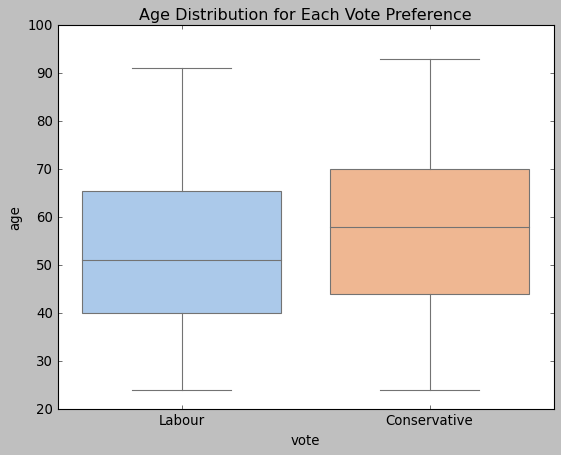

In [1630]:
sns.boxplot(x='vote', y='age', data=cData, color='lightblue', palette='pastel')
plt.title('Age Distribution for Each Vote Preference')
plt.show()

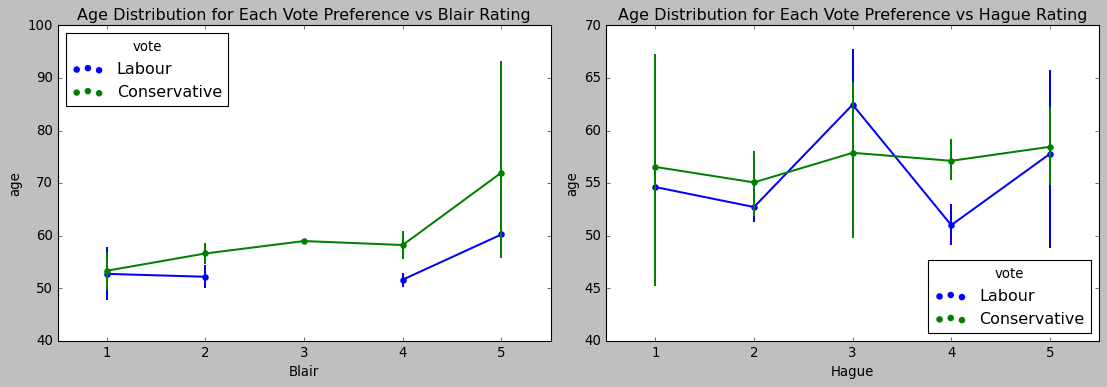

In [1631]:
# Using subplots to display both point plots in a single row with two columns
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Point plot for economic.cond.national vs Blair ratings, colored by vote
sns.pointplot(data=cData, y='age', x='Blair', hue='vote', ax=ax[0])
ax[0].set_title('Age Distribution for Each Vote Preference vs Blair Rating')

# Point plot for economic.cond.national vs Hague ratings, colored by vote
sns.pointplot(data=cData, y='age', x='Hague', hue='vote', ax=ax[1])
ax[1].set_title('Age Distribution for Each Vote Preference vs Hague Rating')

# Displaying the plot with a tight layout
plt.tight_layout()
plt.show()

#### Insights

The insights from the point plots for Blair and Hague ratings, in relation to age and voting preferences, highlight several differences:

1. Age Trends Relative to Leader Ratings:

Blair: For Labour supporters, the average age tends to increase with higher Blair ratings, suggesting older voters who view Blair favorably are more likely to support Labour. The pattern for Conservative supporters is less clear, with no consistent age trend across Blair ratings.

Hague: For Conservative supporters, there's a trend where older voters are more likely to give higher ratings to Hague. Labour supporters who rate Hague poorly are generally younger, especially at lower rating levels.
Variation in Age:

Both plots show variation in age within each rating category, but the nature of this variation differs. The variation for Blair ratings does not show a clear pattern, while for Hague, there's a more evident age difference, particularly at the extremes of the rating scale.

2. Clear Party Preferences at Extreme Ratings:

Both leaders show a trend where extreme ratings are strongly aligned with party preferences. However, the distribution of these extreme ratings differs. Blair's ratings are more moderate and evenly spread, while Hague's ratings have a notable skew towards the lower end among Labour supporters.


3. Moderate Ratings:

For both leaders, the mid-range ratings show a mix of supporters from both parties, indicating more moderate or mixed views.

4. Consistency of Age-Related Trends:

The age-related trends for Blair are less consistent and pronounced than for Hague. For Hague, there's a clearer age-related trend, especially among Conservative supporters and Labour supporters who give low ratings.

In summary, while both plots reveal age-related trends in leader ratings, the nature and consistency of these trends differ between Blair and Hague. 

The age of voters seems to have a more pronounced effect on Hague ratings, with older voters tending to rate him higher. 

For Blair, the age trend is present but less marked and consistent. Both analyses highlight that extreme ratings are strongly correlated with party preferences.

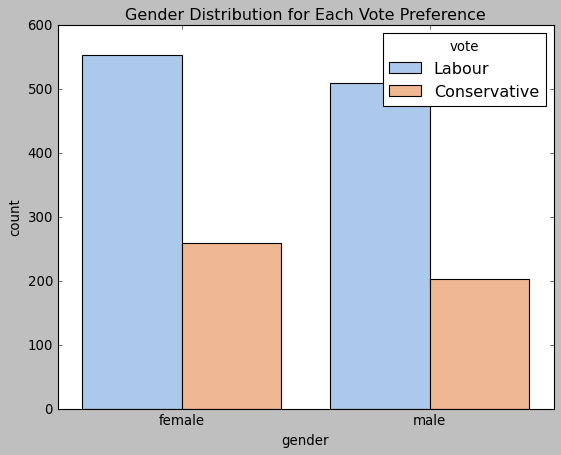

In [1632]:
sns.countplot(hue='vote', x='gender', data=cData, color='lightblue', palette='pastel')
plt.title('Gender Distribution for Each Vote Preference')
plt.show()

•	The count of Labour voters is higher than Conservative voters within each gender category. However, it appears that the difference between Labour and Conservative preferences is slightly more pronounced among female respondents than male respondents.

•	These observations suggest a stronger overall preference for the Labour party among the surveyed respondents, with this preference being consistent across genders. The data does not suggest a significant gender-based difference in party preference between Labour and Conservative.

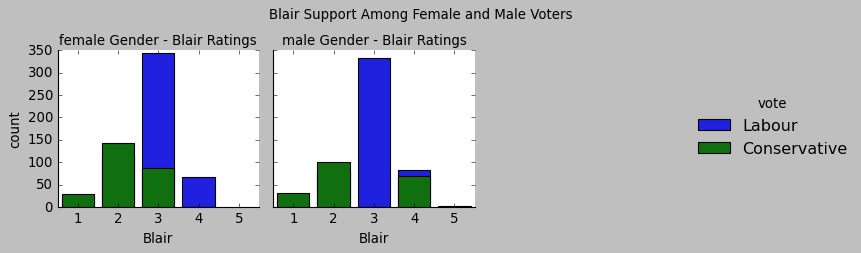

In [1633]:
g = sns.FacetGrid(cData, col="gender", hue='vote', col_wrap=3, height=3)
g = g.map(sns.countplot, "Blair")
g.add_legend()
g.set_titles("{col_name} Gender - Blair Ratings")
g.fig.suptitle('Blair Support Among Female and Male Voters', y=1.05);


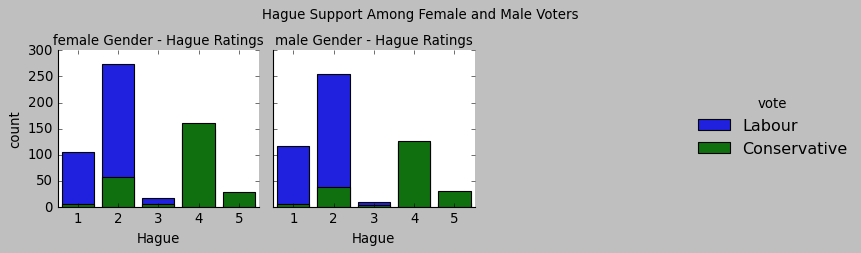

In [1634]:
g = sns.FacetGrid(cData, col="gender", hue='vote', col_wrap=3, height=3)
g = g.map(sns.countplot, "Hague")
g.add_legend()
g.set_titles("{col_name} Gender - Hague Ratings")
g.fig.suptitle('Hague Support Among Female and Male Voters', y=1.05);


The FacetGrid plot provides insights into the relationship between voters' assessment of the Conservative leader (Hague), their party choice (Conservative or Labour), and gender. 

Here are some key observations from the plot:

Gender-Specific Voting Patterns: There is a clear distinction in the voting patterns between male and female voters based on their assessment of Hague. This suggests that gender may play a role in how voters perceive political leaders and subsequently, in their voting choices.

Correlation Between Hague Assessment and Party Preference:

For voters with low assessment scores for Hague (1 or 2), there is a noticeable preference for the Labour Party across both genders.
Conversely, higher assessment scores for Hague (4 or 5) correlate with a higher tendency to vote for the Conservative Party, particularly noticeable among male voters.
Dominant Preferences:

Among female voters, there is a significant preference for the Labour Party, especially among those who rated Hague poorly.
Among male voters, while there is also a visible preference for Labour in lower Hague ratings, the support for the Conservative Party increases noticeably as Hague's ratings improve.
Variation in Assessment Scores:

The distribution of assessment scores for Hague varies between genders. For instance, male voters seem to have a broader range of opinions about Hague compared to female voters, as indicated by a more even distribution across different scores.
Popularity of Party Choices:

The Labour Party seems to be more popular among voters who have a negative view of Hague, regardless of gender.
The Conservative Party's popularity increases with positive perceptions of Hague, more so among male voters.
It is important to note that these observations are based on the specific dataset and the variables chosen for this plot. They provide a snapshot of the relationship between voters' gender, their perception of a political leader, and their voting preferences, but they do not establish causation. These insights are useful for understanding voter behavior patterns in the context of this specific election and demographic.

# Part 2: Data Preprocessing

## Prepare the data for modelling: - Missing Value Treatment (if needed) - Outlier Detection (treat, if needed) - Feature Engineering - Encode the data - Train-test split

## Dealing with Missing Values

In [1635]:
#Check for Missing Values
cData.isnull().sum()

Unnamed: 0                 0
vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

There are no missing values

## Check Duplicate Records

In [1636]:
dups = cData.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
print(cData.shape)

Number of duplicate rows = 0
(1525, 10)


## Drop Unuseful Columns

In [1637]:
#We can drop the Unnamed: 0 column from the dataset as it is not useful in our predictive models

cData.drop('Unnamed: 0', axis=1, inplace=True)

## Create Dummy Variables

Values like 'vote' and 'gender' cannot be read into an equation. Using substitutes like 1 for vote_Labour and 0 for vote_Conservative will be used as independent variables without imposing any kind of ordering between the 2 parties.

We will also be dropping one of those 2 columns to ensure there is no linear dependency between the 2 columns.

Similarly, using substitutes like 1 for gender_male and 0 for gender_female will be used as independent variables without imposing any kind of ordering between the 2 parties.

We will also be dropping one of those 2 columns to ensure there is no linear dependency between the 2 columns.

In [1638]:
# drop_first=True will drop one of the three origin columns
cData = pd.get_dummies(cData, drop_first=True)
cData.head()

age  economic.cond.national  economic.cond.household  Blair  Hague  Europe  \
0   43                       3                        3      4      1       2   
1   36                       4                        4      4      4       5   
2   35                       4                        4      5      2       3   
3   24                       4                        2      2      1       4   
4   41                       2                        2      1      1       6   

   political.knowledge  vote_Labour  gender_male  
0                    2            1            0  
1                    2            1            1  
2                    2            1            1  
3                    0            1            0  
4                    2            1            1

## Split Data

In [1639]:
# independent variables
X = cData.drop(["vote_Labour"], axis=1)
# dependent variable
y = cData[["vote_Labour"]]

**We will now split X and y into train and test sets in a 70:30 ratio.**

In [1640]:
# Split X and y into training and test set in 75:25 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [1641]:
print(X_train.head())

      age  economic.cond.national  economic.cond.household  Blair  Hague  \
1453   62                       3                        3      2      2   
275    49                       3                        3      2      2   
1130   74                       4                        4      4      4   
1153   57                       2                        3      4      2   
1172   24                       4                        5      4      4   

      Europe  political.knowledge  gender_male  
1453      11                    2            0  
275        8                    0            0  
1130       7                    0            1  
1153       6                    2            0  
1172       6                    0            1  


In [1642]:
print(X_test.head())

      age  economic.cond.national  economic.cond.household  Blair  Hague  \
91     49                       1                        1      2      4   
1194   34                       3                        3      2      4   
201    51                       2                        2      4      4   
613    30                       2                        3      4      4   
283    42                       3                        3      2      2   

      Europe  political.knowledge  gender_male  
91         8                    3            0  
1194       9                    2            1  
201        4                    2            1  
613        7                    3            1  
283        9                    0            1  


In [1643]:
print(y_train.head())

      vote_Labour
1453            1
275             0
1130            1
1153            1
1172            0


In [1644]:
print(y_test.head())

      vote_Labour
91              0
1194            1
201             1
613             0
283             1


# Part 3 - Model Building

# Metrics of Choice (Justify the evaluation metrics) - Model Building (KNN, Naive bayes, Bagging, Boosting) - Metrics of Choice (Justify the evaluation metrics) - Model Building (KNN, Naive bayes, Bagging, Boosting)

## Part 3.1 Metrics of Choice (Justify the evaluation metrics)

### Given our primary objective of leveraging machine learning to forecast which political party a voter is likely to support, and the ultimate goal of using this model to inform an exit poll for predicting overall election outcomes, the choice of evaluation metrics should focus on the model's ability to accurately and reliably predict voter preferences for each party.

### In this context, the following metrics are recommended:

### Accuracy: Since the overall goal is to predict election outcomes accurately, the general accuracy of the model remains an important metric. It provides a straightforward measure of how often the model is correct in its predictions.

### Recall: Considering that our goal includes determining which party is likely to secure the majority of seats, it's crucial to correctly identify as many actual supporters of each party as possible. High recall ensures that the model is not missing out on identifying true supporters of each party, which is vital for accurate seat predictions.

### Precision: This is also important because it ensures that when the model predicts a voter supports a particular party, that prediction is likely to be correct. High precision reduces the risk of overestimating support for a party, which could lead to inaccurate predictions of the election outcome.

### F1 Score: This metric provides a balance between precision and recall. Given that both precision and recall are important for your objectives, the F1 Score becomes a crucial measure, especially if there are trade-offs to be made between these two metrics.

### ROC-AUC: The Receiver Operating Characteristic curve and the Area Under the Curve provide insights into the model's performance across different thresholds. This is useful for understanding how well the model distinguishes between the two parties under varying conditions, which is crucial for robust exit poll predictions.

### In summary, for your exit poll prediction model, a combination of accuracy, recall, precision, F1 Score, and ROC-AUC would provide a comprehensive evaluation. Accuracy gives a general sense of overall model performance, recall and precision ensure that the model effectively identifies true supporters of each party, the F1 Score offers a balance when there are trade-offs, and ROC-AUC provides an overall measure of the model's discriminatory ability. This combination will help in making reliable and accurate predictions about the overall election outcomes and party majorities.

# Predictive Modelling Techniques 

## Logistic Regression

### Logistic Regression Model

We are making some adjustments to the parameters in the Logistic Regression Class to get a better accuracy. Details of which can be found out on the site scikit-learn mentioned below

<a href='https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html'>scikit-learn</a>

>Argument=solver{‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}, default=’lbfgs’
Algorithm to use in the optimization problem.

>For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones.

>For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss; ‘liblinear’ is limited to one-versus-rest schemes.

>‘newton-cg’, ‘lbfgs’, ‘sag’ and ‘saga’ handle L2 or no penalty

>‘liblinear’ and ‘saga’ also handle L1 penalty

>‘saga’ also supports ‘elasticnet’ penalty

>‘liblinear’ does not support setting penalty='none'

>Note that ‘sag’ and ‘saga’ fast convergence is only guaranteed on features with approximately the same scale. You can preprocess the data with a scaler from sklearn.preprocessing.

>New in version 0.17: Stochastic Average Gradient descent solver.

>New in version 0.19: SAGA solver.

>Changed in version 0.22: The default solver changed from ‘liblinear’ to ‘lbfgs’ in 0.22.

<a href='https://towardsdatascience.com/dont-sweat-the-solver-stuff-aea7cddc3451'> Article on Solvers</a>



### Import Libraries

In [2083]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,ConfusionMatrixDisplay

### Fit the Logistic Regression model

In [2084]:
lr_model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
lr_model.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.7s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

### Logistic Regression Model Predictions on Train and Test Data

In [2085]:
ytrain_predict = lr_model.predict(X_train)
ytest_predict = lr_model.predict(X_test)

### Getting the Predicted Class Probabalities for Train and Test Data

In [2086]:
# Predict probabilities for training and test data
ytrain_predict_prob = lr_model.predict_proba(X_train)
ytest_predict_prob = lr_model.predict_proba(X_test)

# Convert to DataFrames
df_lr_train_prob = pd.DataFrame(ytrain_predict_prob, columns=['Train_Prob_Class_0', 'Train_Prob_Class_1'])
df_lr_test_prob = pd.DataFrame(ytest_predict_prob, columns=['Test_Prob_Class_0', 'Test_Prob_Class_1'])

# Concatenate DataFrames for side-by-side display and show the first few rows
print([df_lr_train_prob.head()])
print([df_lr_test_prob.head()])

[   Train_Prob_Class_0  Train_Prob_Class_1
0            0.616214            0.383786
1            0.186460            0.813540
2            0.187994            0.812006
3            0.163937            0.836063
4            0.052483            0.947517]
[   Test_Prob_Class_0  Test_Prob_Class_1
0           0.933648           0.066352
1           0.689194           0.310806
2           0.333480           0.666520
3           0.477407           0.522593
4           0.157152           0.842848]


### Getting the Actual vs Predicted Classes for Train and Test Data

In [2087]:
# Convert y_test to a pandas Series if it's a DataFrame
if isinstance(y_train, pd.DataFrame):
    y_train_series = y_train.iloc[:, 0]  # Assuming the relevant data is in the first column
else:
    y_train_series = y_train

# Now create the DataFrame for actual vs predicted comparison
actual_vs_predicted_train_df = pd.DataFrame({
    'Actual': y_train_series,
    'Predicted': ytrain_predict
})

# Display the first few rows
print(actual_vs_predicted_train_df.head())

      Actual  Predicted
1453       1          0
275        0          1
1130       1          1
1153       1          1
1172       0          1


In [2088]:
# Convert y_test to a pandas Series if it's a DataFrame
if isinstance(y_test, pd.DataFrame):
    y_test_series = y_test.iloc[:, 0]  # Assuming the relevant data is in the first column
else:
    y_test_series = y_test

# Now create the DataFrame for actual vs predicted comparison
actual_vs_predicted_test_df = pd.DataFrame({
    'Actual': y_test_series,
    'Predicted': ytest_predict
})

# Display the first few rows
print(actual_vs_predicted_test_df.head())


      Actual  Predicted
91         0          0
1194       1          0
201        1          1
613        0          1
283        1          1


### Retrieving the coefficients of the variables from the Logistic Regression Model

In [2089]:
coefficients = lr_model.coef_[0]
feature_names = X.columns

# Creating a DataFrame to display the feature names and their corresponding coefficients
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

coefficients_df.sort_values(by='Coefficient', ascending=False)

Feature  Coefficient
3                    Blair     0.574633
1   economic.cond.national     0.337564
7              gender_male     0.299223
2  economic.cond.household     0.159102
0                      age    -0.020672
5                   Europe    -0.237534
6      political.knowledge    -0.482673
4                    Hague    -0.837979

### Logistic Regression Model Accuracy on Train and Test Data

In [2090]:
lr_train_model_score = lr_model.score(X_train, y_train)
print("The Logistic Regression Model's Accuracy Score on Train Data is", lr_train_model_score.round(2))
lr_test_model_score = lr_model.score(X_test, y_test)
print("The Logistic Regression Model's Accuracy Score on Test Data is",lr_test_model_score.round(2))

The Logistic Regression Model's Accuracy Score on Train Data is 0.84
The Logistic Regression Model's Accuracy Score on Test Data is 0.82


### Logistic Regression Confusion Matrix for Train and Test Data

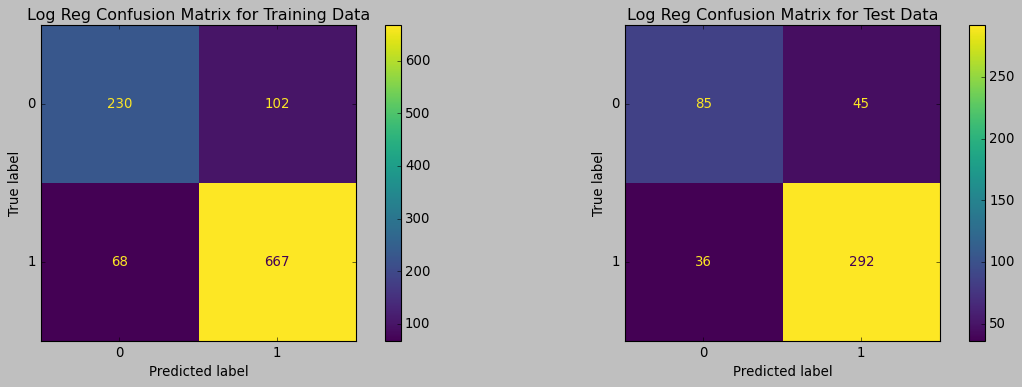

In [2091]:
# Create the confusion matrices
lr_cm_train = metrics.confusion_matrix(y_train, ytrain_predict)
lr_cm_test = metrics.confusion_matrix(y_test, ytest_predict)

# Set up the matplotlib figure with 1 row and 2 columns
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Confusion matrix on the training data
lr_disp_train = ConfusionMatrixDisplay(confusion_matrix=lr_cm_train, display_labels=lr_model.classes_)
lr_disp_train.plot(ax=ax[0])
ax[0].set_title('Log Reg Confusion Matrix for Training Data')

# Confusion matrix on the test data
lr_disp_test = ConfusionMatrixDisplay(confusion_matrix=lr_cm_test, display_labels=lr_model.classes_)
lr_disp_test.plot(ax=ax[1])
ax[1].set_title('Log Reg Confusion Matrix for Test Data')

plt.tight_layout()
plt.show()


### Logistic Regression Classification Reports for Train and Test Data

In [2092]:
# Generate classification reports
lr_report_test = metrics.classification_report(y_test, ytest_predict, output_dict=True)
lr_report_train = metrics.classification_report(y_train, ytrain_predict, output_dict=True)

# Convert reports to DataFrames
df_lr_report_test = pd.DataFrame(lr_report_test).transpose()
df_lr_report_train = pd.DataFrame(lr_report_train).transpose()

# Round the DataFrames to 2 decimal places
df_lr_report_test = df_lr_report_test.round(2)
df_lr_report_train = df_lr_report_train.round(2)

# Concatenate both DataFrames along the columns axis for side-by-side display
df_lr_reports = pd.concat([df_lr_report_train.add_suffix('_train'), df_lr_report_test.add_suffix('_test')], axis=1)

# Display the concatenated DataFrame
print(df_lr_reports)

              precision_train  recall_train  f1-score_train  support_train  \
0                        0.77          0.69            0.73         332.00   
1                        0.87          0.91            0.89         735.00   
accuracy                 0.84          0.84            0.84           0.84   
macro avg                0.82          0.80            0.81        1067.00   
weighted avg             0.84          0.84            0.84        1067.00   

              precision_test  recall_test  f1-score_test  support_test  
0                       0.70         0.65           0.68        130.00  
1                       0.87         0.89           0.88        328.00  
accuracy                0.82         0.82           0.82          0.82  
macro avg               0.78         0.77           0.78        458.00  
weighted avg            0.82         0.82           0.82        458.00  


In [2093]:
lr_report_train

{'0': {'precision': 0.7718120805369127,
  'recall': 0.6927710843373494,
  'f1-score': 0.7301587301587302,
  'support': 332},
 '1': {'precision': 0.8673602080624188,
  'recall': 0.9074829931972789,
  'f1-score': 0.886968085106383,
  'support': 735},
 'accuracy': 0.8406747891283973,
 'macro avg': {'precision': 0.8195861442996657,
  'recall': 0.8001270387673141,
  'f1-score': 0.8085634076325566,
  'support': 1067},
 'weighted avg': {'precision': 0.8376301440151198,
  'recall': 0.8406747891283973,
  'f1-score': 0.83817642077403,
  'support': 1067}}

### Logistic Regression Model AUC and ROC Curves of Train and Test Data

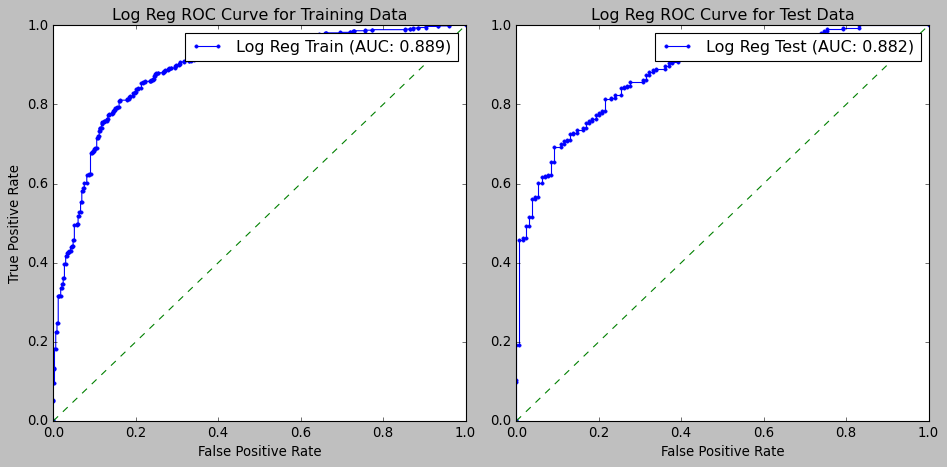

In [2094]:
from sklearn.metrics import roc_curve, roc_auc_score

# predict probabilities for train set
train_probs = lr_model.predict_proba(X_train)[:, 1]
# calculate AUC for train set
train_auc = roc_auc_score(y_train, train_probs)
# calculate roc curve for train set
train_fpr, train_tpr, _ = roc_curve(y_train, train_probs)

# predict probabilities for test set
test_probs = lr_model.predict_proba(X_test)[:, 1]
# calculate AUC for test set
test_auc = roc_auc_score(y_test, test_probs)
# calculate roc curve for test set
test_fpr, test_tpr, _ = roc_curve(y_test, test_probs)

# create subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# plot roc curve for the train set
ax[0].plot(train_fpr, train_tpr, marker='.', label='Log Reg Train (AUC: %.3f)' % train_auc)
ax[0].plot([0, 1], [0, 1], linestyle='--')
ax[0].set_title('Log Reg ROC Curve for Training Data')
ax[0].set_xlabel('False Positive Rate')
ax[0].set_ylabel('True Positive Rate')
ax[0].legend()

# plot roc curve for the test set
ax[1].plot(test_fpr, test_tpr, marker='.', label='Log Reg Test (AUC: %.3f)' % test_auc)
ax[1].plot([0, 1], [0, 1], linestyle='--')
ax[1].set_title('Log Reg ROC Curve for Test Data')
ax[1].set_xlabel('False Positive Rate')
ax[1].legend()

# show the plot
plt.tight_layout()
plt.show()

### Cross Validation for Logistic Regression Model on Train and Test Data

In [2095]:
from sklearn.model_selection import cross_val_score
lr_train_scores = cross_val_score(lr_model, X_train, y_train, cv=5)
lr_train_scores

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.4s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.0s finished


array([0.80373832, 0.85981308, 0.82629108, 0.85915493, 0.81220657])

In [2096]:
lr_test_scores = cross_val_score(lr_model, X_test, y_test, cv=5)
lr_test_scores

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.0s finished


array([0.84782609, 0.80434783, 0.80434783, 0.86813187, 0.83516484])

In [2097]:
print("The Logistic Regression Model's Mean Accuracy Score after Cross Validation on Train Data is", np.mean(lr_train_scores).round(2))
print("The Logistic Regression Model's Mean Accuracy Score after Cross Validation on Test Data is",np.mean(lr_test_scores).round(2))

The Logistic Regression Model's Mean Accuracy Score after Cross Validation on Train Data is 0.83
The Logistic Regression Model's Mean Accuracy Score after Cross Validation on Test Data is 0.83


### SMOTE on Logistic Regression Model

In [2103]:
lr_SM_model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
lr_SM_model.fit(X_train_res, y_train_res)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.4s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

In [2106]:
y_train_res.value_counts()

vote_Labour
0              735
1              735
dtype: int64

In [2104]:
## Performance Matrix on train data set with SMOTE
y_train_predict = lr_SM_model.predict(X_train_res)
model_score = lr_SM_model.score(X_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, y_train_predict))
print(metrics.classification_report(y_train_res ,y_train_predict))

0.8353741496598639
[[614 121]
 [121 614]]
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       735
           1       0.84      0.84      0.84       735

    accuracy                           0.84      1470
   macro avg       0.84      0.84      0.84      1470
weighted avg       0.84      0.84      0.84      1470



In [2105]:
## Performance Matrix on test data set
y_test_predict = lr_SM_model.predict(X_test)
model_score = lr_SM_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.7947598253275109
[[102  28]
 [ 66 262]]
              precision    recall  f1-score   support

           0       0.61      0.78      0.68       130
           1       0.90      0.80      0.85       328

    accuracy                           0.79       458
   macro avg       0.76      0.79      0.77       458
weighted avg       0.82      0.79      0.80       458



### Hypertuning parameters of Logistic Regression Model on Train and Test Data

To use Grid Search CV for hyperparameter tuning of a Logistic Regression model, we'll focus on the hyperparameters specific to Logistic Regression. Logistic Regression is a widely used linear model for binary classification, but it can also be extended to multiclass classification.

Key hyperparameters for Logistic Regression include:

1. C: Inverse of regularization strength; smaller values specify stronger regularization.
2. penalty: Used to specify the norm used in the penalization ('l1', 'l2', 'elasticnet', 'none').
3. solver: Algorithm to use in the optimization problem ('newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga').
4. max_iter: Maximum number of iterations taken for the solvers to converge.

Here's how to proceed:

Define Parameter Grid:
Create a dictionary with the Logistic Regression parameters you want to tune.

Initialize Grid Search:
Set up Grid Search CV with the Logistic Regression model, parameter grid, and the scoring metric. Also, specify the number of folds for cross-validation.

Fit Grid Search on Training Data:
Run the grid search to find the best parameters.

Evaluate the Best Model:
After fitting, evaluate the best model found by Grid Search on your test data.

In [2116]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid_logistic = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['liblinear', 'newton-cg', 'sag', 'saga', 'lbfgs'],
    'max_iter': [100, 200, 300],
    'class_weight': [None, 'balanced']
}

# Initialize the Grid Search model
grid_logistic = GridSearchCV(LogisticRegression(), param_grid_logistic, cv=5, scoring='accuracy', verbose=1)

# Fit the grid search to the data
grid_logistic.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_logistic.best_params_)

# Evaluate the best model
best_model_logistic = grid_logistic.best_estimator_
train_accuracy_logistic = best_model_logistic.score(X_train, y_train).round(2)
test_accuracy_logistic = best_model_logistic.score(X_test, y_test).round(2)

Fitting 5 folds for each of 720 candidates, totalling 3600 fits
Best Parameters: {'C': 1, 'class_weight': None, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}


In [2117]:
print(f"Logistic Regression Training Accuracy after Hypertuning Parameters using Grid Search CV is: {train_accuracy_logistic}")
print(f"Logistic Regression Test Accuracy after Hypertuning Parameters using Grid Search CV is: {test_accuracy_logistic}")

Logistic Regression Training Accuracy after Hypertuning Parameters using Grid Search CV is: 0.84
Logistic Regression Test Accuracy after Hypertuning Parameters using Grid Search CV is: 0.82


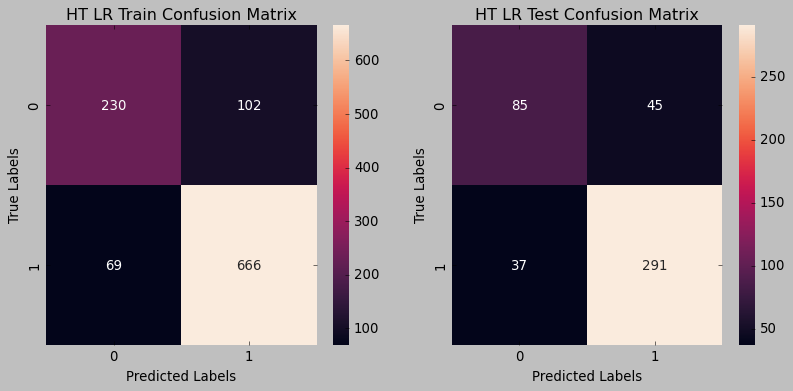

Classification Report - Training Data
              precision    recall  f1-score   support

           0       0.77      0.69      0.73       332
           1       0.87      0.91      0.89       735

    accuracy                           0.84      1067
   macro avg       0.82      0.80      0.81      1067
weighted avg       0.84      0.84      0.84      1067


Classification Report - Test Data
              precision    recall  f1-score   support

           0       0.70      0.65      0.67       130
           1       0.87      0.89      0.88       328

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.78       458
weighted avg       0.82      0.82      0.82       458



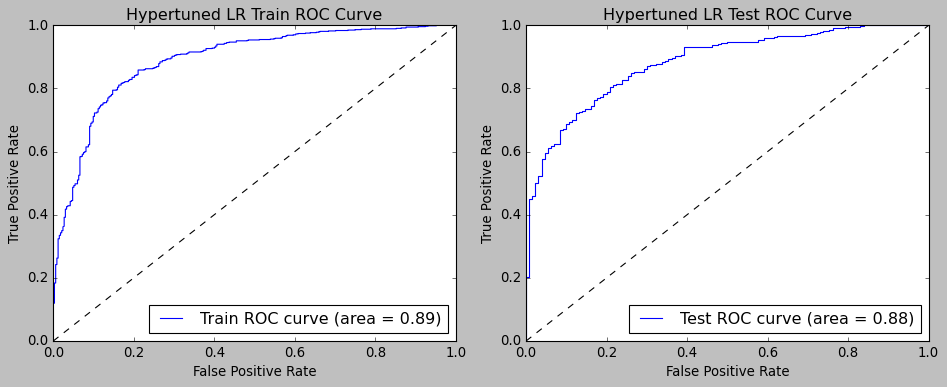

In [2118]:
from sklearn.metrics import auc

# ROC AUC Curve after Hypertuning
y_train_prob = best_model_logistic.predict_proba(X_train)[:, 1]
y_test_prob = best_model_logistic.predict_proba(X_test)[:, 1]

fpr_train, tpr_train, _ = roc_curve(y_train, y_train_prob)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)

roc_auc_train = auc(fpr_train, tpr_train)
roc_auc_test = auc(fpr_test, tpr_test)

# Confusion Matrix after Hypertuning
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

conf_matrix_train = confusion_matrix(y_train, best_model_logistic.predict(X_train))
conf_matrix_test = confusion_matrix(y_test, best_model_logistic.predict(X_test))

sns.heatmap(conf_matrix_train, annot=True, ax=ax[0], fmt='g')
ax[0].set_title('HT LR Train Confusion Matrix')
ax[0].set_xlabel('Predicted Labels')
ax[0].set_ylabel('True Labels')

sns.heatmap(conf_matrix_test, annot=True, ax=ax[1], fmt='g')
ax[1].set_title('HT LR Test Confusion Matrix')
ax[1].set_xlabel('Predicted Labels')
ax[1].set_ylabel('True Labels')

plt.show()

# Classification Report after Hypertuning
print("Classification Report - Training Data")
print(classification_report(y_train, best_model_logistic.predict(X_train)))
print("\nClassification Report - Test Data")
print(classification_report(y_test, best_model_logistic.predict(X_test)))

# ROC AUC Curve after Hypertuning
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Train ROC Curve
ax[0].plot(fpr_train, tpr_train, label=f'Train ROC curve (area = {roc_auc_train:.2f})')
ax[0].plot([0, 1], [0, 1], 'k--')
ax[0].set_xlabel('False Positive Rate')
ax[0].set_ylabel('True Positive Rate')
ax[0].set_title('Hypertuned LR Train ROC Curve')
ax[0].legend(loc='lower right')

# Test ROC Curve
ax[1].plot(fpr_test, tpr_test, label=f'Test ROC curve (area = {roc_auc_test:.2f})')
ax[1].plot([0, 1], [0, 1], 'k--')
ax[1].set_xlabel('False Positive Rate')
ax[1].set_ylabel('True Positive Rate')
ax[1].set_title('Hypertuned LR Test ROC Curve')
ax[1].legend(loc='lower right')

plt.tight_layout()
plt.show()


## Linear Discriminant Analysis

### Import Libraries

In [1894]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection
from sklearn.preprocessing import scale

### Fit the Model

In [1895]:
#Build LDA Model
clf = LinearDiscriminantAnalysis()
lda_model=clf.fit(X_train,y_train)

### LDA Model Predictions on Train and Test Data

In [1896]:
y_train_predict = lda_model.predict(X_train)
y_test_predict = lda_model.predict(X_test)

### Getting the Predicted Class Probabalities for Train and Test Data

In [1897]:
# Predict probabilities for training and test data
y_train_predict_prob = lda_model.predict_proba(X_train)
y_test_predict_prob = lda_model.predict_proba(X_test)

# Convert to DataFrames
df_lda_train_prob = pd.DataFrame(y_train_predict_prob, columns=['Train_Prob_Class_0', 'Train_Prob_Class_1'])
df_lda_test_prob = pd.DataFrame(y_test_predict_prob, columns=['Test_Prob_Class_0', 'Test_Prob_Class_1'])

# Concatenate DataFrames for side-by-side display and show the first few rows
print([df_lda_train_prob.head()])
print([df_lda_test_prob.head()])

[   Train_Prob_Class_0  Train_Prob_Class_1
0            0.646067            0.353933
1            0.160884            0.839116
2            0.183504            0.816496
3            0.132531            0.867469
4            0.039819            0.960181]
[   Test_Prob_Class_0  Test_Prob_Class_1
0           0.952522           0.047478
1           0.741265           0.258735
2           0.328720           0.671280
3           0.486416           0.513584
4           0.139250           0.860750]


### Getting the Actual vs Predicted Classes for Train and Test Data

In [1898]:
# Convert y_test to a pandas Series if it's a DataFrame
if isinstance(y_train, pd.DataFrame):
    y_train_series = y_train.iloc[:, 0]  # Assuming the relevant data is in the first column
else:
    y_train_series = y_train

# Now create the DataFrame for actual vs predicted comparison
actual_vs_predicted_train_df = pd.DataFrame({
    'Actual': y_train_series,
    'Predicted': y_train_predict
})

# Display the first few rows
print(actual_vs_predicted_train_df.head())

      Actual  Predicted
1453       1          0
275        0          1
1130       1          1
1153       1          1
1172       0          1


In [1899]:
# Convert y_test to a pandas Series if it's a DataFrame
if isinstance(y_test, pd.DataFrame):
    y_test_series = y_test.iloc[:, 0]  # Assuming the relevant data is in the first column
else:
    y_test_series = y_test

# Now create the DataFrame for actual vs predicted comparison
actual_vs_predicted_test_df = pd.DataFrame({
    'Actual': y_test_series,
    'Predicted': y_test_predict
})

# Display the first few rows
print(actual_vs_predicted_test_df.head())

      Actual  Predicted
91         0          0
1194       1          0
201        1          1
613        0          1
283        1          1


### Retrieving the coefficients of the variables from the LDA model

In [1900]:
# Retrieving the coefficients of the variables from the lda regression model
coefficients = lda_model.coef_[0]
feature_names = X.columns

# Creating a DataFrame to display the feature names and their corresponding coefficients
coefficients_df_lda = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

coefficients_df_lda.sort_values(by='Coefficient', ascending=False)

Feature  Coefficient
3                    Blair     0.704420
1   economic.cond.national     0.349207
7              gender_male     0.249082
2  economic.cond.household     0.150347
0                      age    -0.025622
5                   Europe    -0.258563
6      political.knowledge    -0.572343
4                    Hague    -0.967188

### LDA Model Accuracy on Train and Test Data

In [1901]:
lda_train_model_score = lda_model.score(X_train, y_train)
print("The LDA Model's Accuracy Score on Train Data is", lda_train_model_score.round(2))
lda_test_model_score = lda_model.score(X_test, y_test)
print("The LDA Model's Accuracy Score on Test Data is",lda_test_model_score.round(2))

The LDA Model's Accuracy Score on Train Data is 0.84
The LDA Model's Accuracy Score on Test Data is 0.82


### LDA Model Confusion Matrix of Train and Test Data

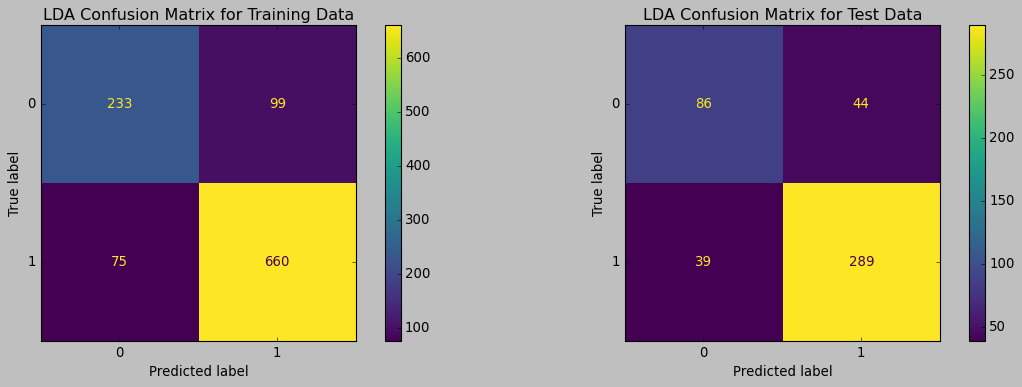

In [1902]:
# Create the confusion matrices
lda_cm_train = metrics.confusion_matrix(y_train, y_train_predict)
lda_cm_test = metrics.confusion_matrix(y_test, y_test_predict)

# Set up the matplotlib figure with 1 row and 2 columns
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Confusion matrix on the training data
lda_disp_train = ConfusionMatrixDisplay(confusion_matrix=lda_cm_train, display_labels=lda_model.classes_)
lda_disp_train.plot(ax=ax[0])
ax[0].set_title('LDA Confusion Matrix for Training Data')

# Confusion matrix on the test data
lda_disp_test = ConfusionMatrixDisplay(confusion_matrix=lda_cm_test, display_labels=lda_model.classes_)
lda_disp_test.plot(ax=ax[1])
ax[1].set_title('LDA Confusion Matrix for Test Data')

plt.tight_layout()
plt.show()


### LDA Model Classification Report for Train and Test Data

In [1903]:
# Generate classification reports
lda_report_test = metrics.classification_report(y_test, y_test_predict, output_dict=True)
lda_report_train = metrics.classification_report(y_train, y_train_predict, output_dict=True)

# Convert reports to DataFrames
df_lda_report_test = pd.DataFrame(lda_report_test).transpose()
df_lda_report_train = pd.DataFrame(lda_report_train).transpose()

# Round the DataFrames to 2 decimal places
df_lda_report_test = df_lda_report_test.round(2)
df_lda_report_train = df_lda_report_train.round(2)

# Concatenate both DataFrames along the columns axis for side-by-side display
df_lda_reports = pd.concat([df_lda_report_train.add_suffix('_train'), df_lda_report_test.add_suffix('_test')], axis=1)

# Display the concatenated DataFrame
print(df_lda_reports)

              precision_train  recall_train  f1-score_train  support_train  \
0                        0.76          0.70            0.73         332.00   
1                        0.87          0.90            0.88         735.00   
accuracy                 0.84          0.84            0.84           0.84   
macro avg                0.81          0.80            0.81        1067.00   
weighted avg             0.83          0.84            0.84        1067.00   

              precision_test  recall_test  f1-score_test  support_test  
0                       0.69         0.66           0.67        130.00  
1                       0.87         0.88           0.87        328.00  
accuracy                0.82         0.82           0.82          0.82  
macro avg               0.78         0.77           0.77        458.00  
weighted avg            0.82         0.82           0.82        458.00  


### LDA Model AUC and ROC Curves of Train and Test Data

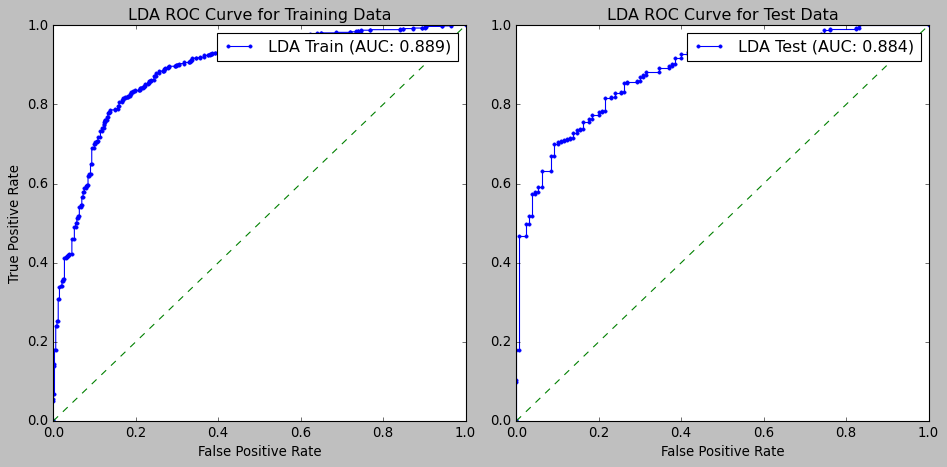

In [1666]:
from sklearn.metrics import roc_curve, roc_auc_score

# predict probabilities for train set
train_probs = lda_model.predict_proba(X_train)[:, 1]
# calculate AUC for train set
train_auc = roc_auc_score(y_train, train_probs)
# calculate roc curve for train set
train_fpr, train_tpr, _ = roc_curve(y_train, train_probs)

# predict probabilities for test set
test_probs = lda_model.predict_proba(X_test)[:, 1]
# calculate AUC for test set
test_auc = roc_auc_score(y_test, test_probs)
# calculate roc curve for test set
test_fpr, test_tpr, _ = roc_curve(y_test, test_probs)

# create subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# plot roc curve for the train set
ax[0].plot(train_fpr, train_tpr, marker='.', label='LDA Train (AUC: %.3f)' % train_auc)
ax[0].plot([0, 1], [0, 1], linestyle='--')
ax[0].set_title('LDA ROC Curve for Training Data')
ax[0].set_xlabel('False Positive Rate')
ax[0].set_ylabel('True Positive Rate')
ax[0].legend()

# plot roc curve for the test set
ax[1].plot(test_fpr, test_tpr, marker='.', label='LDA Test (AUC: %.3f)' % test_auc)
ax[1].plot([0, 1], [0, 1], linestyle='--')
ax[1].set_title('LDA ROC Curve for Test Data')
ax[1].set_xlabel('False Positive Rate')
ax[1].legend()

# show the plot
plt.tight_layout()
plt.show()

### Cross Validation for LDA Model on Train and Test Data

In [1667]:
from sklearn.model_selection import cross_val_score
lda_train_scores = cross_val_score(lda_model, X_train, y_train, cv=5)
lda_train_scores

array([0.80841121, 0.85046729, 0.84037559, 0.86384977, 0.81220657])

In [1668]:
lda_test_scores = cross_val_score(lda_model, X_test, y_test, cv=5)
lda_test_scores

array([0.84782609, 0.80434783, 0.80434783, 0.86813187, 0.84615385])

In [1669]:
print("The LDA Model's Mean Accuracy Score after Cross Validation on Train Data is", np.mean(lda_train_scores).round(2))
print("The LDA Model's Mean Accuracy Score after Cross Validation on Test Data is",np.mean(lda_test_scores).round(2))


The LDA Model's Mean Accuracy Score after Cross Validation on Train Data is 0.84
The LDA Model's Mean Accuracy Score after Cross Validation on Test Data is 0.83


### SMOTE on LDA Model

In [2119]:
clf = LinearDiscriminantAnalysis()
lda_SM_model=clf.fit(X_train_res, y_train_res)

In [2121]:
## Performance Matrix on train data set with SMOTE
y_train_predict = lda_SM_model.predict(X_train_res)
model_score = lda_SM_model.score(X_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, y_train_predict))
print(metrics.classification_report(y_train_res ,y_train_predict))

0.8374149659863945
[[616 119]
 [120 615]]
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       735
           1       0.84      0.84      0.84       735

    accuracy                           0.84      1470
   macro avg       0.84      0.84      0.84      1470
weighted avg       0.84      0.84      0.84      1470



In [2122]:
## Performance Matrix on test data set
y_test_predict = lda_SM_model.predict(X_test)
model_score = lda_SM_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8013100436681223
[[103  27]
 [ 64 264]]
              precision    recall  f1-score   support

           0       0.62      0.79      0.69       130
           1       0.91      0.80      0.85       328

    accuracy                           0.80       458
   macro avg       0.76      0.80      0.77       458
weighted avg       0.82      0.80      0.81       458



### Hyperparameter Tuning for LDA Model

In [2123]:
from sklearn.model_selection import GridSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Define the parameter grid for LDA
param_grid_lda = {
    'solver': ['svd', 'lsqr', 'eigen'],
    'shrinkage': [None, 'auto', 0.1, 0.5, 0.9],
    'n_components': [None, 1, 2, 3]  # Use None for no dimensionality reduction
}

# Initialize the Grid Search model for LDA
grid_lda = GridSearchCV(LinearDiscriminantAnalysis(), param_grid_lda, cv=5, scoring='accuracy', verbose=1)

# Fit the grid search to the data
grid_lda.fit(X_train, y_train)

# Best parameters
print("Best Parameters for LDA:", grid_lda.best_params_)

# Evaluate the best model
best_model_lda = grid_lda.best_estimator_
train_accuracy_lda = best_model_lda.score(X_train, y_train).round(2)
test_accuracy_lda = best_model_lda.score(X_test, y_test).round(2)


Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best Parameters for LDA: {'n_components': None, 'shrinkage': 'auto', 'solver': 'lsqr'}


In [2124]:
print(f"LDA Training Accuracy after Hypertuning Parameters using Grid Search CV is: {train_accuracy_lda}")
print(f"LDA Test Accuracy after Hypertuning Parameters using Grid Search CV is: {test_accuracy_lda}")

LDA Training Accuracy after Hypertuning Parameters using Grid Search CV is: 0.84
LDA Test Accuracy after Hypertuning Parameters using Grid Search CV is: 0.82


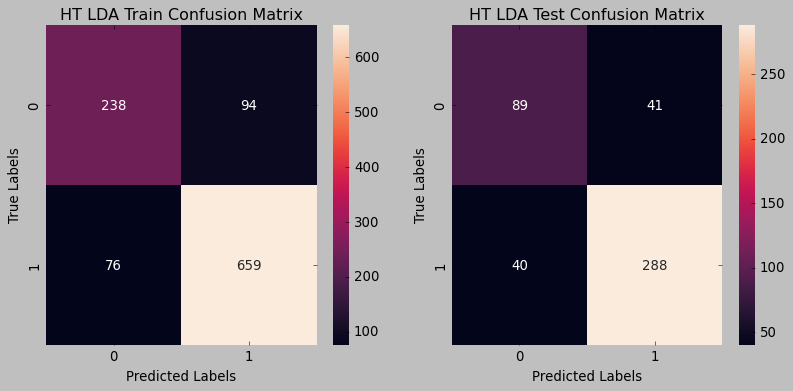

Classification Report - Training Data
              precision    recall  f1-score   support

           0       0.76      0.72      0.74       332
           1       0.88      0.90      0.89       735

    accuracy                           0.84      1067
   macro avg       0.82      0.81      0.81      1067
weighted avg       0.84      0.84      0.84      1067


Classification Report - Test Data
              precision    recall  f1-score   support

           0       0.69      0.68      0.69       130
           1       0.88      0.88      0.88       328

    accuracy                           0.82       458
   macro avg       0.78      0.78      0.78       458
weighted avg       0.82      0.82      0.82       458



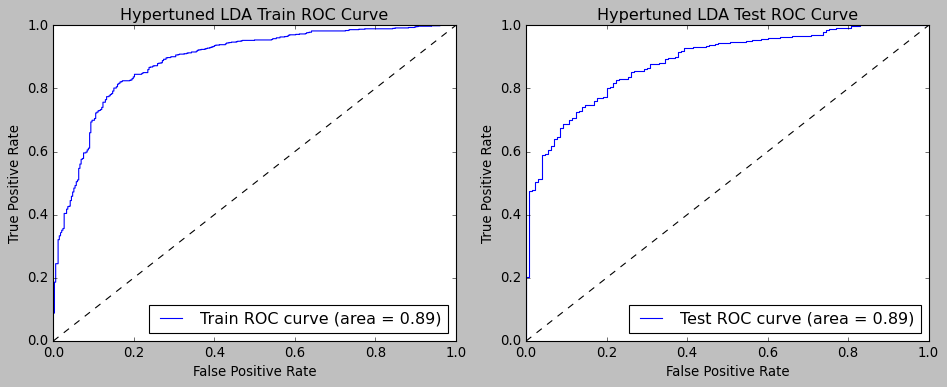

In [2125]:
from sklearn.metrics import auc

# ROC AUC Curve after Hypertuning
y_train_prob = best_model_lda.predict_proba(X_train)[:, 1]
y_test_prob = best_model_lda.predict_proba(X_test)[:, 1]

fpr_train, tpr_train, _ = roc_curve(y_train, y_train_prob)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)

roc_auc_train = auc(fpr_train, tpr_train)
roc_auc_test = auc(fpr_test, tpr_test)

# Confusion Matrix after Hypertuning
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

conf_matrix_train = confusion_matrix(y_train, best_model_lda.predict(X_train))
conf_matrix_test = confusion_matrix(y_test, best_model_lda.predict(X_test))

sns.heatmap(conf_matrix_train, annot=True, ax=ax[0], fmt='g')
ax[0].set_title('HT LDA Train Confusion Matrix')
ax[0].set_xlabel('Predicted Labels')
ax[0].set_ylabel('True Labels')

sns.heatmap(conf_matrix_test, annot=True, ax=ax[1], fmt='g')
ax[1].set_title('HT LDA Test Confusion Matrix')
ax[1].set_xlabel('Predicted Labels')
ax[1].set_ylabel('True Labels')

plt.show()

# Classification Report after Hypertuning
print("Classification Report - Training Data")
print(classification_report(y_train, best_model_lda.predict(X_train)))
print("\nClassification Report - Test Data")
print(classification_report(y_test, best_model_lda.predict(X_test)))

# ROC AUC Curve after Hypertuning
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Train ROC Curve
ax[0].plot(fpr_train, tpr_train, label=f'Train ROC curve (area = {roc_auc_train:.2f})')
ax[0].plot([0, 1], [0, 1], 'k--')
ax[0].set_xlabel('False Positive Rate')
ax[0].set_ylabel('True Positive Rate')
ax[0].set_title('Hypertuned LDA Train ROC Curve')
ax[0].legend(loc='lower right')

# Test ROC Curve
ax[1].plot(fpr_test, tpr_test, label=f'Test ROC curve (area = {roc_auc_test:.2f})')
ax[1].plot([0, 1], [0, 1], 'k--')
ax[1].set_xlabel('False Positive Rate')
ax[1].set_ylabel('True Positive Rate')
ax[1].set_title('Hypertuned LDA Test ROC Curve')
ax[1].legend(loc='lower right')

plt.tight_layout()
plt.show()


## Decision Tree Model

In [1919]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [1920]:
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image
import pydotplus as pydot
from sklearn import tree
from os import system

In [1921]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

### Decision Tree Model Predictions on Train and Test Data

In [1922]:
ytrain_predict = dTree.predict(X_train)
ytest_predict = dTree.predict(X_test)

### Scoring our Decision Tree

In [2318]:
print(dTree.score(X_train, y_train).round(2))
print(dTree.score(X_test, y_test).round(2))

1.0
0.75


### Visualizing the Decision Tree

In [1924]:
train_char_label = ['0', '1']
Vote_Tree_File = open('vote_tree.dot','w')
dot_data = tree.export_graphviz(dTree, out_file=Vote_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))
Vote_Tree_File.close()

tree.export_graphviz outputs a .dot file. This is a text file that describes a graph structure using a specific structure. You can plot this by

pasting the contents of that file at http://webgraphviz.com/ (or)
generate a image file using the 'dot' command (this will only work if you have graphviz installed on your machine)

### Feature Importance with Full Tree

In [1925]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dTree.feature_importances_, columns = ["Imp"], index = X_train.columns))

                              Imp
age                      0.203848
economic.cond.national   0.068917
economic.cond.household  0.084695
Blair                    0.103803
Hague                    0.225896
Europe                   0.194805
political.knowledge      0.085597
gender_male              0.032439


### Getting the Predicted Class Probabilities for Train and Test Data

In [1926]:
# Predict probabilities for training and test data
ytrain_predict_prob = dTree.predict_proba(X_train)
ytest_predict_prob = dTree.predict_proba(X_test)

# Convert to DataFrames
df_dTree_train_prob = pd.DataFrame(ytrain_predict_prob, columns=['Train_Prob_Class_0', 'Train_Prob_Class_1'])
df_dTree_test_prob = pd.DataFrame(ytest_predict_prob, columns=['Test_Prob_Class_0', 'Test_Prob_Class_1'])

# Concatenate DataFrames for side-by-side display and show the first few rows
print([df_dTree_train_prob.head()])
print([df_dTree_test_prob.head()])

[   Train_Prob_Class_0  Train_Prob_Class_1
0                 0.0                 1.0
1                 1.0                 0.0
2                 0.0                 1.0
3                 0.0                 1.0
4                 1.0                 0.0]
[   Test_Prob_Class_0  Test_Prob_Class_1
0                1.0                0.0
1                1.0                0.0
2                0.0                1.0
3                0.0                1.0
4                0.0                1.0]


### Getting the Actual vs Predicted Classes for Train and Test Data

In [1927]:
# Convert y_test to a pandas Series if it's a DataFrame
if isinstance(y_train, pd.DataFrame):
    y_train_series = y_train.iloc[:, 0]  # Assuming the relevant data is in the first column
else:
    y_train_series = y_train

# Now create the DataFrame for actual vs predicted comparison
actual_vs_predicted_train_df = pd.DataFrame({
    'Actual': y_train_series,
    'Predicted': y_train_predict
})

# Display the first few rows
print(actual_vs_predicted_train_df.head())

      Actual  Predicted
1453       1          0
275        0          1
1130       1          1
1153       1          1
1172       0          0


In [1928]:
# Convert y_test to a pandas Series if it's a DataFrame
if isinstance(y_test, pd.DataFrame):
    y_test_series = y_test.iloc[:, 0]  # Assuming the relevant data is in the first column
else:
    y_test_series = y_test

# Now create the DataFrame for actual vs predicted comparison
actual_vs_predicted_test_df = pd.DataFrame({
    'Actual': y_test_series,
    'Predicted': y_test_predict
})

# Display the first few rows
print(actual_vs_predicted_test_df.head())

      Actual  Predicted
91         0          0
1194       1          0
201        1          1
613        0          1
283        1          1


### Reducing over fitting (Regularization)

In [2310]:
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 5, random_state=1)
dTreeR.fit(X_train, y_train)
print(dTreeR.score(X_train, y_train))
print(dTreeR.score(X_test, y_test))

0.8641049671977507
0.8100436681222707


In [1943]:
train_char_label = ['0', '1']
Vote_Tree_FileR = open('vote_treeR.dot','w')
dot_data = tree.export_graphviz(dTreeR, out_file=Vote_Tree_FileR, feature_names = list(X_train), class_names = list(train_char_label))
Vote_Tree_FileR.close()

### Regularized Decision Tree Predictions on Train and Test Data

In [2311]:
ytrain_predict = dTreeR.predict(X_train)
ytest_predict = dTreeR.predict(X_test)

### Feature Importance with Pruned Tree

In [1945]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dTreeR.feature_importances_, columns = ["Imp"], index = X_train.columns))

                              Imp
age                      0.057228
economic.cond.national   0.034468
economic.cond.household  0.017729
Blair                    0.152787
Hague                    0.411223
Europe                   0.199715
political.knowledge      0.119822
gender_male              0.007029


### Scoring our Regularized Decision Tree Model

In [2317]:
print(dTreeR.score(X_train, y_train).round(2))
print(dTreeR.score(X_test, y_test).round(2))

0.86
0.81


### Decision Tree Confusion Matrix for the Training and Test Data

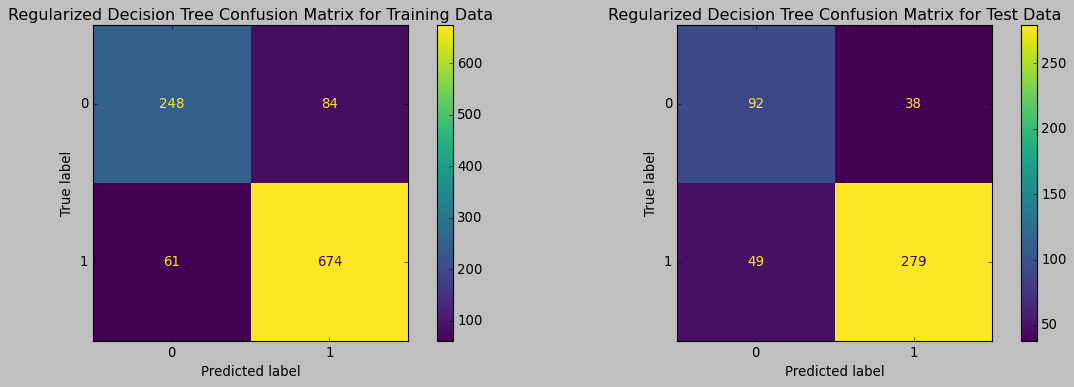

In [1962]:
# Create the confusion matrices
rdt_cm_train = metrics.confusion_matrix(y_train, ytrain_predict)
rdt_cm_test = metrics.confusion_matrix(y_test, ytest_predict)

# Set up the matplotlib figure with 1 row and 2 columns
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Confusion matrix on the training data
rdt_disp_train = ConfusionMatrixDisplay(confusion_matrix=rdt_cm_train, display_labels=dTreeR.classes_)
rdt_disp_train.plot(ax=ax[0])
ax[0].set_title('Regularized Decision Tree Confusion Matrix for Training Data')

# Confusion matrix on the test data
rdt_disp_test = ConfusionMatrixDisplay(confusion_matrix=rdt_cm_test, display_labels=dTreeR.classes_)
rdt_disp_test.plot(ax=ax[1])
ax[1].set_title('Regularized Decision Tree Confusion Matrix for Test Data')

plt.tight_layout()
plt.show()

### Decision Tree Classification Reports for the Training and Test Data

In [1963]:
# Generate classification reports
rdt_report_test = metrics.classification_report(y_test, ytest_predict, output_dict=True)
rdt_report_train = metrics.classification_report(y_train, ytrain_predict, output_dict=True)

# Convert reports to DataFrames
df_rdt_report_test = pd.DataFrame(rdt_report_test).transpose()
df_rdt_report_train = pd.DataFrame(rdt_report_train).transpose()

# Round the DataFrames to 2 decimal places
df_rdt_report_test = df_rdt_report_test.round(2)
df_rdt_report_train = df_rdt_report_train.round(2)

# Concatenate both DataFrames along the columns axis for side-by-side display
df_rdt_reports = pd.concat([df_rdt_report_train.add_suffix('_train'), df_rdt_report_test.add_suffix('_test')], axis=1)

# Display the concatenated DataFrame
print(df_rdt_reports)

              precision_train  recall_train  f1-score_train  support_train  \
0                        0.80          0.75            0.77         332.00   
1                        0.89          0.92            0.90         735.00   
accuracy                 0.86          0.86            0.86           0.86   
macro avg                0.85          0.83            0.84        1067.00   
weighted avg             0.86          0.86            0.86        1067.00   

              precision_test  recall_test  f1-score_test  support_test  
0                       0.65         0.71           0.68        130.00  
1                       0.88         0.85           0.87        328.00  
accuracy                0.81         0.81           0.81          0.81  
macro avg               0.77         0.78           0.77        458.00  
weighted avg            0.82         0.81           0.81        458.00  


### Decision Tree AUC and ROC Curves of Train Data and Test Data

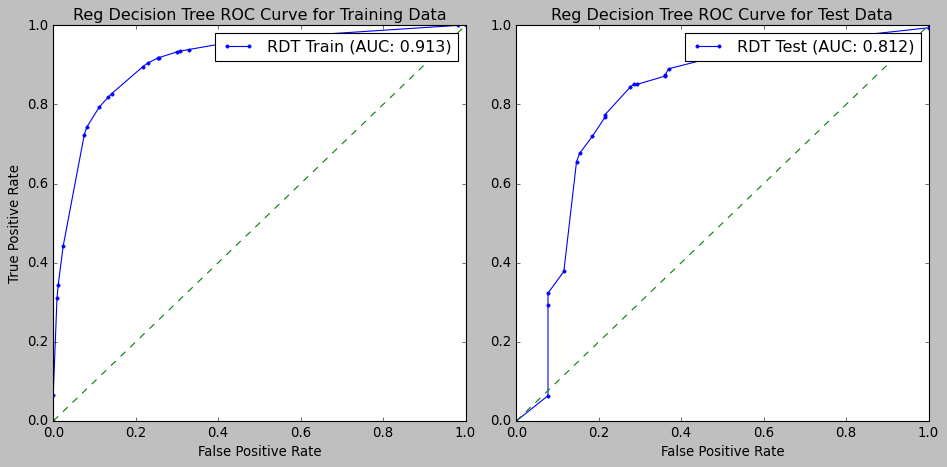

In [1964]:
from sklearn.metrics import roc_curve, roc_auc_score

# predict probabilities for train set
train_probs = dTreeR.predict_proba(X_train)[:, 1]
# calculate AUC for train set
train_auc = roc_auc_score(y_train, train_probs)
# calculate roc curve for train set
train_fpr, train_tpr, _ = roc_curve(y_train, train_probs)

# predict probabilities for test set
test_probs = dTreeR.predict_proba(X_test)[:, 1]
# calculate AUC for test set
test_auc = roc_auc_score(y_test, test_probs)
# calculate roc curve for test set
test_fpr, test_tpr, _ = roc_curve(y_test, test_probs)

# create subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# plot roc curve for the train set
ax[0].plot(train_fpr, train_tpr, marker='.', label='RDT Train (AUC: %.3f)' % train_auc)
ax[0].plot([0, 1], [0, 1], linestyle='--')
ax[0].set_title('Reg Decision Tree ROC Curve for Training Data')
ax[0].set_xlabel('False Positive Rate')
ax[0].set_ylabel('True Positive Rate')
ax[0].legend()

# plot roc curve for the test set
ax[1].plot(test_fpr, test_tpr, marker='.', label='RDT Test (AUC: %.3f)' % test_auc)
ax[1].plot([0, 1], [0, 1], linestyle='--')
ax[1].set_title('Reg Decision Tree ROC Curve for Test Data')
ax[1].set_xlabel('False Positive Rate')
ax[1].legend()

# show the plot
plt.tight_layout()
plt.show()

In [1969]:
cData['vote_Labour'].value_counts()

1    1063
0     462
Name: vote_Labour, dtype: int64

### Cross Validation on Decision Tree

In [2313]:
from sklearn.model_selection import cross_val_score
dTreeR_train_scores = cross_val_score(dTreeR, X_train, y_train, cv=5)
dTreeR_train_scores

array([0.80841121, 0.81308411, 0.83568075, 0.85446009, 0.76525822])

In [2314]:
dTreeR_test_scores = cross_val_score(dTreeR, X_test, y_test, cv=5)
dTreeR_test_scores

array([0.80434783, 0.77173913, 0.7173913 , 0.85714286, 0.79120879])

In [2315]:
print("The Regularized Decision Tree Model's Mean Accuracy Score after Cross Validation on Train Data is", np.mean(dTreeR_train_scores).round(2))
print("The Regularized Decision Tree Model's Mean Accuracy Score after Cross Validation on Test Data is",np.mean(dTreeR_test_scores).round(2))

The Regularized Decision Tree Model's Mean Accuracy Score after Cross Validation on Train Data is 0.82
The Regularized Decision Tree Model's Mean Accuracy Score after Cross Validation on Test Data is 0.79


### SMOTE on Decision Trees

In [2320]:
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 5, random_state=1)
dTreeR_SM_model=dTreeR.fit(X_train_res, y_train_res)

In [2321]:
## Performance Matrix on train data set with SMOTE
y_train_predict = dTreeR_SM_model.predict(X_train_res)
model_score = dTreeR_SM_model.score(X_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, y_train_predict))
print(metrics.classification_report(y_train_res ,y_train_predict))

0.8598639455782313
[[674  61]
 [145 590]]
              precision    recall  f1-score   support

           0       0.82      0.92      0.87       735
           1       0.91      0.80      0.85       735

    accuracy                           0.86      1470
   macro avg       0.86      0.86      0.86      1470
weighted avg       0.86      0.86      0.86      1470



In [2323]:
## Performance Matrix on test data set
y_test_predict = dTreeR_SM_model.predict(X_test)
model_score = dTreeR_SM_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.7751091703056768
[[109  21]
 [ 82 246]]
              precision    recall  f1-score   support

           0       0.57      0.84      0.68       130
           1       0.92      0.75      0.83       328

    accuracy                           0.78       458
   macro avg       0.75      0.79      0.75       458
weighted avg       0.82      0.78      0.78       458



### Hyperparamter Tuning for Decision Tree Model

In [2324]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}

# Initialize the Grid Search model
dt_grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the data
dt_grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", dt_grid_search.best_params_)

# Evaluate the best model
best_dt_model = dt_grid_search.best_estimator_
train_accuracy = best_dt_model.score(X_train, y_train)
test_accuracy = best_dt_model.score(X_test, y_test)

print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")


Fitting 5 folds for each of 324 candidates, totalling 1620 fits


/Users/admin/anaconda3/lib/python3.10/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/admin/anaconda3/lib/python3.10/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/admin/anaconda3/lib/python3.10/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/admin/anaconda3/lib/python3.10/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_feature

Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 2}
Train Accuracy: 0.8622305529522024
Test Accuracy: 0.8296943231441049


/Users/admin/anaconda3/lib/python3.10/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/admin/anaconda3/lib/python3.10/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/admin/anaconda3/lib/python3.10/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/admin/anaconda3/lib/python3.10/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_feature

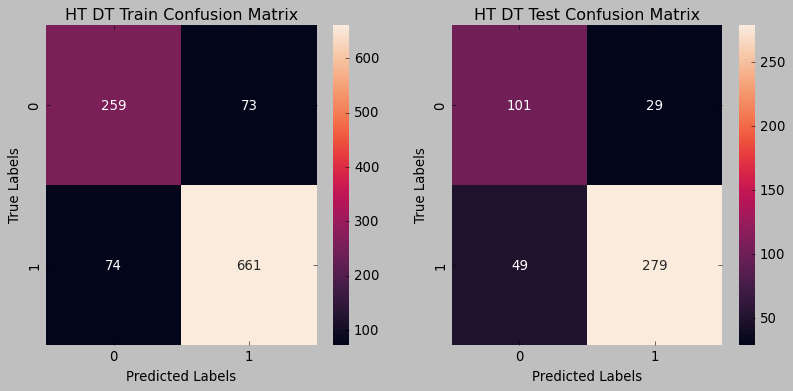

Classification Report - Training Data
              precision    recall  f1-score   support

           0       0.78      0.78      0.78       332
           1       0.90      0.90      0.90       735

    accuracy                           0.86      1067
   macro avg       0.84      0.84      0.84      1067
weighted avg       0.86      0.86      0.86      1067


Classification Report - Test Data
              precision    recall  f1-score   support

           0       0.67      0.78      0.72       130
           1       0.91      0.85      0.88       328

    accuracy                           0.83       458
   macro avg       0.79      0.81      0.80       458
weighted avg       0.84      0.83      0.83       458



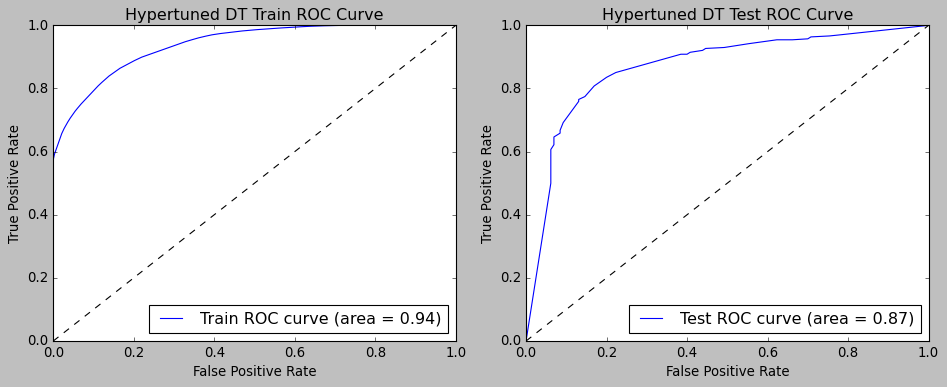

[CV] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=No

In [2325]:
from sklearn.metrics import auc

# ROC AUC Curve after Hypertuning
y_train_prob = best_dt_model.predict_proba(X_train)[:, 1]
y_test_prob = best_dt_model.predict_proba(X_test)[:, 1]

fpr_train, tpr_train, _ = roc_curve(y_train, y_train_prob)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)

roc_auc_train = auc(fpr_train, tpr_train)
roc_auc_test = auc(fpr_test, tpr_test)

# Confusion Matrix after Hypertuning
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

conf_matrix_train = confusion_matrix(y_train, best_dt_model.predict(X_train))
conf_matrix_test = confusion_matrix(y_test, best_dt_model.predict(X_test))

sns.heatmap(conf_matrix_train, annot=True, ax=ax[0], fmt='g')
ax[0].set_title('HT DT Train Confusion Matrix')
ax[0].set_xlabel('Predicted Labels')
ax[0].set_ylabel('True Labels')

sns.heatmap(conf_matrix_test, annot=True, ax=ax[1], fmt='g')
ax[1].set_title('HT DT Test Confusion Matrix')
ax[1].set_xlabel('Predicted Labels')
ax[1].set_ylabel('True Labels')

plt.show()

# Classification Report after Hypertuning
print("Classification Report - Training Data")
print(classification_report(y_train, best_dt_model.predict(X_train)))
print("\nClassification Report - Test Data")
print(classification_report(y_test, best_dt_model.predict(X_test)))

# ROC AUC Curve after Hypertuning
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Train ROC Curve
ax[0].plot(fpr_train, tpr_train, label=f'Train ROC curve (area = {roc_auc_train:.2f})')
ax[0].plot([0, 1], [0, 1], 'k--')
ax[0].set_xlabel('False Positive Rate')
ax[0].set_ylabel('True Positive Rate')
ax[0].set_title('Hypertuned DT Train ROC Curve')
ax[0].legend(loc='lower right')

# Test ROC Curve
ax[1].plot(fpr_test, tpr_test, label=f'Test ROC curve (area = {roc_auc_test:.2f})')
ax[1].plot([0, 1], [0, 1], 'k--')
ax[1].set_xlabel('False Positive Rate')
ax[1].set_ylabel('True Positive Rate')
ax[1].set_title('Hypertuned DT Test ROC Curve')
ax[1].legend(loc='lower right')

plt.tight_layout()
plt.show()


# Machine Learning Techniques 

## Naive Bayes Model

### Import Libraries

In [2033]:
from sklearn.naive_bayes import GaussianNB

### Fit the Model

In [2034]:
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB()

### Naive Bayes Predictions on the Training and Test Data

In [2035]:
ytrain_predict = NB_model.predict(X_train)
ytest_predict = NB_model.predict(X_test)

### Getting the Naive Bayes Prediction Probabilities on Train and Test Data

In [2036]:
# Predict probabilities for training and test data
ytrain_predict_prob = NB_model.predict_proba(X_train)
ytest_predict_prob = NB_model.predict_proba(X_test)

# Convert to DataFrames
df_NB_model_train_prob = pd.DataFrame(ytrain_predict_prob, columns=['Train_Prob_Class_0', 'Train_Prob_Class_1'])
df_NB_model_test_prob = pd.DataFrame(ytest_predict_prob, columns=['Test_Prob_Class_0', 'Test_Prob_Class_1'])

# Concatenate DataFrames for side-by-side display and show the first few rows
print([df_NB_model_train_prob.head()])
print([df_NB_model_test_prob.head()])

[   Train_Prob_Class_0  Train_Prob_Class_1
0            0.716743            0.283257
1            0.269264            0.730736
2            0.106535            0.893465
3            0.162885            0.837115
4            0.025526            0.974474]
[   Test_Prob_Class_0  Test_Prob_Class_1
0           0.992582           0.007418
1           0.872464           0.127536
2           0.434483           0.565517
3           0.536044           0.463956
4           0.242177           0.757823]


### Getting the Actual vs Predicted Classes for Train and Test Data

In [2037]:
# Convert y_test to a pandas Series if it's a DataFrame
if isinstance(y_train, pd.DataFrame):
    y_train_series = y_train.iloc[:, 0]  # Assuming the relevant data is in the first column
else:
    y_train_series = y_train

# Now create the DataFrame for actual vs predicted comparison
actual_vs_predicted_train_df = pd.DataFrame({
    'Actual': y_train_series,
    'Predicted': ytrain_predict
})

# Display the first few rows
print(actual_vs_predicted_train_df.head())

      Actual  Predicted
1453       1          0
275        0          1
1130       1          1
1153       1          1
1172       0          1


In [2038]:
# Convert y_test to a pandas Series if it's a DataFrame
if isinstance(y_test, pd.DataFrame):
    y_test_series = y_test.iloc[:, 0]  # Assuming the relevant data is in the first column
else:
    y_test_series = y_test

# Now create the DataFrame for actual vs predicted comparison
actual_vs_predicted_test_df = pd.DataFrame({
    'Actual': y_test_series,
    'Predicted': ytest_predict
})

# Display the first few rows
print(actual_vs_predicted_test_df.head())

      Actual  Predicted
91         0          0
1194       1          0
201        1          1
613        0          0
283        1          1


### Feature Importance based on Permutation Importance

This method involves randomly shuffling each feature in the test set and measuring the change in the model's performance. A significant decrease in performance indicates that the feature is important.

In [2039]:
from sklearn.inspection import permutation_importance

# Calculating permutation importance
perm_importance = permutation_importance(NB_model, X_test, y_test, n_repeats=30, random_state=42)

# Extracting feature importances and corresponding feature names
feature_importances = perm_importance.importances_mean
features = X_test.columns

# Creating a DataFrame for easier visualization
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sorting the DataFrame based on importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

feature_importance_df


Feature  Importance
4                    Hague    0.064702
3                    Blair    0.043814
5                   Europe    0.030204
1   economic.cond.national    0.018195
6      political.knowledge    0.006841
0                      age    0.003930
2  economic.cond.household    0.002693
7              gender_male    0.002620

### Naive Bayes Accuracy Score on Training and Test Data

In [2040]:
nb_train_model_score = NB_model.score(X_train, y_train)
print("The Naive Bayes Model's Accuracy Score on Train Data is", nb_train_model_score.round(2))
nb_test_model_score = NB_model.score(X_test, y_test)
print("The Naive Bayes Model's Accuracy Score on Test Data is",nb_test_model_score.round(2))

The Naive Bayes Model's Accuracy Score on Train Data is 0.83
The Naive Bayes Model's Accuracy Score on Test Data is 0.83


### Naive Bayes Confusion Matrix on the Training and Test Data

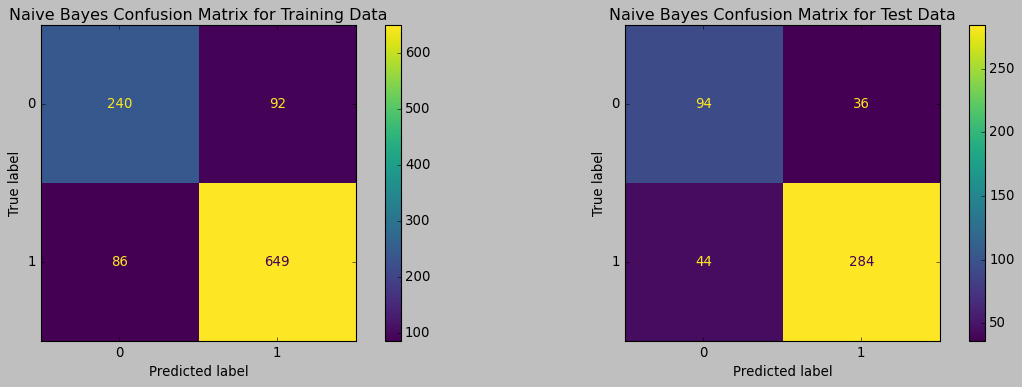

In [2041]:
# Create the confusion matrices
nb_cm_train = metrics.confusion_matrix(y_train, ytrain_predict)
nb_cm_test = metrics.confusion_matrix(y_test, ytest_predict)

# Set up the matplotlib figure with 1 row and 2 columns
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Confusion matrix on the training data
nb_disp_train = ConfusionMatrixDisplay(confusion_matrix=nb_cm_train, display_labels=NB_model.classes_)
nb_disp_train.plot(ax=ax[0])
ax[0].set_title('Naive Bayes Confusion Matrix for Training Data')

# Confusion matrix on the test data
nb_disp_test = ConfusionMatrixDisplay(confusion_matrix=nb_cm_test, display_labels=NB_model.classes_)
nb_disp_test.plot(ax=ax[1])
ax[1].set_title('Naive Bayes Confusion Matrix for Test Data')

plt.tight_layout()
plt.show()


### Naive Bayes Classification Reports for the Train Data and Test Data

In [2042]:
# Generate classification reports
nb_report_test = metrics.classification_report(y_test, ytest_predict, output_dict=True)
nb_report_train = metrics.classification_report(y_train, ytrain_predict, output_dict=True)

# Convert reports to DataFrames
df_nb_report_test = pd.DataFrame(nb_report_test).transpose()
df_nb_report_train = pd.DataFrame(nb_report_train).transpose()

# Round the DataFrames to 2 decimal places
df_nb_report_test = df_nb_report_test.round(2)
df_nb_report_train = df_nb_report_train.round(2)

# Concatenate both DataFrames along the columns axis for side-by-side display
df_nb_reports = pd.concat([df_nb_report_train.add_suffix('_train'), df_nb_report_test.add_suffix('_test')], axis=1)

# Display the concatenated DataFrame
print(df_nb_reports)


              precision_train  recall_train  f1-score_train  support_train  \
0                        0.74          0.72            0.73         332.00   
1                        0.88          0.88            0.88         735.00   
accuracy                 0.83          0.83            0.83           0.83   
macro avg                0.81          0.80            0.80        1067.00   
weighted avg             0.83          0.83            0.83        1067.00   

              precision_test  recall_test  f1-score_test  support_test  
0                       0.68         0.72           0.70        130.00  
1                       0.89         0.87           0.88        328.00  
accuracy                0.83         0.83           0.83          0.83  
macro avg               0.78         0.79           0.79        458.00  
weighted avg            0.83         0.83           0.83        458.00  


### Naive Bayes AUC and ROC Curves of the Train Data and Test Data

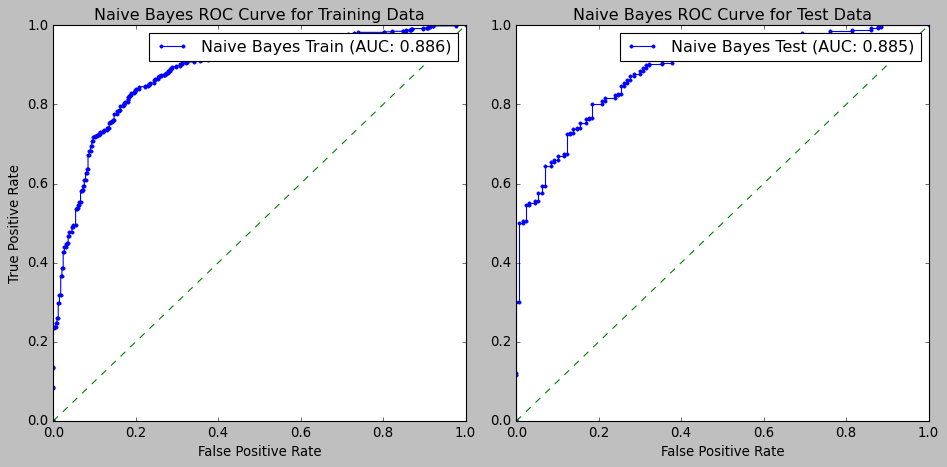

In [2043]:
from sklearn.metrics import roc_curve, roc_auc_score

# predict probabilities for train set
train_probs = NB_model.predict_proba(X_train)[:, 1]
# calculate AUC for train set
train_auc = roc_auc_score(y_train, train_probs)
# calculate roc curve for train set
train_fpr, train_tpr, _ = roc_curve(y_train, train_probs)

# predict probabilities for test set
test_probs = NB_model.predict_proba(X_test)[:, 1]
# calculate AUC for test set
test_auc = roc_auc_score(y_test, test_probs)
# calculate roc curve for test set
test_fpr, test_tpr, _ = roc_curve(y_test, test_probs)

# create subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# plot roc curve for the train set
ax[0].plot(train_fpr, train_tpr, marker='.', label='Naive Bayes Train (AUC: %.3f)' % train_auc)
ax[0].plot([0, 1], [0, 1], linestyle='--')
ax[0].set_title('Naive Bayes ROC Curve for Training Data')
ax[0].set_xlabel('False Positive Rate')
ax[0].set_ylabel('True Positive Rate')
ax[0].legend()

# plot roc curve for the test set
ax[1].plot(test_fpr, test_tpr, marker='.', label='Naive Bayes Test (AUC: %.3f)' % test_auc)
ax[1].plot([0, 1], [0, 1], linestyle='--')
ax[1].set_title('Naive Bayes ROC Curve for Test Data')
ax[1].set_xlabel('False Positive Rate')
ax[1].legend()

# show the plot
plt.tight_layout()
plt.show()

### Cross Validation on Naive Bayes Model

In [2044]:
from sklearn.model_selection import cross_val_score
nb_train_scores = cross_val_score(NB_model, X_train, y_train, cv=5)
nb_train_scores

array([0.81775701, 0.8271028 , 0.82159624, 0.85915493, 0.81690141])

In [2045]:
nb_test_scores = cross_val_score(NB_model, X_test, y_test, cv=5)
nb_test_scores

array([0.84782609, 0.81521739, 0.7826087 , 0.87912088, 0.84615385])

In [2046]:
print("The Naive Bayes Model's Mean Accuracy Score after Cross Validation on Train Data is", np.mean(nb_train_scores).round(2))
print("The Naive Bayes Model's Mean Accuracy Score after Cross Validation on Test Data is",np.mean(nb_test_scores).round(2))



The Naive Bayes Model's Mean Accuracy Score after Cross Validation on Train Data is 0.83
The Naive Bayes Model's Mean Accuracy Score after Cross Validation on Test Data is 0.83


## SMOTE 

In [2047]:
#!pip install imbalanced-learn

In [2048]:
from imblearn.over_sampling import SMOTE

**SMOTE is only applied on the train data set**

In [2049]:
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [2050]:
## Let's check the shape after SMOTE
X_train_res.shape

(1470, 8)

## Naive Bayes with SMOTE

In [2051]:
NB_SM_model = GaussianNB()
NB_SM_model.fit(X_train_res, y_train_res)

GaussianNB()

In [2052]:
## Performance Matrix on train data set with SMOTE
y_train_predict = NB_SM_model.predict(X_train_res)
model_score = NB_SM_model.score(X_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, y_train_predict))
print(metrics.classification_report(y_train_res ,y_train_predict))

0.8258503401360544
[[599 136]
 [120 615]]
              precision    recall  f1-score   support

           0       0.83      0.81      0.82       735
           1       0.82      0.84      0.83       735

    accuracy                           0.83      1470
   macro avg       0.83      0.83      0.83      1470
weighted avg       0.83      0.83      0.83      1470



In [2053]:
## Performance Matrix on test data set
y_test_predict = NB_SM_model.predict(X_test)
model_score = NB_SM_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.7991266375545851
[[103  27]
 [ 65 263]]
              precision    recall  f1-score   support

           0       0.61      0.79      0.69       130
           1       0.91      0.80      0.85       328

    accuracy                           0.80       458
   macro avg       0.76      0.80      0.77       458
weighted avg       0.82      0.80      0.81       458



## KNN Model

### Import Libraries

In [2171]:
from sklearn.neighbors import KNeighborsClassifier

### Scaling Data for KNN

In [2172]:
from sklearn.preprocessing import MinMaxScaler

# Create a StandardScaler object
scaler = MinMaxScaler()

# Scale the X train data
scaled_X_train_data = scaler.fit_transform(X_train)

# Convert the scaled X train data back to a DataFrame
scaled_X_train_df = pd.DataFrame(scaled_X_train_data, columns=X_train.columns)

#Reset index of scaled X train data
scaled_X_train_df = scaled_X_train_df.reset_index(drop=True)

# Scale the X test data
scaled_X_test_data = scaler.fit_transform(X_test)

# Convert the scaled X test data back to a DataFrame
scaled_X_test_df = pd.DataFrame(scaled_X_test_data, columns=X_test.columns)

#Reset index of scaled X test data
scaled_X_test_df = scaled_X_test_df.reset_index(drop=True)

In [2173]:
print(scaled_X_train_df.head())

        age  economic.cond.national  economic.cond.household  Blair  Hague  \
0  0.550725                    0.50                     0.50   0.25   0.25   
1  0.362319                    0.50                     0.50   0.25   0.25   
2  0.724638                    0.75                     0.75   0.75   0.75   
3  0.478261                    0.25                     0.50   0.75   0.25   
4  0.000000                    0.75                     1.00   0.75   0.75   

   Europe  political.knowledge  gender_male  
0     1.0             0.666667          0.0  
1     0.7             0.000000          0.0  
2     0.6             0.000000          1.0  
3     0.5             0.666667          0.0  
4     0.5             0.000000          1.0  


In [2174]:
print(scaled_X_test_df.head())

        age  economic.cond.national  economic.cond.household  Blair  Hague  \
0  0.367647                    0.00                     0.00   0.25   0.75   
1  0.147059                    0.50                     0.50   0.25   0.75   
2  0.397059                    0.25                     0.25   0.75   0.75   
3  0.088235                    0.25                     0.50   0.75   0.75   
4  0.264706                    0.50                     0.50   0.25   0.25   

   Europe  political.knowledge  gender_male  
0     0.7             1.000000          0.0  
1     0.8             0.666667          1.0  
2     0.3             0.666667          1.0  
3     0.6             1.000000          1.0  
4     0.8             0.000000          1.0  


### Fit the Model

In [2175]:
KNN_model=KNeighborsClassifier()
KNN_model.fit(scaled_X_train_df,y_train)

KNeighborsClassifier()

### KNN Predictions on the Training and Test Data

In [2176]:
y_train_predict = KNN_model.predict(scaled_X_train_df)
y_test_predict = KNN_model.predict(scaled_X_test_df)

### Getting the KNN Model Prediction Probabilities for Train and Test Sets

In [2177]:
# Predict probabilities for training and test data
y_train_predict_prob = KNN_model.predict_proba(scaled_X_train_df)
y_test_predict_prob = KNN_model.predict_proba(scaled_X_test_df)

# Convert to DataFrames
df_KNN_model_train_prob = pd.DataFrame(y_train_predict_prob, columns=['Train_Prob_Class_0', 'Train_Prob_Class_1'])
df_KNN_model_test_prob = pd.DataFrame(y_test_predict_prob, columns=['Test_Prob_Class_0', 'Test_Prob_Class_1'])

# Concatenate DataFrames for side-by-side display and show the first few rows
print([df_KNN_model_train_prob.head()])
print([df_KNN_model_test_prob.head()])

[   Train_Prob_Class_0  Train_Prob_Class_1
0                 0.6                 0.4
1                 0.4                 0.6
2                 0.2                 0.8
3                 0.0                 1.0
4                 0.2                 0.8]
[   Test_Prob_Class_0  Test_Prob_Class_1
0                0.8                0.2
1                0.8                0.2
2                0.2                0.8
3                0.4                0.6
4                0.0                1.0]


### Getting the Actual vs Predicted Classes for Train and Test Data

In [2178]:
# Convert y_test to a pandas Series if it's a DataFrame
if isinstance(y_train, pd.DataFrame):
    y_train_series = y_train.iloc[:, 0]  # Assuming the relevant data is in the first column
else:
    y_train_series = y_train

# Now create the DataFrame for actual vs predicted comparison
actual_vs_predicted_train_df = pd.DataFrame({
    'Actual': y_train_series,
    'Predicted': y_train_predict
})

# Display the first few rows
print(actual_vs_predicted_train_df.head())

      Actual  Predicted
1453       1          0
275        0          1
1130       1          1
1153       1          1
1172       0          1


In [2179]:
# Convert y_test to a pandas Series if it's a DataFrame
if isinstance(y_test, pd.DataFrame):
    y_test_series = y_test.iloc[:, 0]  # Assuming the relevant data is in the first column
else:
    y_test_series = y_test

# Now create the DataFrame for actual vs predicted comparison
actual_vs_predicted_test_df = pd.DataFrame({
    'Actual': y_test_series,
    'Predicted': y_test_predict
})

# Display the first few rows
print(actual_vs_predicted_test_df.head())

      Actual  Predicted
91         0          0
1194       1          0
201        1          1
613        0          1
283        1          1


### KNN Accuracy Score on Training and Test Data

In [2180]:
knn_train_model_score = KNN_model.score(scaled_X_train_df, y_train)
print("The KNN Model's Accuracy Score on Train Data is", knn_train_model_score.round(2))
knn_test_model_score = KNN_model.score(scaled_X_test_df, y_test)
print("The KNN Bayes Model's Accuracy Score on Test Data is",knn_test_model_score.round(2))

The KNN Model's Accuracy Score on Train Data is 0.87
The KNN Bayes Model's Accuracy Score on Test Data is 0.83


In [2181]:
# Generate classification reports
knn_report_test = metrics.classification_report(y_test, y_test_predict, output_dict=True)
knn_report_train = metrics.classification_report(y_train, y_train_predict, output_dict=True)

# Convert reports to DataFrames
df_knn_report_test = pd.DataFrame(knn_report_test).transpose()
df_knn_report_train = pd.DataFrame(knn_report_train).transpose()

# Round the DataFrames to 2 decimal places
df_knn_report_test = df_knn_report_test.round(2)
df_knn_report_train = df_knn_report_train.round(2)

# Concatenate both DataFrames along the columns axis for side-by-side display
df_knn_reports = pd.concat([df_knn_report_train.add_suffix('_train'), df_knn_report_test.add_suffix('_test')], axis=1)

# Display the concatenated DataFrame
print(df_knn_reports)

              precision_train  recall_train  f1-score_train  support_train  \
0                        0.80          0.76            0.78         332.00   
1                        0.89          0.91            0.90         735.00   
accuracy                 0.87          0.87            0.87           0.87   
macro avg                0.85          0.84            0.84        1067.00   
weighted avg             0.86          0.87            0.86        1067.00   

              precision_test  recall_test  f1-score_test  support_test  
0                       0.68         0.73           0.70        130.00  
1                       0.89         0.86           0.88        328.00  
accuracy                0.83         0.83           0.83          0.83  
macro avg               0.78         0.80           0.79        458.00  
weighted avg            0.83         0.83           0.83        458.00  


### Let's check for what is the optimum no. of K

In [2182]:
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in range(1,20,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(scaled_X_train_df, y_train)
    # evaluate test accuracy
    scores = knn.score(scaled_X_test_df, y_test)
    ac_scores.append(scores)

# changing to misclassification error
MCE = [1 - x for x in ac_scores]
MCE

[0.22925764192139741,
 0.1899563318777293,
 0.1746724890829694,
 0.16157205240174677,
 0.17248908296943233,
 0.17248908296943233,
 0.17685589519650657,
 0.1746724890829694,
 0.17685589519650657,
 0.17685589519650657]

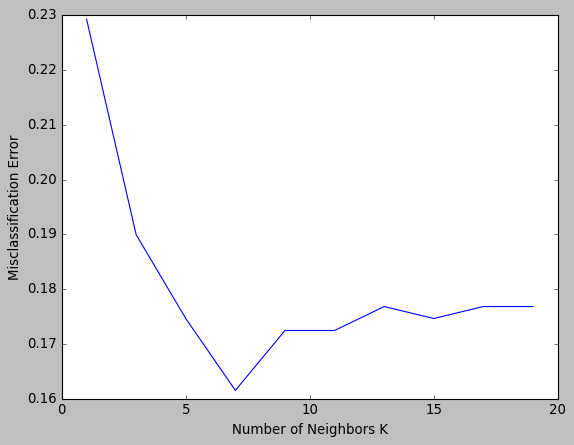

In [2183]:
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(range(1,20,2), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

### Default value n_neighbors=5, lets check the performance for K=7

In [2184]:
from sklearn.neighbors import KNeighborsClassifier

KNN_7_model=KNeighborsClassifier(n_neighbors=7)
KNN_7_model.fit(scaled_X_train_df,y_train)

KNeighborsClassifier(n_neighbors=7)

In [2185]:
## Performance Matrix on train data set
y_7_train_predict = KNN_7_model.predict(scaled_X_train_df)
KNN_7_train_model_score = KNN_7_model.score(scaled_X_train_df, y_train).round(2)
print(KNN_7_train_model_score)

0.86


In [2186]:
## Performance Matrix on train data set
y_7_test_predict = KNN_7_model.predict(scaled_X_test_df)
KNN_7_test_model_score = KNN_7_model.score(scaled_X_test_df, y_test).round(2)
print(KNN_7_test_model_score)

0.84


### KNN Confusion Matrix on the Training and Test Data

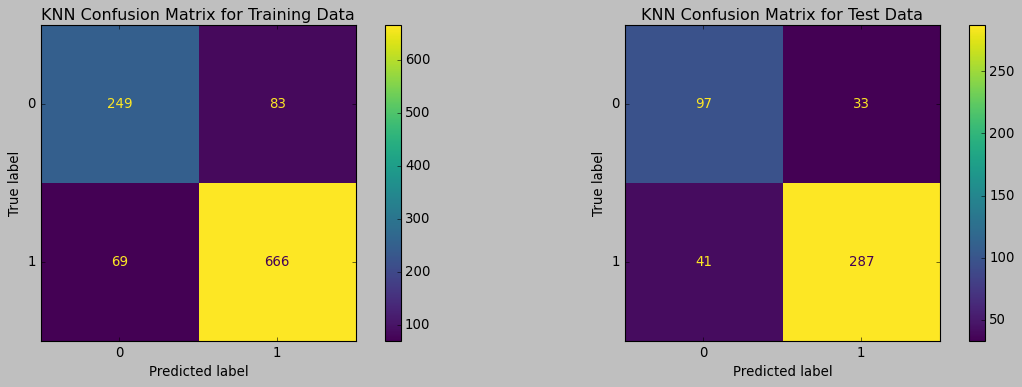

In [2187]:
# Create the confusion matrices
knn_cm_train = metrics.confusion_matrix(y_train, y_7_train_predict)
knn_cm_test = metrics.confusion_matrix(y_test, y_7_test_predict)

# Set up the matplotlib figure with 1 row and 2 columns
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Confusion matrix on the training data
knn_disp_train = ConfusionMatrixDisplay(confusion_matrix=knn_cm_train, display_labels=KNN_7_model.classes_)
knn_disp_train.plot(ax=ax[0])
ax[0].set_title('KNN Confusion Matrix for Training Data')

# Confusion matrix on the test data
disp_test = ConfusionMatrixDisplay(confusion_matrix=knn_cm_test, display_labels=KNN_7_model.classes_)
disp_test.plot(ax=ax[1])
ax[1].set_title('KNN Confusion Matrix for Test Data')

plt.tight_layout()
plt.show()

### KNN Classification Reports for the Train Data and Test Data

In [2188]:
# Generate classification reports
knn_report_test = metrics.classification_report(y_test, y_7_test_predict, output_dict=True)
knn_report_train = metrics.classification_report(y_train, y_7_train_predict, output_dict=True)

# Convert reports to DataFrames
df_knn_report_test = pd.DataFrame(knn_report_test).transpose()
df_knn_report_train = pd.DataFrame(knn_report_train).transpose()

# Round the DataFrames to 2 decimal places
df_knn_report_test = df_knn_report_test.round(2)
df_knn_report_train = df_knn_report_train.round(2)

# Concatenate both DataFrames along the columns axis for side-by-side display
df_knn_reports = pd.concat([df_knn_report_train.add_suffix('_train'), df_knn_report_test.add_suffix('_test')], axis=1)

# Display the concatenated DataFrame
print(df_knn_reports)

              precision_train  recall_train  f1-score_train  support_train  \
0                        0.78          0.75            0.77         332.00   
1                        0.89          0.91            0.90         735.00   
accuracy                 0.86          0.86            0.86           0.86   
macro avg                0.84          0.83            0.83        1067.00   
weighted avg             0.86          0.86            0.86        1067.00   

              precision_test  recall_test  f1-score_test  support_test  
0                       0.70         0.75           0.72        130.00  
1                       0.90         0.88           0.89        328.00  
accuracy                0.84         0.84           0.84          0.84  
macro avg               0.80         0.81           0.80        458.00  
weighted avg            0.84         0.84           0.84        458.00  


### KNN AUC and ROC Curves of the Train Data and Test Data

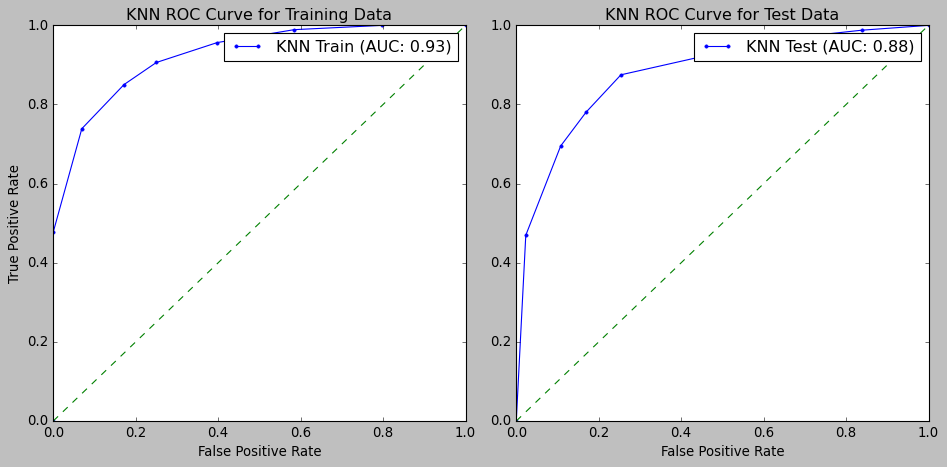

In [2189]:
from sklearn.metrics import roc_curve, roc_auc_score

# predict probabilities for train set
train_probs = KNN_7_model.predict_proba(scaled_X_train_df)[:, 1]
# calculate AUC for train set
train_auc = roc_auc_score(y_train, train_probs)
# calculate roc curve for train set
train_fpr, train_tpr, _ = roc_curve(y_train, train_probs)

# predict probabilities for test set
test_probs = KNN_7_model.predict_proba(scaled_X_test_df)[:, 1]
# calculate AUC for test set
test_auc = roc_auc_score(y_test, test_probs)
# calculate roc curve for test set
test_fpr, test_tpr, _ = roc_curve(y_test, test_probs)

# create subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# plot roc curve for the train set
ax[0].plot(train_fpr, train_tpr, marker='.', label='KNN Train (AUC: %.2f)' % train_auc)
ax[0].plot([0, 1], [0, 1], linestyle='--')
ax[0].set_title('KNN ROC Curve for Training Data')
ax[0].set_xlabel('False Positive Rate')
ax[0].set_ylabel('True Positive Rate')
ax[0].legend()

# plot roc curve for the test set
ax[1].plot(test_fpr, test_tpr, marker='.', label='KNN Test (AUC: %.2f)' % test_auc)
ax[1].plot([0, 1], [0, 1], linestyle='--')
ax[1].set_title('KNN ROC Curve for Test Data')
ax[1].set_xlabel('False Positive Rate')
ax[1].legend()

# show the plot
plt.tight_layout()
plt.show()

### Cross Validation on KNN Model

In [2190]:
from sklearn.model_selection import cross_val_score
knn_train_scores = cross_val_score(KNN_7_model, scaled_X_train_df, y_train, cv=5)
knn_train_scores

array([0.77570093, 0.84579439, 0.77934272, 0.86384977, 0.80751174])

In [2191]:
knn_test_scores = cross_val_score(KNN_7_model, scaled_X_test_df, y_test, cv=5)
knn_test_scores

array([0.82608696, 0.82608696, 0.7826087 , 0.86813187, 0.79120879])

In [2192]:
print("The KNN Model's Mean Accuracy Score after Cross Validation on Train Data is", np.mean(knn_train_scores).round(2))
print("The KNN Model's Mean Accuracy Score after Cross Validation on Test Data is",np.mean(knn_test_scores).round(2))


The KNN Model's Mean Accuracy Score after Cross Validation on Train Data is 0.81
The KNN Model's Mean Accuracy Score after Cross Validation on Test Data is 0.82


### SMOTE on KNN Model

In [2193]:
sm_knn = SMOTE(random_state=2)
scaled_X_train_res, y_train_res = sm_knn.fit_resample(scaled_X_train_df, y_train)

In [2194]:
KNN_SM_model = KNeighborsClassifier(n_neighbors=7)
KNN_SM_model.fit(scaled_X_train_res, y_train_res)

KNeighborsClassifier(n_neighbors=7)

In [2195]:
## Performance Matrix on train data set with SMOTE
y_train_predict = KNN_SM_model.predict(scaled_X_train_res)
model_score = KNN_SM_model.score(scaled_X_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, y_train_predict))
print(metrics.classification_report(y_train_res ,y_train_predict))

0.8659863945578231
[[672  63]
 [134 601]]
              precision    recall  f1-score   support

           0       0.83      0.91      0.87       735
           1       0.91      0.82      0.86       735

    accuracy                           0.87      1470
   macro avg       0.87      0.87      0.87      1470
weighted avg       0.87      0.87      0.87      1470



In [2196]:
## Performance Matrix on test data set
y_test_predict = KNN_SM_model.predict(scaled_X_test_df)
model_score = KNN_SM_model.score(scaled_X_test_df, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.7685589519650655
[[109  21]
 [ 85 243]]
              precision    recall  f1-score   support

           0       0.56      0.84      0.67       130
           1       0.92      0.74      0.82       328

    accuracy                           0.77       458
   macro avg       0.74      0.79      0.75       458
weighted avg       0.82      0.77      0.78       458



### Hypertuning Parameters of KNN Model using Grid Search CV

Using Grid Search CV to hyperparameter tune a K-Nearest Neighbors (KNN) model involves hyperparameters specific to the KNN algorithm. 

Key parameters in KNN include the number of neighbors (n_neighbors), the distance metric (metric), and the type of weight function used in prediction (weights).

Here's how we will do it:

Set Up Parameter Grid:

Define a grid of parameters to search over. For KNN, common parameters to tune include:

1. n_neighbors: The number of neighbors to use.
2. weights: Options like 'uniform' (all points in the neighborhood are weighted equally) or 'distance' (weights points by the inverse of their distance).
3. metric: The distance metric to use, like 'euclidean', 'manhattan', etc.

Initialize Grid Search:

Set up the Grid Search with the KNN model, parameter grid, and scoring metric of your choice. Also, define the number of folds for cross-validation.

Fit Grid Search on Training Data:

Fit the Grid Search model to your training data.

Evaluate the Best Model:

Determine the best parameters and evaluate this model on both the training and test datasets.

Compare with Baseline:

Compare the performance of the tuned model with your baseline model.

In [2197]:
import warnings
warnings.filterwarnings('ignore')

warnings.filterwarnings('ignore', category=UserWarning)

from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid_knn = {
    'n_neighbors': range(1, 31),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Initialize the Grid Search model
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, verbose=1, cv=5, n_jobs=-1)

# Fit the grid search to the data
grid_knn.fit(scaled_X_train_df, y_train)

# Best parameters
print("Best Parameters:", grid_knn.best_params_)

# Evaluate the best model
best_model_knn = grid_knn.best_estimator_

# Assess the best model on training and test data
train_accuracy_knn = best_model_knn.score(scaled_X_train_df, y_train).round(2)
test_accuracy_knn = best_model_knn.score(scaled_X_test_df, y_test).round(2)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


/Users/admin/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/admin/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/admin/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/admin/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'uniform'}


/Users/admin/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/admin/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/admin/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/admin/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

In [2198]:
print(f"KNN Training Accuracy after Hypertuning Parameters using Grid Search CV is: {train_accuracy_knn}")
print(f"KNN Test Accuracyafter Hypertuning Parameters using Grid Search CV is: {test_accuracy_knn}")

KNN Training Accuracy after Hypertuning Parameters using Grid Search CV is: 0.84
KNN Test Accuracyafter Hypertuning Parameters using Grid Search CV is: 0.83


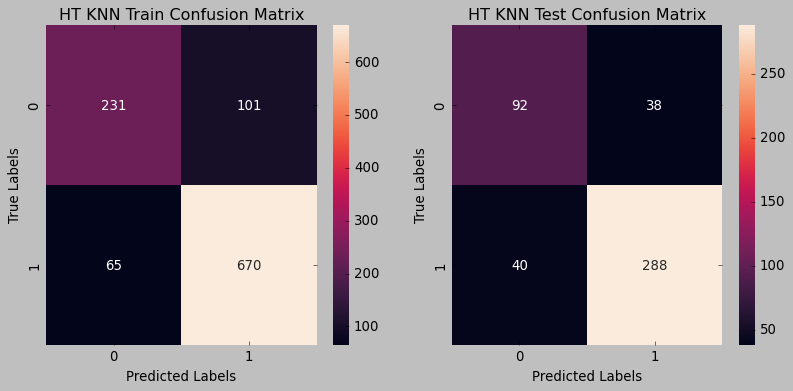

Classification Report - Training Data
              precision    recall  f1-score   support

           0       0.78      0.70      0.74       332
           1       0.87      0.91      0.89       735

    accuracy                           0.84      1067
   macro avg       0.82      0.80      0.81      1067
weighted avg       0.84      0.84      0.84      1067


Classification Report - Test Data
              precision    recall  f1-score   support

           0       0.70      0.71      0.70       130
           1       0.88      0.88      0.88       328

    accuracy                           0.83       458
   macro avg       0.79      0.79      0.79       458
weighted avg       0.83      0.83      0.83       458



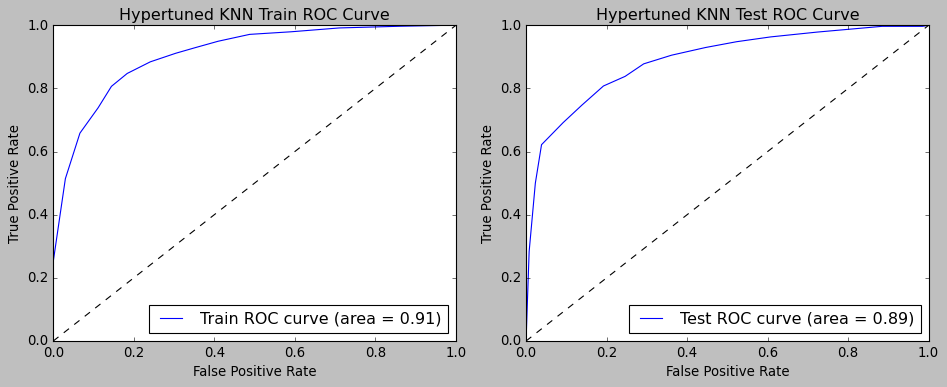

In [2199]:
# Confusion Matrix after Hypertuning
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

conf_matrix_train = confusion_matrix(y_train, best_model_knn.predict(scaled_X_train_df))
conf_matrix_test = confusion_matrix(y_test, best_model_knn.predict(scaled_X_test_df))

sns.heatmap(conf_matrix_train, annot=True, ax=ax[0], fmt='g')
ax[0].set_title('HT KNN Train Confusion Matrix')
ax[0].set_xlabel('Predicted Labels')
ax[0].set_ylabel('True Labels')

sns.heatmap(conf_matrix_test, annot=True, ax=ax[1], fmt='g')
ax[1].set_title('HT KNN Test Confusion Matrix')
ax[1].set_xlabel('Predicted Labels')
ax[1].set_ylabel('True Labels')

plt.show()

# Classification Report after Hypertuning
print("Classification Report - Training Data")
print(classification_report(y_train, best_model_knn.predict(scaled_X_train_df)))
print("\nClassification Report - Test Data")
print(classification_report(y_test, best_model_knn.predict(scaled_X_test_df)))

# ROC AUC Curve after Hypertuning
y_train_prob = best_model_knn.predict_proba(scaled_X_train_df)[:, 1]
y_test_prob = best_model_knn.predict_proba(scaled_X_test_df)[:, 1]

fpr_train, tpr_train, _ = roc_curve(y_train, y_train_prob)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)

roc_auc_train = auc(fpr_train, tpr_train)
roc_auc_test = auc(fpr_test, tpr_test)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Train ROC Curve
ax[0].plot(fpr_train, tpr_train, label=f'Train ROC curve (area = {roc_auc_train:.2f})')
ax[0].plot([0, 1], [0, 1], 'k--')
ax[0].set_xlabel('False Positive Rate')
ax[0].set_ylabel('True Positive Rate')
ax[0].set_title('Hypertuned KNN Train ROC Curve')
ax[0].legend(loc='lower right')

# Test ROC Curve
ax[1].plot(fpr_test, tpr_test, label=f'Test ROC curve (area = {roc_auc_test:.2f})')
ax[1].plot([0, 1], [0, 1], 'k--')
ax[1].set_xlabel('False Positive Rate')
ax[1].set_ylabel('True Positive Rate')
ax[1].set_title('Hypertuned KNN Test ROC Curve')
ax[1].legend(loc='lower right')

plt.tight_layout()
plt.show()



## Random Forest

### Import Libraries

In [2200]:
from sklearn.ensemble import RandomForestClassifier

### Fit the Model

In [2201]:
RF_model=RandomForestClassifier(n_estimators=100,random_state=1)
RF_model.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

### Random Forest Predictions on the Training and Test Data

In [2202]:
y_train_predict = RF_model.predict(X_train)
y_test_predict = RF_model.predict(X_test)

### Getting the Random Forest Prediction Probabilities for Train and Test Data

In [2203]:
# Predict probabilities for training and test data
y_train_predict_prob = RF_model.predict_proba(X_train)
y_test_predict_prob = RF_model.predict_proba(X_test)

# Convert to DataFrames
df_RF_model_train_prob = pd.DataFrame(y_train_predict_prob, columns=['Train_Prob_Class_0', 'Train_Prob_Class_1'])
df_RF_model_test_prob = pd.DataFrame(y_test_predict_prob, columns=['Test_Prob_Class_0', 'Test_Prob_Class_1'])

# Concatenate DataFrames for side-by-side display and show the first few rows
print([df_RF_model_train_prob.head()])
print([df_RF_model_test_prob.head()])

[   Train_Prob_Class_0  Train_Prob_Class_1
0                0.31                0.69
1                0.76                0.24
2                0.10                0.90
3                0.04                0.96
4                0.62                0.38]
[   Test_Prob_Class_0  Test_Prob_Class_1
0               0.74               0.26
1               0.83               0.17
2               0.23               0.77
3               0.40               0.60
4               0.11               0.89]


### Check Actual vs Predicted Class for Train and Test Data

In [2204]:
# Convert y_train to a pandas Series if it's a DataFrame
if isinstance(y_train, pd.DataFrame):
    y_train_series = y_train.iloc[:, 0]  # Assuming the relevant data is in the first column
else:
    y_train_series = y_train

# Now create the DataFrame for actual vs predicted comparison
actual_vs_predicted_train_df = pd.DataFrame({
    'Actual': y_train_series,
    'Predicted': y_train_predict
})

# Display the first few rows
print(actual_vs_predicted_train_df.head())

      Actual  Predicted
1453       1          1
275        0          0
1130       1          1
1153       1          1
1172       0          0


In [2205]:
# Convert y_test to a pandas Series if it's a DataFrame
if isinstance(y_test, pd.DataFrame):
    y_test_series = y_test.iloc[:, 0]  # Assuming the relevant data is in the first column
else:
    y_test_series = y_test

# Now create the DataFrame for actual vs predicted comparison
actual_vs_predicted_test_df = pd.DataFrame({
    'Actual': y_test_series,
    'Predicted': y_test_predict
})

# Display the first few rows
print(actual_vs_predicted_test_df.head())

      Actual  Predicted
91         0          0
1194       1          0
201        1          1
613        0          1
283        1          1


In [2206]:
# Extracting feature importances from the trained Random Forest model
feature_importances_rf = RF_model.feature_importances_

# Creating a DataFrame for easier visualization
feature_importance_rf_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances_rf})

# Sorting the DataFrame based on importance
feature_importance_rf_df = feature_importance_rf_df.sort_values(by='Importance', ascending=False)

feature_importance_rf_df


Feature  Importance
0                      age    0.207688
5                   Europe    0.205643
4                    Hague    0.183971
3                    Blair    0.124284
6      political.knowledge    0.091294
1   economic.cond.national    0.080713
2  economic.cond.household    0.075604
7              gender_male    0.030803

#### Insights on Feature Importance as per Random Forest Ensemble Learning Method

The varying importance of the feature "age" across different models like Random Forest, Logistic Regression, Naive Bayes, Decision Tree, and Linear Discriminant Analysis (LDA) can be attributed to several factors:
•	Each model has a different structure and makes different assumptions about the data. For example, Logistic Regression assumes a linear relationship between the log odds of the outcome and the features. Naive Bayes relies on the assumption of independence between features. Decision Trees split data based on the feature that provides the best separation, and this process can be influenced by the way features interact. Random Forest, being an ensemble of decision trees, might capture more complex interactions and non-linear relationships between features. LDA assumes that different classes have the same covariance matrix. 
•	Random Forest is particularly good at capturing interactions between features. If "age" interacts in complex ways with other features to influence the target variable, Random Forest might capture this more effectively than models like Logistic Regression or Naive Bayes, which consider features independently or linearly.
•	If the relationship between "age" and the target variable is non-linear, models like Random Forest or Decision Trees might be better at capturing this relationship compared to Logistic Regression or LDA, which are more suited to linear relationships.
•	The distribution and variance of "age" in the dataset can influence its importance in different models. Some models are more sensitive to the scale and distribution of features.
The variance in the importance of the feature "Blair" across different models, including its lesser importance in Random Forest compared to its higher significance in Logistic Regression, Naive Bayes, Decision Tree, and Linear Discriminant Analysis (LDA), can be attributed to several factors related to how these models operate and interact with the data:
•	Random Forest is an ensemble of decision trees and is adept at capturing complex interactions between features. If "Blair" doesn't interact strongly with other features or if its influence is more straightforward, its importance might be less pronounced in Random Forest compared to models that don't capture interactions as effectively.
•	In contrast, Logistic Regression and Naive Bayes might assign more importance to "Blair" if it has a strong linear relationship or independent correlation with the target variable.
•	Random Forest can model non-linear relationships and may prioritize features that create better splits at the top of the trees. If other features offer more complex, non-linear relationships or better splitting criteria, "Blair" might be less emphasized.
•	Conversely, in models like Logistic Regression or LDA, which are linear, the importance of "Blair" might be more pronounced if it has a linear relationship with the target.
•	Random Forest reduces variance by averaging multiple decision trees, which can lead to a more balanced feature importance distribution, especially if the influence of "Blair" is inconsistent across individual trees.
•	Single decision trees might overfit to "Blair" if it shows a strong signal, but this effect is mitigated in an ensemble approach like Random Forest.
•	In Decision Trees, and hence in Random Forest, the way data is split at each node can affect feature importance. If splits based on "Blair" are less effective in reducing impurity compared to splits based on other features, its importance will be lower in Random Forest.
•	Different models have varying sensitivities to different types of feature relationships. Random Forest's ensemble nature and decision tree mechanics might lead it to be less sensitive to the particular characteristics of "Blair" that are more influential in models like Logistic Regression or Naive Bayes.

### Fit Random Forest on Scaled DF

In [2207]:
RF_scaled_model=RandomForestClassifier(n_estimators=100,random_state=1)
RF_scaled_model.fit(scaled_X_train_df, y_train)

RandomForestClassifier(random_state=1)

In [2208]:
scaled_y_train_predict = RF_scaled_model.predict(scaled_X_train_df)
scaled_y_test_predict = RF_scaled_model.predict(scaled_X_test_df)

In [2209]:
# Predict probabilities for training and test data
scaled_y_train_predict_prob = RF_scaled_model.predict_proba(scaled_X_train_df)
scaled_y_test_predict_prob = RF_scaled_model.predict_proba(scaled_X_test_df)

# Convert to DataFrames
scaled_df_RF_model_train_prob = pd.DataFrame(scaled_y_train_predict_prob, columns=['Train_Prob_Class_0', 'Train_Prob_Class_1'])
scaled_df_RF_model_test_prob = pd.DataFrame(scaled_y_test_predict_prob, columns=['Test_Prob_Class_0', 'Test_Prob_Class_1'])

# Concatenate DataFrames for side-by-side display and show the first few rows
print([scaled_df_RF_model_train_prob.head()])
print([scaled_df_RF_model_test_prob.head()])

[   Train_Prob_Class_0  Train_Prob_Class_1
0                0.31                0.69
1                0.76                0.24
2                0.10                0.90
3                0.04                0.96
4                0.62                0.38]
[   Test_Prob_Class_0  Test_Prob_Class_1
0               0.74               0.26
1               0.84               0.16
2               0.29               0.71
3               0.42               0.58
4               0.13               0.87]


### Check Feature Importance as per Random Forest on Scaled DF

In [2210]:
# Extracting feature importances from the trained Random Forest model
scaled_feature_importances_rf = RF_scaled_model.feature_importances_

# Creating a DataFrame for easier visualization
scaled_feature_importance_rf_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances_rf})

# Sorting the DataFrame based on importance
scaled_feature_importance_rf_df = scaled_feature_importance_rf_df.sort_values(by='Importance', ascending=False)

scaled_feature_importance_rf_df

Feature  Importance
0                      age    0.207688
5                   Europe    0.205643
4                    Hague    0.183971
3                    Blair    0.124284
6      political.knowledge    0.091294
1   economic.cond.national    0.080713
2  economic.cond.household    0.075604
7              gender_male    0.030803

### Insights of Random Forest Feature Importance on Scaled Data

After scaling the features and retraining the Random Forest model, the revised feature importance analysis yields the following results:

Age continues to be the most important feature, with its importance remaining relatively high (20.83%). This suggests that the importance of "age" in the model's predictions is consistent, regardless of the scaling of the features.

Scaling the features did not significantly alter the relative importance of "age" in the Random Forest model. This indicates that the importance attributed to "age" by the model is robust to changes in the scale of the input features, further reinforcing its relevance in the model's decision-making process. ​

### Random Forest Accuracy Score on Training and Test Data

In [2211]:
rf_train_model_score = RF_model.score(X_train, y_train)
print("The Random Forest Model's Accuracy Score on Train Data is", rf_train_model_score.round(2))
rf_test_model_score = RF_model.score(X_test, y_test)
print("The Random Forest Model's Accuracy Score on Test Data is", rf_test_model_score.round(2))

The Random Forest Model's Accuracy Score on Train Data is 1.0
The Random Forest Model's Accuracy Score on Test Data is 0.82


### Random Forest Confusion Matrix on the Training and Test Data

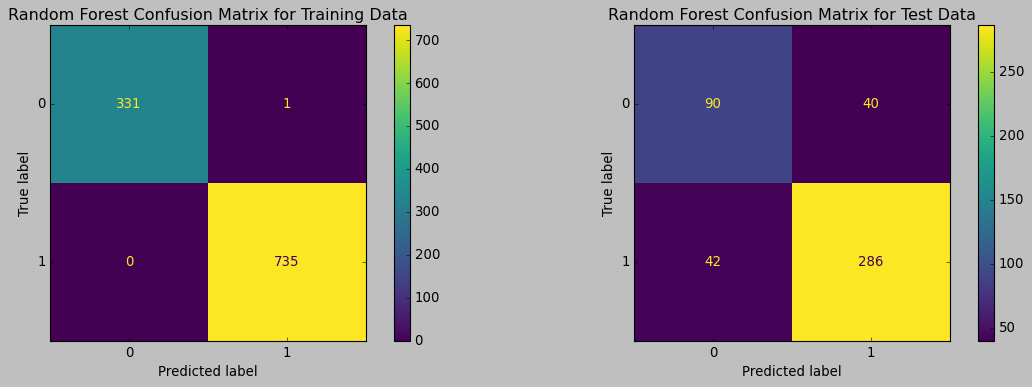

In [2212]:
# Create the confusion matrices
rf_cm_train = metrics.confusion_matrix(y_train, y_train_predict)
rf_cm_test = metrics.confusion_matrix(y_test, y_test_predict)

# Set up the matplotlib figure with 1 row and 2 columns
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Confusion matrix on the training data
rf_disp_train = ConfusionMatrixDisplay(confusion_matrix=rf_cm_train, display_labels=RF_model.classes_)
rf_disp_train.plot(ax=ax[0])
ax[0].set_title('Random Forest Confusion Matrix for Training Data')

# Confusion matrix on the test data
rf_disp_test = ConfusionMatrixDisplay(confusion_matrix=rf_cm_test, display_labels=RF_model.classes_)
rf_disp_test.plot(ax=ax[1])
ax[1].set_title('Random Forest Confusion Matrix for Test Data')

plt.tight_layout()
plt.show()

### Random Forest Classification Reports for the Train Data and Test Data

In [2213]:
# Generate classification reports
rf_report_test = metrics.classification_report(y_test, y_test_predict, output_dict=True)
rf_report_train = metrics.classification_report(y_train, y_train_predict, output_dict=True)

# Convert reports to DataFrames
df_rf_report_test = pd.DataFrame(rf_report_test).transpose()
df_rf_report_train = pd.DataFrame(rf_report_train).transpose()

# Round the DataFrames to 2 decimal places
df_rf_report_test = df_rf_report_test.round(2)
df_rf_report_train = df_rf_report_train.round(2)

# Concatenate both DataFrames along the columns axis for side-by-side display
df_rf_reports = pd.concat([df_rf_report_train.add_suffix('_train'), df_rf_report_test.add_suffix('_test')], axis=1)

# Display the concatenated DataFrame
print(df_rf_reports)

              precision_train  recall_train  f1-score_train  support_train  \
0                         1.0           1.0             1.0          332.0   
1                         1.0           1.0             1.0          735.0   
accuracy                  1.0           1.0             1.0            1.0   
macro avg                 1.0           1.0             1.0         1067.0   
weighted avg              1.0           1.0             1.0         1067.0   

              precision_test  recall_test  f1-score_test  support_test  
0                       0.68         0.69           0.69        130.00  
1                       0.88         0.87           0.87        328.00  
accuracy                0.82         0.82           0.82          0.82  
macro avg               0.78         0.78           0.78        458.00  
weighted avg            0.82         0.82           0.82        458.00  


### Random Forest AUC and ROC Curves of the Train Data and Test Data

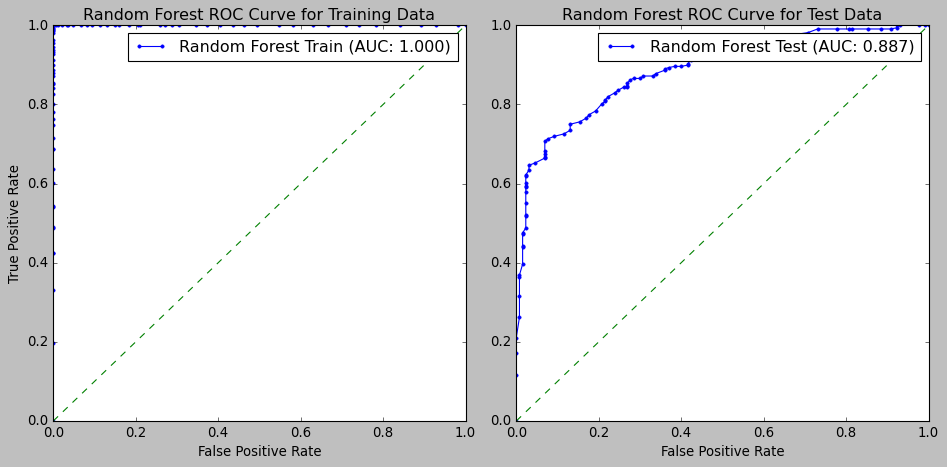

In [2214]:
from sklearn.metrics import roc_curve, roc_auc_score

# predict probabilities for train set
train_probs = RF_model.predict_proba(X_train)[:, 1]
# calculate AUC for train set
train_auc = roc_auc_score(y_train, train_probs)
# calculate roc curve for train set
train_fpr, train_tpr, _ = roc_curve(y_train, train_probs)

# predict probabilities for test set
test_probs = RF_model.predict_proba(X_test)[:, 1]
# calculate AUC for test set
test_auc = roc_auc_score(y_test, test_probs)
# calculate roc curve for test set
test_fpr, test_tpr, _ = roc_curve(y_test, test_probs)

# create subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# plot roc curve for the train set
ax[0].plot(train_fpr, train_tpr, marker='.', label='Random Forest Train (AUC: %.3f)' % train_auc)
ax[0].plot([0, 1], [0, 1], linestyle='--')
ax[0].set_title('Random Forest ROC Curve for Training Data')
ax[0].set_xlabel('False Positive Rate')
ax[0].set_ylabel('True Positive Rate')
ax[0].legend()

# plot roc curve for the test set
ax[1].plot(test_fpr, test_tpr, marker='.', label='Random Forest Test (AUC: %.3f)' % test_auc)
ax[1].plot([0, 1], [0, 1], linestyle='--')
ax[1].set_title('Random Forest ROC Curve for Test Data')
ax[1].set_xlabel('False Positive Rate')
ax[1].legend()

# show the plot
plt.tight_layout()
plt.show()

### Cross Validation on Random Forest Model

In [2215]:
from sklearn.model_selection import cross_val_score
rf_train_scores = cross_val_score(RF_model, X_train, y_train, cv=5)
rf_train_scores

array([0.80373832, 0.8364486 , 0.82629108, 0.85915493, 0.81220657])

In [2216]:
rf_test_scores = cross_val_score(RF_model, X_test, y_test, cv=5)
rf_test_scores

array([0.81521739, 0.81521739, 0.80434783, 0.9010989 , 0.84615385])

In [2217]:
print("The Random Forest Model's Mean Accuracy Score after Cross Validation on Train Data is", np.mean(rf_train_scores).round(2))
print("The Random Forest Model's Mean Accuracy Score after Cross Validation on Test Data is",np.mean(rf_test_scores).round(2))


The Random Forest Model's Mean Accuracy Score after Cross Validation on Train Data is 0.83
The Random Forest Model's Mean Accuracy Score after Cross Validation on Test Data is 0.84


### SMOTE on Random Forest

In [2218]:
sm_rf = SMOTE(random_state=2)
scaled_X_train_res, y_train_res = sm_rf.fit_resample(scaled_X_train_df, y_train)

In [2219]:
RF_SM_model = RandomForestClassifier(n_estimators=100,random_state=1)
RF_SM_model.fit(scaled_X_train_res, y_train_res)

RandomForestClassifier(random_state=1)

In [2220]:
## Performance Matrix on train data set with SMOTE
y_train_predict = RF_SM_model.predict(scaled_X_train_res)
model_score = RF_SM_model.score(scaled_X_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, y_train_predict))
print(metrics.classification_report(y_train_res ,y_train_predict))

0.9993197278911564
[[734   1]
 [  0 735]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       735
           1       1.00      1.00      1.00       735

    accuracy                           1.00      1470
   macro avg       1.00      1.00      1.00      1470
weighted avg       1.00      1.00      1.00      1470



In [2221]:
## Performance Matrix on test data set
y_test_predict = RF_SM_model.predict(scaled_X_test_df)
model_score = RF_SM_model.score(scaled_X_test_df, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8253275109170306
[[ 97  33]
 [ 47 281]]
              precision    recall  f1-score   support

           0       0.67      0.75      0.71       130
           1       0.89      0.86      0.88       328

    accuracy                           0.83       458
   macro avg       0.78      0.80      0.79       458
weighted avg       0.83      0.83      0.83       458



### Hypertuning Parameters of Random Forest Model using Grid Search CV

To use Grid Search CV for hyperparameter tuning in a Random Forest model, we'll focus on the hyperparameters specific to Random Forest. Random Forest has several hyperparameters that can significantly impact the performance of the model. Some of the key parameters include:

n_estimators: Number of trees in the forest.
max_depth: Maximum depth of the trees.
min_samples_split: Minimum number of samples required to split an internal node.
min_samples_leaf: Minimum number of samples required to be at a leaf node.
max_features: The number of features to consider when looking for the best split.

Here's how we will do it:

Define Parameter Grid:
Create a dictionary with parameters and ranges you want to tune. It's often a good idea to start with a broad range and then narrow it down.

Initialize Grid Search:
Set up Grid Search CV with the Random Forest model, parameter grid, and the scoring metric. Also, specify the number of folds for cross-validation.

Fit Grid Search on Training Data:
Run the grid search to find the best parameters. This step can be computationally intensive, especially for large datasets and with many parameters or wide ranges.

Evaluate the Best Model:
After fitting, we can evaluate the best model found by Grid Search on your test data.

In [2290]:
# Define the parameter grid
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Initialize the Grid Search model
grid_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_rf.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_rf.best_params_)

# Evaluate the best model - you can use your preferred metrics here
best_model_rf = grid_rf.best_estimator_

# Assess the best model on training and test data
train_accuracy_rf = best_model_rf.score(X_train, y_train).round(2)
test_accuracy_rf = best_model_rf.score(X_test, y_test).round(2)


Fitting 5 folds for each of 162 candidates, totalling 810 fits


/Users/admin/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/admin/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/admin/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/admin/anaconda3/lib/python3.10/si

Best Parameters: {'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}


In [2291]:
print(f"Random Forest Training Accuracy after Hypertuning Parameters using Grid Search CV is: {train_accuracy_rf}")
print(f"Random Forest Test Accuracyafter Hypertuning Parameters using Grid Search CV is: {test_accuracy_rf}")

Random Forest Training Accuracy after Hypertuning Parameters using Grid Search CV is: 0.89
Random Forest Test Accuracyafter Hypertuning Parameters using Grid Search CV is: 0.84


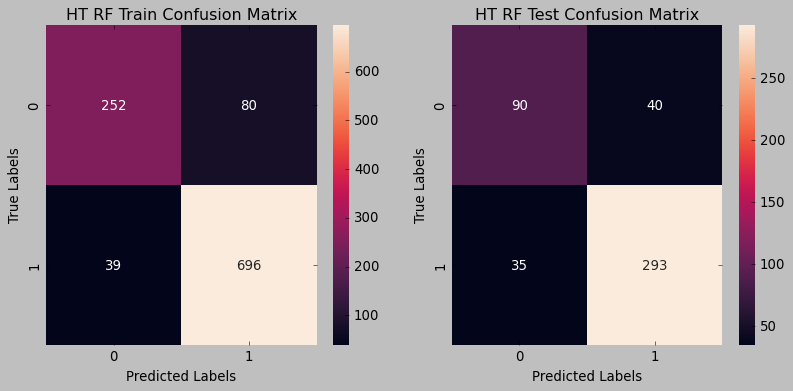

Classification Report - Training Data
              precision    recall  f1-score   support

           0       0.87      0.76      0.81       332
           1       0.90      0.95      0.92       735

    accuracy                           0.89      1067
   macro avg       0.88      0.85      0.87      1067
weighted avg       0.89      0.89      0.89      1067


Classification Report - Test Data
              precision    recall  f1-score   support

           0       0.72      0.69      0.71       130
           1       0.88      0.89      0.89       328

    accuracy                           0.84       458
   macro avg       0.80      0.79      0.80       458
weighted avg       0.83      0.84      0.84       458



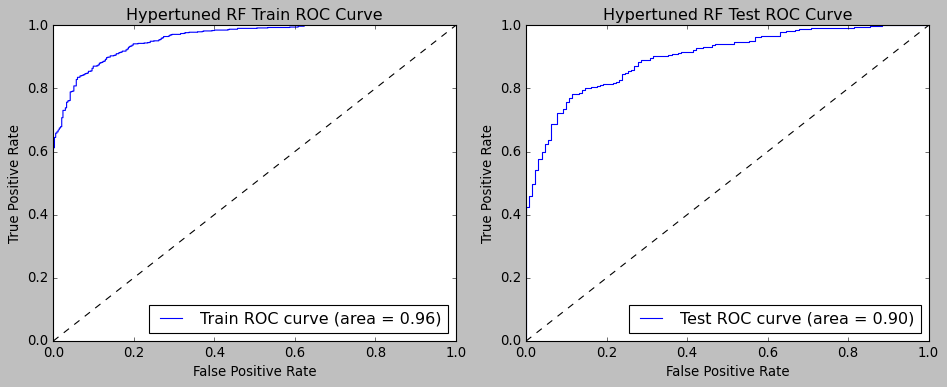

In [2292]:
# Confusion Matrix after Hypertuning
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

conf_matrix_train = confusion_matrix(y_train, best_model_rf.predict(X_train))
conf_matrix_test = confusion_matrix(y_test, best_model_rf.predict(X_test))

sns.heatmap(conf_matrix_train, annot=True, ax=ax[0], fmt='g')
ax[0].set_title('HT RF Train Confusion Matrix')
ax[0].set_xlabel('Predicted Labels')
ax[0].set_ylabel('True Labels')

sns.heatmap(conf_matrix_test, annot=True, ax=ax[1], fmt='g')
ax[1].set_title('HT RF Test Confusion Matrix')
ax[1].set_xlabel('Predicted Labels')
ax[1].set_ylabel('True Labels')

plt.show()

# Classification Report after Hypertuning
print("Classification Report - Training Data")
print(classification_report(y_train, best_model_rf.predict(X_train)))
print("\nClassification Report - Test Data")
print(classification_report(y_test, best_model_rf.predict(X_test)))

# ROC AUC Curve after Hypertuning
y_train_prob = best_model_rf.predict_proba(X_train)[:, 1]
y_test_prob = best_model_rf.predict_proba(X_test)[:, 1]

fpr_train, tpr_train, _ = roc_curve(y_train, y_train_prob)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)

roc_auc_train = auc(fpr_train, tpr_train)
roc_auc_test = auc(fpr_test, tpr_test)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Train ROC Curve
ax[0].plot(fpr_train, tpr_train, label=f'Train ROC curve (area = {roc_auc_train:.2f})')
ax[0].plot([0, 1], [0, 1], 'k--')
ax[0].set_xlabel('False Positive Rate')
ax[0].set_ylabel('True Positive Rate')
ax[0].set_title('Hypertuned RF Train ROC Curve')
ax[0].legend(loc='lower right')

# Test ROC Curve
ax[1].plot(fpr_test, tpr_test, label=f'Test ROC curve (area = {roc_auc_test:.2f})')
ax[1].plot([0, 1], [0, 1], 'k--')
ax[1].set_xlabel('False Positive Rate')
ax[1].set_ylabel('True Positive Rate')
ax[1].set_title('Hypertuned RF Test ROC Curve')
ax[1].legend(loc='lower right')

plt.tight_layout()
plt.show()



In [2293]:
# Extracting feature importances from the trained Random Forest model
feature_importances_best_model_rf = best_model_rf.feature_importances_

# Creating a DataFrame for easier visualization
feature_importance_best_model_rf_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances_best_model_rf})

# Sorting the DataFrame based on importance
feature_importance_best_model_rf_df = feature_importance_best_model_rf_df.sort_values(by='Importance', ascending=False)

feature_importance_best_model_rf_df

Feature  Importance
4                    Hague    0.248705
5                   Europe    0.225387
3                    Blair    0.174612
0                      age    0.123001
6      political.knowledge    0.088552
1   economic.cond.national    0.073711
2  economic.cond.household    0.046867
7              gender_male    0.019165

[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.5s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.4s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.4s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.4s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.4s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.4s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.4s
[CV] END max_depth=10, max_features=au

## Bagging

### Import Libraries

In [2326]:
from sklearn.ensemble import BaggingClassifier

### Fit the Model

In [2327]:
Bagging_model=BaggingClassifier(base_estimator=cart,n_estimators=100,random_state=1)
Bagging_model.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=1)

### Bagging Predictions on the Training and Test Data

In [2328]:
y_train_predict = Bagging_model.predict(X_train)
y_test_predict = Bagging_model.predict(X_test)

### Check Bagging Prediction Probabilities on Train and Test Data

In [2329]:
# Predict probabilities for training and test data
y_train_predict_prob = Bagging_model.predict_proba(X_train)
y_test_predict_prob = Bagging_model.predict_proba(X_test)

# Convert to DataFrames
df_Bagging_model_train_prob = pd.DataFrame(y_train_predict_prob, columns=['Train_Prob_Class_0', 'Train_Prob_Class_1'])
df_Bagging_model_test_prob = pd.DataFrame(y_test_predict_prob, columns=['Test_Prob_Class_0', 'Test_Prob_Class_1'])

# Concatenate DataFrames for side-by-side display and show the first few rows
print([df_Bagging_model_train_prob.head()])
print([df_Bagging_model_test_prob.head()])

[   Train_Prob_Class_0  Train_Prob_Class_1
0               0.250               0.750
1               0.690               0.310
2               0.230               0.770
3               0.085               0.915
4               0.610               0.390]
[   Test_Prob_Class_0  Test_Prob_Class_1
0               0.62               0.38
1               0.93               0.07
2               0.32               0.68
3               0.19               0.81
4               0.09               0.91]


### Check Actual vs Predicted Class on Train and Test Data

In [2330]:
# Convert y_train to a pandas Series if it's a DataFrame
if isinstance(y_train, pd.DataFrame):
    y_train_series = y_train.iloc[:, 0]  # Assuming the relevant data is in the first column
else:
    y_train_series = y_train

# Now create the DataFrame for actual vs predicted comparison
actual_vs_predicted_train_df = pd.DataFrame({
    'Actual': y_train_series,
    'Predicted': y_train_predict
})

# Display the first few rows
print(actual_vs_predicted_train_df.head())

      Actual  Predicted
1453       1          1
275        0          0
1130       1          1
1153       1          1
1172       0          0


In [2331]:
# Convert y_test to a pandas Series if it's a DataFrame
if isinstance(y_test, pd.DataFrame):
    y_test_series = y_test.iloc[:, 0]  # Assuming the relevant data is in the first column
else:
    y_test_series = y_test

# Now create the DataFrame for actual vs predicted comparison
actual_vs_predicted_test_df = pd.DataFrame({
    'Actual': y_test_series,
    'Predicted': y_test_predict
})

# Display the first few rows
print(actual_vs_predicted_test_df.head())

      Actual  Predicted
91         0          0
1194       1          0
201        1          1
613        0          1
283        1          1


In [2332]:
# Since Bagging itself doesn't provide feature importances, we need to aggregate from individual estimators
feature_importances_bagging = np.mean([
    tree.feature_importances_ for tree in Bagging_model.estimators_
], axis=0)

# Creating a DataFrame for easier visualization
feature_importance_bagging_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances_bagging})

# Sorting the DataFrame based on importance
feature_importance_bagging_df = feature_importance_bagging_df.sort_values(by='Importance', ascending=False)

feature_importance_bagging_df


Feature  Importance
4                    Hague    0.217135
0                      age    0.214908
5                   Europe    0.186141
3                    Blair    0.121101
6      political.knowledge    0.096379
2  economic.cond.household    0.070887
1   economic.cond.national    0.064789
7              gender_male    0.028659

#### Insights on Feature Importance as per Bagging Ensemble Learning Method

The differing importance of the feature "age" in a Bagging model (where it's significant) versus its lesser importance in Logistic Regression, Naive Bayes, Decision Tree, and LDA, can be attributed to several factors:

•	Bagging, particularly when using Decision Trees as base learners, is adept at capturing complex interactions and non-linear relationships between features. If "age" interacts in a non-linear way with other features or has a complex relationship with the target variable, Bagging could capture this effectively, while simpler models like Logistic Regression or Naive Bayes might not.
•	Bagging works by reducing the variance of the model without increasing bias. This means that the subtle effects of a feature like "age", which might be drowned out by noise in a single model, could become more apparent when aggregated across multiple models.
•	Bagging creates diversity among the base learners by introducing randomness in the training dataset. This process can lead to different trees capturing different aspects of the data, including potentially nuanced relationships involving "age".
•	Single decision trees may overfit the data, leading to high variance in their feature importance assessments. Bagging mitigates this by averaging over many trees, which can reveal more reliable importance measures for features like "age".
•	An ensemble of models, like in Bagging, can capture a broader range of patterns in the data than a single model. Features that might have a weak but consistent signal across multiple models can emerge as more important in an ensemble.
•	While exploratory data analysis (EDA) is crucial, it may not always reveal complex, multi-dimensional relationships in the data. Bagging, through its ensemble approach, can uncover these complex patterns.
•	Finally, the specific characteristics and distribution of the dataset can significantly influence how different models perceive the importance of features. "Age" might have properties in this particular dataset that are better captured by the Bagging ensemble of trees.

The differing importance of the feature "Blair" in Bagging compared to its higher importance in Logistic Regression, Naive Bayes, Decision Tree, and LDA could be due to several reasons:

•	Bagging, especially with Decision Trees as base learners, might capture complex interactions between features that overshadow the individual effect of "Blair". In contrast, models like Logistic Regression and Naive Bayes, which treat features more independently, might assign more importance to "Blair" if it has a strong individual correlation with the target variable.
•	If the influence of "Blair" on the target variable is more linear, it might be better captured by models like Logistic Regression or LDA. Bagging, through Decision Trees, might focus more on non-linear relationships and interactions between multiple features, which could reduce the relative importance of "Blair".
•	Bagging reduces the variance of the model by averaging over many decision trees. If the importance of "Blair" varies significantly across individual trees, its overall importance might be diluted in the aggregated ensemble model.
•	Bagging captures a broader range of patterns by aggregating over multiple models. This could mean that other features and their interactions, which are not as prominent in single models, become more important in the ensemble, relatively diminishing the importance of "Blair".
•	Single models like Decision Trees might overfit to certain features like "Blair", especially if they have a strong individual signal. Bagging controls overfitting by averaging, which can lead to a more balanced feature importance distribution.
•	In Decision Trees and hence in Bagging, the way data is split at each node can influence feature importance. If "Blair" leads to less effective splits compared to other features in the context of the dataset, its importance might be lower in a Bagging ensemble.
•	Each model has unique characteristics and sensitivities. The importance of a feature like "Blair" can vary based on how each model type weighs individual features against complex interactions and overall model stability.

### Bagging Accuracy Score on Training and Test Data

In [2333]:
Bagging_train_model_score = Bagging_model.score(X_train, y_train)
print("The Random Forest Model's Accuracy Score on Train Data is", Bagging_train_model_score.round(2))
Bagging_test_model_score = Bagging_model.score(X_test, y_test)
print("The Random Forest Model's Accuracy Score on Test Data is", Bagging_test_model_score.round(2))

The Random Forest Model's Accuracy Score on Train Data is 1.0
The Random Forest Model's Accuracy Score on Test Data is 0.8


### Bagging Confusion Matrix on the Training and Test Data

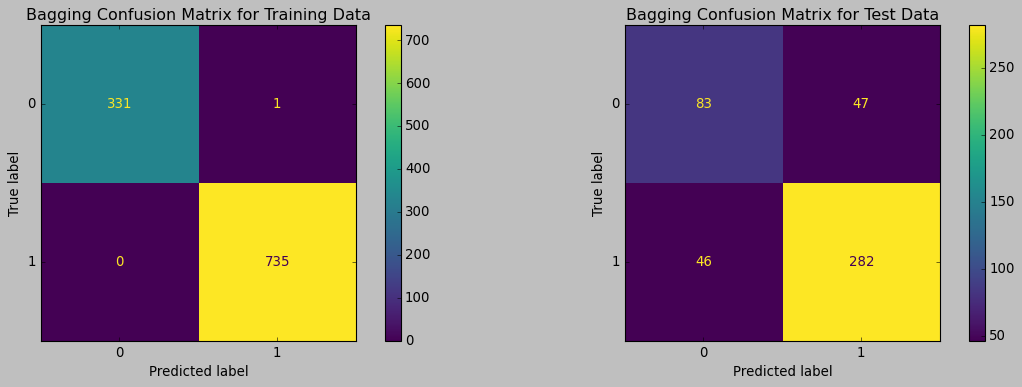

In [2334]:
# Create the confusion matrices
Bagging_cm_train = metrics.confusion_matrix(y_train, y_train_predict)
Bagging_cm_test = metrics.confusion_matrix(y_test, y_test_predict)

# Set up the matplotlib figure with 1 row and 2 columns
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Confusion matrix on the training data
Bagging_disp_train = ConfusionMatrixDisplay(confusion_matrix=Bagging_cm_train, display_labels=Bagging_model.classes_)
Bagging_disp_train.plot(ax=ax[0])
ax[0].set_title('Bagging Confusion Matrix for Training Data')

# Confusion matrix on the test data
Bagging_disp_test = ConfusionMatrixDisplay(confusion_matrix=Bagging_cm_test, display_labels=Bagging_model.classes_)
Bagging_disp_test.plot(ax=ax[1])
ax[1].set_title('Bagging Confusion Matrix for Test Data')

plt.tight_layout()
plt.show()

### Bagging Classification Reports for the Train Data and Test Data

In [2335]:
# Generate classification reports
Bagging_report_test = metrics.classification_report(y_test, y_test_predict, output_dict=True)
Bagging_report_train = metrics.classification_report(y_train, y_train_predict, output_dict=True)

# Convert reports to DataFrames
df_Bagging_report_test = pd.DataFrame(Bagging_report_test).transpose()
df_Bagging_report_train = pd.DataFrame(Bagging_report_train).transpose()

# Round the DataFrames to 2 decimal places
df_Bagging_report_test = df_Bagging_report_test.round(2)
df_Bagging_report_train = df_Bagging_report_train.round(2)

# Concatenate both DataFrames along the columns axis for side-by-side display
df_Bagging_reports = pd.concat([df_Bagging_report_train.add_suffix('_train'), df_Bagging_report_test.add_suffix('_test')], axis=1)

# Display the concatenated DataFrame
print(df_Bagging_reports)

              precision_train  recall_train  f1-score_train  support_train  \
0                         1.0           1.0             1.0          332.0   
1                         1.0           1.0             1.0          735.0   
accuracy                  1.0           1.0             1.0            1.0   
macro avg                 1.0           1.0             1.0         1067.0   
weighted avg              1.0           1.0             1.0         1067.0   

              precision_test  recall_test  f1-score_test  support_test  
0                       0.64         0.64           0.64         130.0  
1                       0.86         0.86           0.86         328.0  
accuracy                0.80         0.80           0.80           0.8  
macro avg               0.75         0.75           0.75         458.0  
weighted avg            0.80         0.80           0.80         458.0  


### Bagging AUC and ROC Curves of the Train Data and Test Data

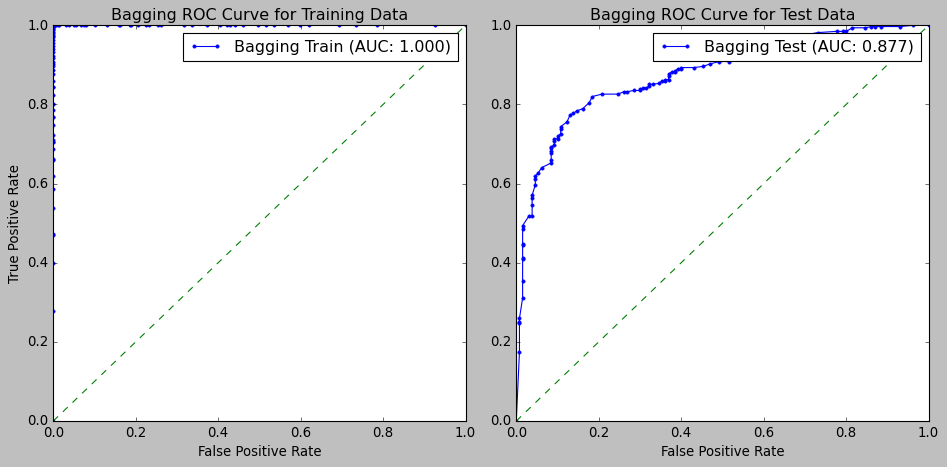

In [2336]:
from sklearn.metrics import roc_curve, roc_auc_score

# predict probabilities for train set
train_probs = Bagging_model.predict_proba(X_train)[:, 1]
# calculate AUC for train set
train_auc = roc_auc_score(y_train, train_probs)
# calculate roc curve for train set
train_fpr, train_tpr, _ = roc_curve(y_train, train_probs)

# predict probabilities for test set
test_probs = Bagging_model.predict_proba(X_test)[:, 1]
# calculate AUC for test set
test_auc = roc_auc_score(y_test, test_probs)
# calculate roc curve for test set
test_fpr, test_tpr, _ = roc_curve(y_test, test_probs)

# create subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# plot roc curve for the train set
ax[0].plot(train_fpr, train_tpr, marker='.', label='Bagging Train (AUC: %.3f)' % train_auc)
ax[0].plot([0, 1], [0, 1], linestyle='--')
ax[0].set_title('Bagging ROC Curve for Training Data')
ax[0].set_xlabel('False Positive Rate')
ax[0].set_ylabel('True Positive Rate')
ax[0].legend()

# plot roc curve for the test set
ax[1].plot(test_fpr, test_tpr, marker='.', label='Bagging Test (AUC: %.3f)' % test_auc)
ax[1].plot([0, 1], [0, 1], linestyle='--')
ax[1].set_title('Bagging ROC Curve for Test Data')
ax[1].set_xlabel('False Positive Rate')
ax[1].legend()

# show the plot
plt.tight_layout()
plt.show()

### Cross Validation on Bagging Model

In [2337]:
from sklearn.model_selection import cross_val_score
Bagging_train_scores = cross_val_score(Bagging_model, X_train, y_train, cv=5)
Bagging_train_scores

array([0.80373832, 0.80841121, 0.80751174, 0.84507042, 0.8028169 ])

In [2338]:
Bagging_test_scores = cross_val_score(Bagging_model, X_test, y_test, cv=5)
Bagging_test_scores

array([0.79347826, 0.7826087 , 0.79347826, 0.9010989 , 0.82417582])

In [2339]:
print("The Bagging Model's Mean Accuracy Score after Cross Validation on Train Data is", np.mean(Bagging_train_scores).round(2))
print("The Bagging Model's Mean Accuracy Score after Cross Validation on Test Data is",np.mean(Bagging_test_scores).round(2))


The Bagging Model's Mean Accuracy Score after Cross Validation on Train Data is 0.81
The Bagging Model's Mean Accuracy Score after Cross Validation on Test Data is 0.82


### SMOTE on Bagging 

In [2340]:
Bagging_SM_model = BaggingClassifier(base_estimator=cart,n_estimators=100,random_state=1)
Bagging_SM_model.fit(X_train_res, y_train_res)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=1)

In [2341]:
## Performance Matrix on train data set with SMOTE
y_train_predict = Bagging_SM_model.predict(X_train_res)
model_score = Bagging_SM_model.score(X_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, y_train_predict))
print(metrics.classification_report(y_train_res ,y_train_predict))

0.998639455782313
[[733   2]
 [  0 735]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       735
           1       1.00      1.00      1.00       735

    accuracy                           1.00      1470
   macro avg       1.00      1.00      1.00      1470
weighted avg       1.00      1.00      1.00      1470



In [2342]:
## Performance Matrix on test data set
y_test_predict = Bagging_SM_model.predict(X_test)
model_score = Bagging_SM_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8144104803493449
[[ 98  32]
 [ 53 275]]
              precision    recall  f1-score   support

           0       0.65      0.75      0.70       130
           1       0.90      0.84      0.87       328

    accuracy                           0.81       458
   macro avg       0.77      0.80      0.78       458
weighted avg       0.83      0.81      0.82       458



### Hypertuning Parameters of Bagging Model using Grid Search CV

To use Grid Search CV for hyperparameter tuning of a Bagging model in machine learning, we'll focus on the hyperparameters specific to Bagging classifiers. Bagging (Bootstrap Aggregating) is an ensemble method that aims to improve the stability and accuracy of machine learning algorithms. It reduces variance and helps to avoid overfitting. Key parameters for a Bagging classifier typically include:

1. n_estimators: Number of base estimators in the ensemble.
2. max_samples: The number of samples to draw from X to train each base estimator.
3. max_features: The number of features to draw from X to train each base estimator.
4. bootstrap: Whether samples are drawn with replacement. If False, sampling is performed without replacement.
5. bootstrap_features: Whether features are drawn with replacement.

Here's how we do hyperparameter tuning using Grid Search CV:

Define Parameter Grid:
Create a dictionary with parameters and ranges you want to tune.

Initialize Grid Search:
Set up Grid Search CV with the Bagging model, parameter grid, and the scoring metric. Also, specify the number of folds for cross-validation.

Fit Grid Search on Training Data:
Run the grid search to find the best parameters. This can be computationally intensive.

Evaluate the Best Model:
After fitting, you can evaluate the best model found by Grid Search on your test data.

In [2343]:
# Define the parameter grid
param_grid_bagging = {
    'n_estimators': [10, 50, 100],
    'max_samples': [0.5, 1.0],
    'max_features': [0.5, 1.0],
    'bootstrap': [True, False],
    'bootstrap_features': [True, False]
}

# Initialize the Grid Search model
grid_bagging = GridSearchCV(BaggingClassifier(), param_grid_bagging, cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_bagging.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_bagging.best_params_)

# Evaluate the best model
best_model_bagging = grid_bagging.best_estimator_

# Calculate and print Train and Test Accuracy
train_accuracy_bagging = best_model_bagging.score(X_train, y_train).round(2)
test_accuracy_bagging = best_model_bagging.score(X_test, y_test).round(2)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


/Users/admin/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/admin/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/admin/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/admin/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

/Users/admin/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/admin/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/admin/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/admin/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

/Users/admin/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/admin/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/admin/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/admin/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

/Users/admin/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/admin/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/admin/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/admin/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

/Users/admin/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/admin/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/admin/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/admin/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

/Users/admin/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/admin/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/admin/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/admin/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

Best Parameters: {'bootstrap': True, 'bootstrap_features': False, 'max_features': 1.0, 'max_samples': 0.5, 'n_estimators': 100}


In [2344]:
print(f"Bagging Training Accuracy after Hypertuning Parameters using Grid Search CV is: {train_accuracy_bagging}")
print(f"Bagging Test Accuracy after Hypertuning Parameters using Grid Search CV is: {test_accuracy_bagging}")

Bagging Training Accuracy after Hypertuning Parameters using Grid Search CV is: 0.96
Bagging Test Accuracy after Hypertuning Parameters using Grid Search CV is: 0.81


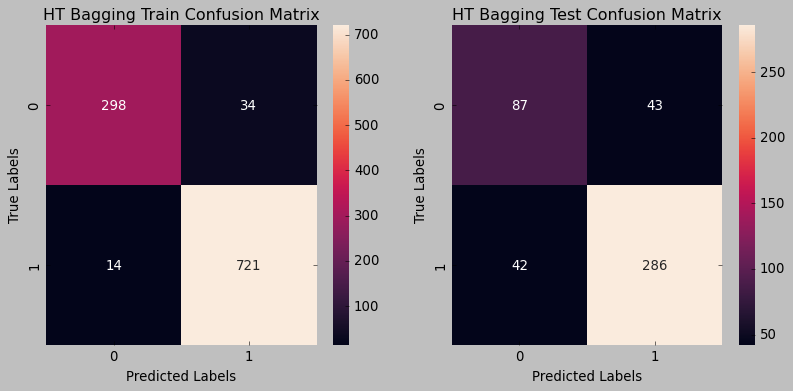

Classification Report - Training Data
              precision    recall  f1-score   support

           0       0.96      0.90      0.93       332
           1       0.95      0.98      0.97       735

    accuracy                           0.96      1067
   macro avg       0.96      0.94      0.95      1067
weighted avg       0.96      0.96      0.95      1067


Classification Report - Test Data
              precision    recall  f1-score   support

           0       0.67      0.67      0.67       130
           1       0.87      0.87      0.87       328

    accuracy                           0.81       458
   macro avg       0.77      0.77      0.77       458
weighted avg       0.81      0.81      0.81       458



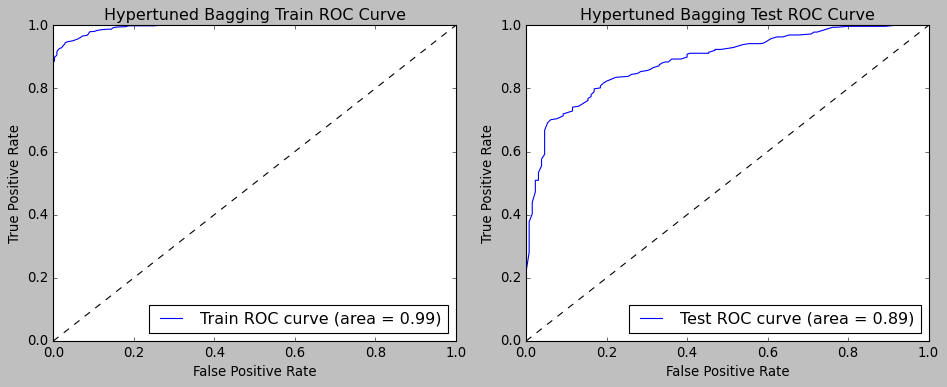

In [2345]:
# Confusion Matrix after Hypertuning
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

conf_matrix_train = confusion_matrix(y_train, best_model_bagging.predict(X_train))
conf_matrix_test = confusion_matrix(y_test, best_model_bagging.predict(X_test))

sns.heatmap(conf_matrix_train, annot=True, ax=ax[0], fmt='g')
ax[0].set_title('HT Bagging Train Confusion Matrix')
ax[0].set_xlabel('Predicted Labels')
ax[0].set_ylabel('True Labels')

sns.heatmap(conf_matrix_test, annot=True, ax=ax[1], fmt='g')
ax[1].set_title('HT Bagging Test Confusion Matrix')
ax[1].set_xlabel('Predicted Labels')
ax[1].set_ylabel('True Labels')

plt.show()

# Classification Report after Hypertuning
print("Classification Report - Training Data")
print(classification_report(y_train, best_model_bagging.predict(X_train)))
print("\nClassification Report - Test Data")
print(classification_report(y_test, best_model_bagging.predict(X_test)))

# ROC AUC Curve after Hypertuning
y_train_prob = best_model_bagging.predict_proba(X_train)[:, 1]
y_test_prob = best_model_bagging.predict_proba(X_test)[:, 1]

fpr_train, tpr_train, _ = roc_curve(y_train, y_train_prob)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)

roc_auc_train = auc(fpr_train, tpr_train)
roc_auc_test = auc(fpr_test, tpr_test)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Train ROC Curve
ax[0].plot(fpr_train, tpr_train, label=f'Train ROC curve (area = {roc_auc_train:.2f})')
ax[0].plot([0, 1], [0, 1], 'k--')
ax[0].set_xlabel('False Positive Rate')
ax[0].set_ylabel('True Positive Rate')
ax[0].set_title('Hypertuned Bagging Train ROC Curve')
ax[0].legend(loc='lower right')

# Test ROC Curve
ax[1].plot(fpr_test, tpr_test, label=f'Test ROC curve (area = {roc_auc_test:.2f})')
ax[1].plot([0, 1], [0, 1], 'k--')
ax[1].set_xlabel('False Positive Rate')
ax[1].set_ylabel('True Positive Rate')
ax[1].set_title('Hypertuned Bagging Test ROC Curve')
ax[1].legend(loc='lower right')

plt.tight_layout()
plt.show()



## Ada Boost

### Import Libraries

In [2248]:
from sklearn.ensemble import AdaBoostClassifier

### Fit the Model

In [2249]:
base_tree = DecisionTreeClassifier(max_depth=1)
ADB_model = AdaBoostClassifier(base_estimator=base_tree, n_estimators=100,random_state=1)
ADB_model.fit(X_train,y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=100, random_state=1)

### Ada Boost Predictions on the Training and Test Data

In [2250]:
y_train_predict = ADB_model.predict(X_train)
y_test_predict = ADB_model.predict(X_test)

### Check Ada Boost Prediction Probabilities on Train and Test Data

In [2252]:
# Predict probabilities for training and test data
y_train_predict_prob = ADB_model.predict_proba(X_train)
y_test_predict_prob = ADB_model.predict_proba(X_test)

# Convert to DataFrames
df_ADB_model_train_prob = pd.DataFrame(y_train_predict_prob.round(3), columns=['Train_Prob_Class_0', 'Train_Prob_Class_1'])
df_ADB_model_test_prob = pd.DataFrame(y_test_predict_prob.round(3), columns=['Test_Prob_Class_0', 'Test_Prob_Class_1'])

# Concatenate DataFrames for side-by-side display and show the first few rows
print([df_ADB_model_train_prob.head()])
print([df_ADB_model_test_prob.head()])

[   Train_Prob_Class_0  Train_Prob_Class_1
0               0.503               0.497
1               0.498               0.502
2               0.497               0.503
3               0.496               0.504
4               0.500               0.500]
[   Test_Prob_Class_0  Test_Prob_Class_1
0              0.505              0.495
1              0.503              0.497
2              0.499              0.501
3              0.501              0.499
4              0.496              0.504]


### Check Actual vs Predicted Class on Train and Test Data

In [2253]:
# Convert y_train to a pandas Series if it's a DataFrame
if isinstance(y_train, pd.DataFrame):
    y_train_series = y_train.iloc[:, 0]  # Assuming the relevant data is in the first column
else:
    y_train_series = y_train

# Now create the DataFrame for actual vs predicted comparison
actual_vs_predicted_train_df = pd.DataFrame({
    'Actual': y_train_series,
    'Predicted': y_train_predict
})

# Display the first few rows
print(actual_vs_predicted_train_df.head())

      Actual  Predicted
1453       1          0
275        0          1
1130       1          1
1153       1          1
1172       0          1


In [2254]:
# Convert y_test to a pandas Series if it's a DataFrame
if isinstance(y_test, pd.DataFrame):
    y_test_series = y_test.iloc[:, 0]  # Assuming the relevant data is in the first column
else:
    y_test_series = y_test

# Now create the DataFrame for actual vs predicted comparison
actual_vs_predicted_test_df = pd.DataFrame({
    'Actual': y_test_series,
    'Predicted': y_test_predict
})

# Display the first few rows
print(actual_vs_predicted_test_df.head())

      Actual  Predicted
91         0          0
1194       1          0
201        1          1
613        0          0
283        1          1


### Feature Importance as per Ada Boost Ensemble Learning Method

In [2255]:
# Extracting feature importances from the AdaBoost model
feature_importances_ada = ADB_model.feature_importances_

# Creating a DataFrame for easier visualization
feature_importance_ada_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances_ada})

# Sorting the DataFrame based on importance
feature_importance_ada_df = feature_importance_ada_df.sort_values(by='Importance', ascending=False)

print(feature_importance_ada_df)


                   Feature  Importance
0                      age        0.69
4                    Hague        0.08
5                   Europe        0.07
3                    Blair        0.06
1   economic.cond.national        0.04
2  economic.cond.household        0.03
6      political.knowledge        0.02
7              gender_male        0.01


The observed difference in feature importance for "Age" in AdaBoost compared to a single Decision Tree model can be attributed to several key factors inherent to how these models work and handle features:

Model Mechanics and Ensemble Effect:

AdaBoost: It is an ensemble method that works by combining multiple weak learners (often decision trees). The algorithm focuses on instances that are harder to classify in successive iterations. If "Age" is a feature that helps correctly classify instances that were previously misclassified, its importance can be amplified in AdaBoost.
Single Decision Tree: In contrast, a single decision tree makes decisions based on splitting the data to maximize purity at each node. If "Age" doesn't provide the most effective split early in the tree, it might appear less important, even if it's still a significant predictor.
Feature Interactions and Non-Linearity:

AdaBoost, through its iterative process, may better capture complex, non-linear relationships and interactions involving "Age" that a single decision tree might miss.
Variance and Bias Dynamics:

AdaBoost aims to reduce bias by focusing more on difficult instances, potentially making "Age" more prominent if it's crucial for classifying these harder cases.
A single decision tree, on the other hand, may have higher variance, and its feature importance can be more sensitive to the specific splits made in the tree, which might not fully reflect the potential significance of "Age."
Data Distribution and Instance Weighting:

AdaBoost adjusts the weights of instances based on their classification difficulty, possibly emphasizing the role of "Age" if it's pivotal in classifying weighted instances.
A single tree does not adjust instance weights, so its feature importance assessment is based on the unweighted distribution of the data.
Overfitting Control:

AdaBoost, by combining multiple weak learners, can mitigate overfitting, potentially leading to a more balanced and realistic assessment of feature importance.
A single decision tree might overfit the data, skewing feature importance based on specific patterns present in the training set.
Base Learner Limitations:

The limitations of the base learners in AdaBoost (often simple decision trees) mean they might rely more heavily on certain features like "Age" if these are effective in reducing classification error.
In summary, the disparity in feature importance for "Age" between AdaBoost and a single Decision Tree can be due to the differences in how these models handle features, their sensitivity to data distributions, and their inherent mechanisms for reducing bias and variance. This highlights the value of using diverse modeling approaches to gain a comprehensive understanding of feature significance in predictive modeling.

### Ada Boost Accuracy Score on Training and Test Data

In [2256]:
ADB_train_model_score = ADB_model.score(X_train, y_train)
print("The Ada Boost Model's Accuracy Score on Train Data is", ADB_train_model_score.round(2))
ADB_test_model_score = ADB_model.score(X_test, y_test)
print("The Ada Boost Model's Accuracy Score on Test Data is", ADB_test_model_score.round(2))

The Ada Boost Model's Accuracy Score on Train Data is 0.85
The Ada Boost Model's Accuracy Score on Test Data is 0.82


### Ada Boost Confusion Matrix on the Training and Test Data

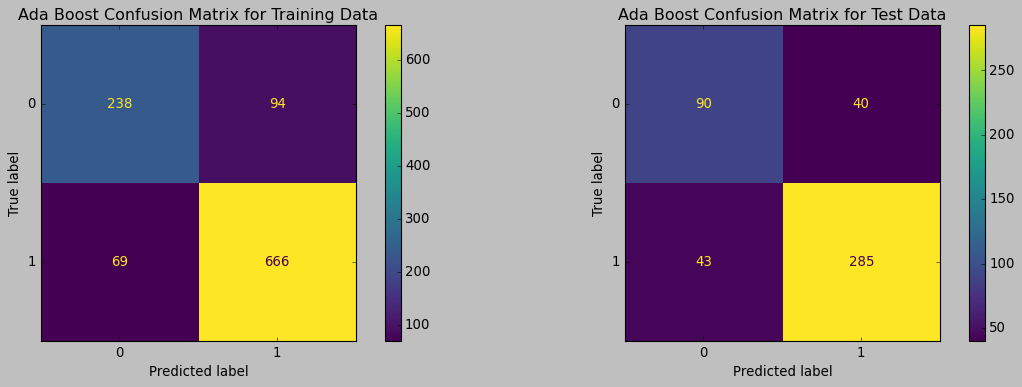

In [2257]:
# Create the confusion matrices
ADB_cm_train = metrics.confusion_matrix(y_train, y_train_predict)
ADB_cm_test = metrics.confusion_matrix(y_test, y_test_predict)

# Set up the matplotlib figure with 1 row and 2 columns
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Confusion matrix on the training data
ADB_disp_train = ConfusionMatrixDisplay(confusion_matrix=ADB_cm_train, display_labels=ADB_model.classes_)
ADB_disp_train.plot(ax=ax[0])
ax[0].set_title('Ada Boost Confusion Matrix for Training Data')

# Confusion matrix on the test data
ADB_disp_test = ConfusionMatrixDisplay(confusion_matrix=ADB_cm_test, display_labels=ADB_model.classes_)
ADB_disp_test.plot(ax=ax[1])
ax[1].set_title('Ada Boost Confusion Matrix for Test Data')

plt.tight_layout()
plt.show()

### Ada Boost Classification Reports for the Train Data and Test Data

In [2258]:
# Generate classification reports
ADB_report_test = metrics.classification_report(y_test, y_test_predict, output_dict=True)
ADB_report_train = metrics.classification_report(y_train, y_train_predict, output_dict=True)

# Convert reports to DataFrames
df_ADB_report_test = pd.DataFrame(ADB_report_test).transpose()
df_ADB_report_train = pd.DataFrame(ADB_report_train).transpose()

# Round the DataFrames to 2 decimal places
df_ADB_report_test = df_ADB_report_test.round(2)
df_ADB_report_train = df_ADB_report_train.round(2)

# Concatenate both DataFrames along the columns axis for side-by-side display
df_ADB_reports = pd.concat([df_ADB_report_train.add_suffix('_train'), df_ADB_report_test.add_suffix('_test')], axis=1)

# Display the concatenated DataFrame
print(df_ADB_reports)

              precision_train  recall_train  f1-score_train  support_train  \
0                        0.78          0.72            0.74         332.00   
1                        0.88          0.91            0.89         735.00   
accuracy                 0.85          0.85            0.85           0.85   
macro avg                0.83          0.81            0.82        1067.00   
weighted avg             0.84          0.85            0.85        1067.00   

              precision_test  recall_test  f1-score_test  support_test  
0                       0.68         0.69           0.68        130.00  
1                       0.88         0.87           0.87        328.00  
accuracy                0.82         0.82           0.82          0.82  
macro avg               0.78         0.78           0.78        458.00  
weighted avg            0.82         0.82           0.82        458.00  


### Ada Boost AUC and ROC Curves of the Train Data and Test Data

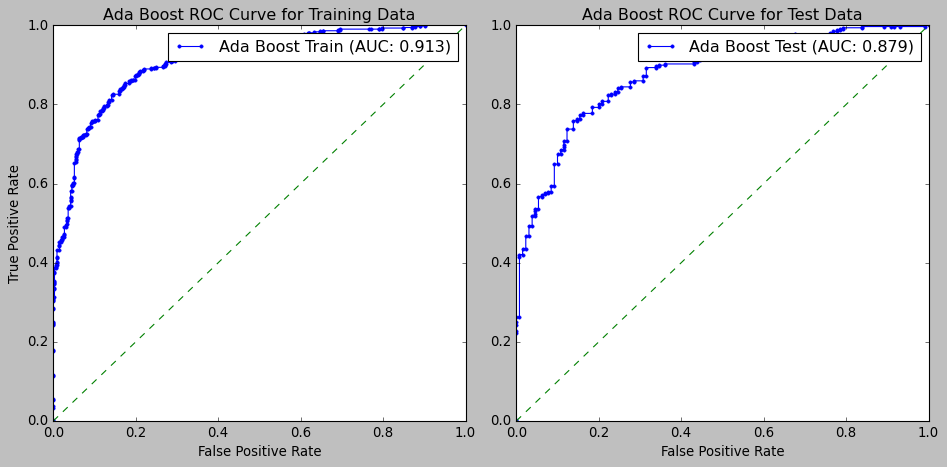

In [2259]:
from sklearn.metrics import roc_curve, roc_auc_score

# predict probabilities for train set
train_probs = ADB_model.predict_proba(X_train)[:, 1]
# calculate AUC for train set
train_auc = roc_auc_score(y_train, train_probs)
# calculate roc curve for train set
train_fpr, train_tpr, _ = roc_curve(y_train, train_probs)

# predict probabilities for test set
test_probs = ADB_model.predict_proba(X_test)[:, 1]
# calculate AUC for test set
test_auc = roc_auc_score(y_test, test_probs)
# calculate roc curve for test set
test_fpr, test_tpr, _ = roc_curve(y_test, test_probs)

# create subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# plot roc curve for the train set
ax[0].plot(train_fpr, train_tpr, marker='.', label='Ada Boost Train (AUC: %.3f)' % train_auc)
ax[0].plot([0, 1], [0, 1], linestyle='--')
ax[0].set_title('Ada Boost ROC Curve for Training Data')
ax[0].set_xlabel('False Positive Rate')
ax[0].set_ylabel('True Positive Rate')
ax[0].legend()

# plot roc curve for the test set
ax[1].plot(test_fpr, test_tpr, marker='.', label='Ada Boost Test (AUC: %.3f)' % test_auc)
ax[1].plot([0, 1], [0, 1], linestyle='--')
ax[1].set_title('Ada Boost ROC Curve for Test Data')
ax[1].set_xlabel('False Positive Rate')
ax[1].legend()

# show the plot
plt.tight_layout()
plt.show()

### Cross Validation on Ada Boost Model

In [2260]:
from sklearn.model_selection import cross_val_score
ADB_train_scores = cross_val_score(ADB_model, X_train, y_train, cv=5)
ADB_train_scores

array([0.79439252, 0.8411215 , 0.83098592, 0.85915493, 0.81220657])

In [2261]:
ADB_test_scores = cross_val_score(ADB_model, X_test, y_test, cv=5)
ADB_test_scores

array([0.81521739, 0.77173913, 0.75      , 0.85714286, 0.83516484])

In [2262]:
print("The Ada Boost Model's Mean Accuracy Score after Cross Validation on Train Data is", np.mean(ADB_train_scores).round(2))
print("The Ada Boost Model's Mean Accuracy Score after Cross Validation on Test Data is",np.mean(ADB_test_scores).round(2))


The Ada Boost Model's Mean Accuracy Score after Cross Validation on Train Data is 0.83
The Ada Boost Model's Mean Accuracy Score after Cross Validation on Test Data is 0.81


## Ada Boost with SMOTE

In [2055]:
base_tree = DecisionTreeClassifier(max_depth=1)
ADB_SM_model = AdaBoostClassifier(base_estimator=base_tree, n_estimators=100,random_state=1)
ADB_SM_model.fit(X_train_res, y_train_res)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=100, random_state=1)

In [2056]:
## Performance Matrix on train data set with SMOTE
y_train_predict = ADB_SM_model.predict(X_train_res)
model_score = ADB_SM_model.score(X_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, y_train_predict))
print(metrics.classification_report(y_train_res ,y_train_predict))

0.8551020408163266
[[634 101]
 [112 623]]
              precision    recall  f1-score   support

           0       0.85      0.86      0.86       735
           1       0.86      0.85      0.85       735

    accuracy                           0.86      1470
   macro avg       0.86      0.86      0.86      1470
weighted avg       0.86      0.86      0.86      1470



In [2057]:
## Performance Matrix on test data set
y_test_predict = ADB_SM_model.predict(X_test)
model_score = ADB_SM_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8078602620087336
[[100  30]
 [ 58 270]]
              precision    recall  f1-score   support

           0       0.63      0.77      0.69       130
           1       0.90      0.82      0.86       328

    accuracy                           0.81       458
   macro avg       0.77      0.80      0.78       458
weighted avg       0.82      0.81      0.81       458



### Hypertuning parameters of Ada Boost Model using Grid Search CV

To use Grid Search CV for hyperparameter tuning of an AdaBoost model, we will focus on the hyperparameters specific to AdaBoost (Adaptive Boosting). AdaBoost is a popular boosting technique that works by sequentially adding models, typically decision trees, where each subsequent model attempts to correct the errors of its predecessors.

The key hyperparameters in AdaBoost include:

1. n_estimators: The maximum number of estimators at which boosting is terminated. In case of a perfect fit, the learning procedure is stopped early.
2. learning_rate: Weight applied to each classifier at each boosting iteration. A smaller learning rate requires more estimators but can lead to better performance.
3. base_estimator: The model to ensemble. By default, AdaBoost uses decision trees.

Here's how we will use Grid Search CV with AdaBoost:

Define Parameter Grid:
Create a dictionary with the AdaBoost parameters you want to tune.

Initialize Grid Search:
Set up Grid Search CV with the AdaBoost model, parameter grid, and the scoring metric. Also, specify the number of folds for cross-validation.

Fit Grid Search on Training Data:
Run the grid search to find the best parameters.

Evaluate the Best Model:
After fitting, evaluate the best model found by Grid Search on your test data.

In [2266]:
# Define the parameter grid
param_grid_adaboost = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1],
    # Optionally, you can tune the base estimator, if you are not using the default
    # 'base_estimator': [DecisionTreeClassifier(max_depth=1), DecisionTreeClassifier(max_depth=2), ...]
}

# Initialize the Grid Search model
grid_adaboost = GridSearchCV(AdaBoostClassifier(), param_grid_adaboost, cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_adaboost.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_adaboost.best_params_)

# Evaluate the best model
best_model_adaboost = grid_adaboost.best_estimator_
train_accuracy_adaboost = best_model_adaboost.score(X_train, y_train).round(2)
test_accuracy_adaboost = best_model_adaboost.score(X_test, y_test).round(2)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


/Users/admin/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/admin/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/admin/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/admin/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

Best Parameters: {'learning_rate': 0.1, 'n_estimators': 200}


In [2267]:
print(f"Ada Boost Training Accuracy after Hypertuning Parameters using Grid Search CV is: {train_accuracy_adaboost}");
print(f"Ada Boost Test Accuracy after Hypertuning Parameters using Grid Search CV is: {test_accuracy_adaboost}");

Ada Boost Training Accuracy after Hypertuning Parameters using Grid Search CV is: 0.84
Ada Boost Test Accuracy after Hypertuning Parameters using Grid Search CV is: 0.82


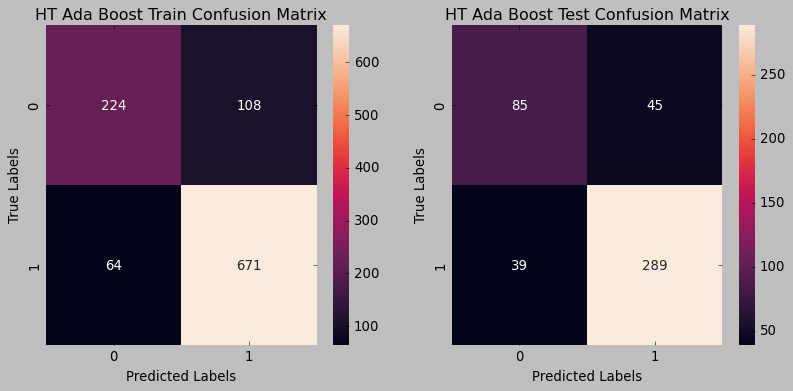

Classification Report - Training Data
              precision    recall  f1-score   support

           0       0.78      0.67      0.72       332
           1       0.86      0.91      0.89       735

    accuracy                           0.84      1067
   macro avg       0.82      0.79      0.80      1067
weighted avg       0.84      0.84      0.84      1067


Classification Report - Test Data
              precision    recall  f1-score   support

           0       0.69      0.65      0.67       130
           1       0.87      0.88      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.77       458
weighted avg       0.81      0.82      0.82       458



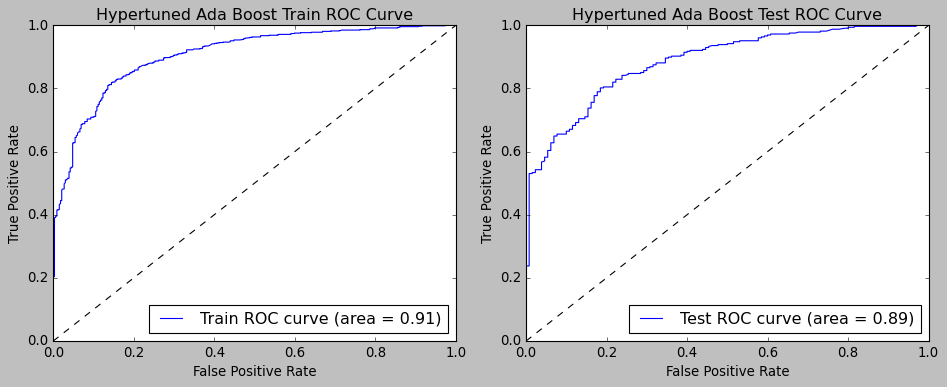

In [2268]:
# Confusion Matrix after Hypertuning
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

conf_matrix_train = confusion_matrix(y_train, best_model_adaboost.predict(X_train))
conf_matrix_test = confusion_matrix(y_test, best_model_adaboost.predict(X_test))

sns.heatmap(conf_matrix_train, annot=True, ax=ax[0], fmt='g')
ax[0].set_title('HT Ada Boost Train Confusion Matrix')
ax[0].set_xlabel('Predicted Labels')
ax[0].set_ylabel('True Labels')

sns.heatmap(conf_matrix_test, annot=True, ax=ax[1], fmt='g')
ax[1].set_title('HT Ada Boost Test Confusion Matrix')
ax[1].set_xlabel('Predicted Labels')
ax[1].set_ylabel('True Labels')

plt.show()

# Classification Report after Hypertuning
print("Classification Report - Training Data")
print(classification_report(y_train, best_model_adaboost.predict(X_train)))
print("\nClassification Report - Test Data")
print(classification_report(y_test, best_model_adaboost.predict(X_test)))

# ROC AUC Curve after Hypertuning
y_train_prob = best_model_adaboost.predict_proba(X_train)[:, 1]
y_test_prob = best_model_adaboost.predict_proba(X_test)[:, 1]

fpr_train, tpr_train, _ = roc_curve(y_train, y_train_prob)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)

roc_auc_train = auc(fpr_train, tpr_train)
roc_auc_test = auc(fpr_test, tpr_test)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Train ROC Curve
ax[0].plot(fpr_train, tpr_train, label=f'Train ROC curve (area = {roc_auc_train:.2f})')
ax[0].plot([0, 1], [0, 1], 'k--')
ax[0].set_xlabel('False Positive Rate')
ax[0].set_ylabel('True Positive Rate')
ax[0].set_title('Hypertuned Ada Boost Train ROC Curve')
ax[0].legend(loc='lower right')

# Test ROC Curve
ax[1].plot(fpr_test, tpr_test, label=f'Test ROC curve (area = {roc_auc_test:.2f})')
ax[1].plot([0, 1], [0, 1], 'k--')
ax[1].set_xlabel('False Positive Rate')
ax[1].set_ylabel('True Positive Rate')
ax[1].set_title('Hypertuned Ada Boost Test ROC Curve')
ax[1].legend(loc='lower right')

plt.tight_layout()
plt.show()



## Gradient Boosting

### Import Libraries

In [2269]:
from sklearn.ensemble import GradientBoostingClassifier


### Fit the Model

In [2270]:
GBCL_model = GradientBoostingClassifier(random_state=1)
GBCL_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=1)

### Gradient Boost Predictions on the Training and Test Data

In [2271]:
y_train_predict = GBCL_model.predict(X_train)
y_test_predict = GBCL_model.predict(X_test)

### Check Gradient Boost Prediction Probabilities on Training and Test Data

In [2272]:
# Predict probabilities for training and test data
y_train_predict_prob = GBCL_model.predict_proba(X_train)
y_test_predict_prob = GBCL_model.predict_proba(X_test)

# Convert to DataFrames
df_GBCL_model_train_prob = pd.DataFrame(y_train_predict_prob.round(3), columns=['Train_Prob_Class_0', 'Train_Prob_Class_1'])
df_GBCL_model_test_prob = pd.DataFrame(y_test_predict_prob.round(3), columns=['Test_Prob_Class_0', 'Test_Prob_Class_1'])

# Concatenate DataFrames for side-by-side display and show the first few rows
print([df_GBCL_model_train_prob.head()])
print([df_GBCL_model_test_prob.head()])

[   Train_Prob_Class_0  Train_Prob_Class_1
0               0.716               0.284
1               0.366               0.634
2               0.135               0.865
3               0.186               0.814
4               0.846               0.154]
[   Test_Prob_Class_0  Test_Prob_Class_1
0              0.877              0.123
1              0.840              0.160
2              0.173              0.827
3              0.368              0.632
4              0.234              0.766]


### Check Actual vs Predicted Class on Train and Test Data

In [2273]:
# Convert y_train to a pandas Series if it's a DataFrame
if isinstance(y_train, pd.DataFrame):
    y_train_series = y_train.iloc[:, 0]  # Assuming the relevant data is in the first column
else:
    y_train_series = y_train

# Now create the DataFrame for actual vs predicted comparison
actual_vs_predicted_train_df = pd.DataFrame({
    'Actual': y_train_series,
    'Predicted': y_train_predict
})

# Display the first few rows
print(actual_vs_predicted_train_df.head())

      Actual  Predicted
1453       1          0
275        0          1
1130       1          1
1153       1          1
1172       0          0


In [2274]:
# Convert y_test to a pandas Series if it's a DataFrame
if isinstance(y_test, pd.DataFrame):
    y_test_series = y_test.iloc[:, 0]  # Assuming the relevant data is in the first column
else:
    y_test_series = y_test

# Now create the DataFrame for actual vs predicted comparison
actual_vs_predicted_test_df = pd.DataFrame({
    'Actual': y_test_series,
    'Predicted': y_test_predict
})

# Display the first few rows
print(actual_vs_predicted_test_df.head())

      Actual  Predicted
91         0          0
1194       1          0
201        1          1
613        0          1
283        1          1


In [2275]:
# Extracting feature importances from the AdaBoost model
feature_importances_gb = GBCL_model.feature_importances_

# Creating a DataFrame for easier visualization
feature_importance_gb_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances_gb})

# Sorting the DataFrame based on importance
feature_importance_gb_df = feature_importance_gb_df.sort_values(by='Importance', ascending=False)

print(feature_importance_gb_df)


                   Feature  Importance
4                    Hague    0.346913
5                   Europe    0.191965
3                    Blair    0.183113
6      political.knowledge    0.108225
0                      age    0.105726
1   economic.cond.national    0.037974
2  economic.cond.household    0.023443
7              gender_male    0.002640


### Gradient Boost Accuracy Score on the Training and Test Data

In [2276]:
GBCL_train_model_score = GBCL_model.score(X_train, y_train)
print("The Gradient Boost Model's Accuracy Score on Train Data is", GBCL_train_model_score.round(2))
GBCL_test_model_score = GBCL_model.score(X_test, y_test)
print("The Gradient Boost Model's Accuracy Score on Test Data is", GBCL_test_model_score.round(2))

The Gradient Boost Model's Accuracy Score on Train Data is 0.89
The Gradient Boost Model's Accuracy Score on Test Data is 0.83


### Gradient Boost Confusion Matrix on the Training and Test Data

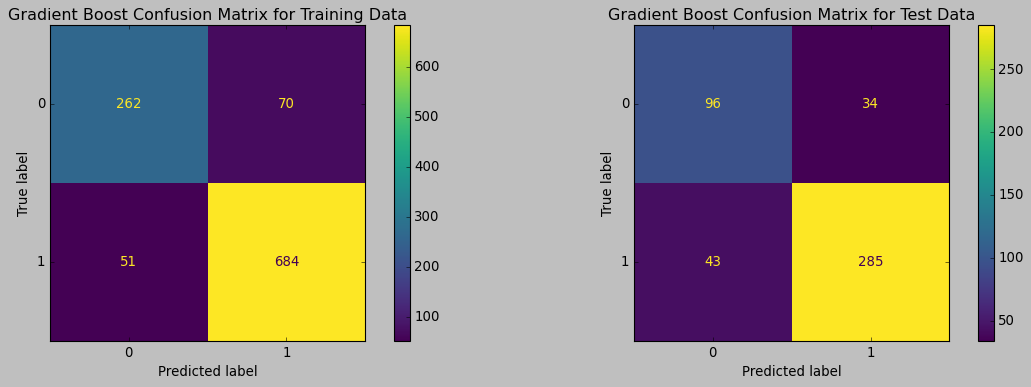

In [2277]:
# Create the confusion matrices
GBCL_cm_train = metrics.confusion_matrix(y_train, y_train_predict)
GBCL_cm_test = metrics.confusion_matrix(y_test, y_test_predict)

# Set up the matplotlib figure with 1 row and 2 columns
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Confusion matrix on the training data
GBCL_disp_train = ConfusionMatrixDisplay(confusion_matrix=GBCL_cm_train, display_labels=GBCL_model.classes_)
GBCL_disp_train.plot(ax=ax[0])
ax[0].set_title('Gradient Boost Confusion Matrix for Training Data')

# Confusion matrix on the test data
GBCL_disp_test = ConfusionMatrixDisplay(confusion_matrix=GBCL_cm_test, display_labels=GBCL_model.classes_)
GBCL_disp_test.plot(ax=ax[1])
ax[1].set_title('Gradient Boost Confusion Matrix for Test Data')

plt.tight_layout()
plt.show()

### Gradient Boost Classification Reports for the Training and Test Data

In [2278]:
# Generate classification reports
GBCL_report_test = metrics.classification_report(y_test, y_test_predict, output_dict=True)
GBCL_report_train = metrics.classification_report(y_train, y_train_predict, output_dict=True)

# Convert reports to DataFrames
df_GBCL_report_test = pd.DataFrame(GBCL_report_test).transpose()
df_GBCL_report_train = pd.DataFrame(GBCL_report_train).transpose()

# Round the DataFrames to 2 decimal places
df_GBCL_report_test = df_GBCL_report_test.round(2)
df_GBCL_report_train = df_GBCL_report_train.round(2)

# Concatenate both DataFrames along the columns axis for side-by-side display
df_GBCL_reports = pd.concat([df_GBCL_report_train.add_suffix('_train'), df_GBCL_report_test.add_suffix('_test')], axis=1)

# Display the concatenated DataFrame
print(df_GBCL_reports)

              precision_train  recall_train  f1-score_train  support_train  \
0                        0.84          0.79            0.81         332.00   
1                        0.91          0.93            0.92         735.00   
accuracy                 0.89          0.89            0.89           0.89   
macro avg                0.87          0.86            0.87        1067.00   
weighted avg             0.89          0.89            0.89        1067.00   

              precision_test  recall_test  f1-score_test  support_test  
0                       0.69         0.74           0.71        130.00  
1                       0.89         0.87           0.88        328.00  
accuracy                0.83         0.83           0.83          0.83  
macro avg               0.79         0.80           0.80        458.00  
weighted avg            0.84         0.83           0.83        458.00  


### Gradient Boost AUC and ROC Curves of the Train Data and Test Data

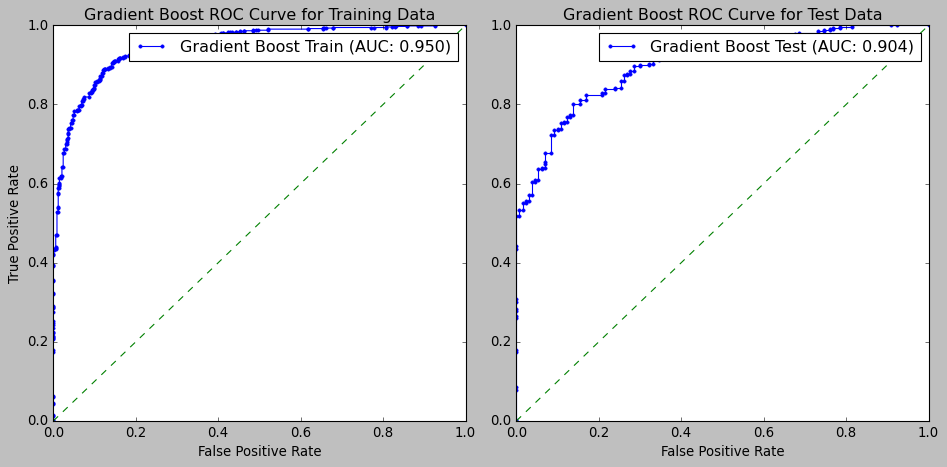

In [2279]:
from sklearn.metrics import roc_curve, roc_auc_score

# predict probabilities for train set
train_probs = GBCL_model.predict_proba(X_train)[:, 1]
# calculate AUC for train set
train_auc = roc_auc_score(y_train, train_probs)
# calculate roc curve for train set
train_fpr, train_tpr, _ = roc_curve(y_train, train_probs)

# predict probabilities for test set
test_probs = GBCL_model.predict_proba(X_test)[:, 1]
# calculate AUC for test set
test_auc = roc_auc_score(y_test, test_probs)
# calculate roc curve for test set
test_fpr, test_tpr, _ = roc_curve(y_test, test_probs)

# create subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# plot roc curve for the train set
ax[0].plot(train_fpr, train_tpr, marker='.', label='Gradient Boost Train (AUC: %.3f)' % train_auc)
ax[0].plot([0, 1], [0, 1], linestyle='--')
ax[0].set_title('Gradient Boost ROC Curve for Training Data')
ax[0].set_xlabel('False Positive Rate')
ax[0].set_ylabel('True Positive Rate')
ax[0].legend()

# plot roc curve for the test set
ax[1].plot(test_fpr, test_tpr, marker='.', label='Gradient Boost Test (AUC: %.3f)' % test_auc)
ax[1].plot([0, 1], [0, 1], linestyle='--')
ax[1].set_title('Gradient Boost ROC Curve for Test Data')
ax[1].set_xlabel('False Positive Rate')
ax[1].legend()

# show the plot
plt.tight_layout()
plt.show()

### Cross Validation on Gradient Boost Model

In [2280]:
from sklearn.model_selection import cross_val_score
GBCL_train_scores = cross_val_score(GBCL_model, X_train, y_train, cv=5)
GBCL_train_scores

array([0.78504673, 0.8364486 , 0.83098592, 0.86384977, 0.79812207])

In [2281]:
GBCL_test_scores = cross_val_score(GBCL_model, X_test, y_test, cv=5)
GBCL_test_scores

array([0.81521739, 0.79347826, 0.79347826, 0.85714286, 0.81318681])

In [2282]:
print("The Gradient Boost Model's Mean Accuracy Score after Cross Validation on Train Data is", np.mean(GBCL_train_scores).round(2))
print("The Gradient Boost Model's Mean Accuracy Score after Cross Validation on Test Data is",np.mean(GBCL_test_scores).round(2))

The Gradient Boost Model's Mean Accuracy Score after Cross Validation on Train Data is 0.82
The Gradient Boost Model's Mean Accuracy Score after Cross Validation on Test Data is 0.81
[CV] END ...............learning_rate=0.01, n_estimators=100; total time=   0.2s
[CV] END .................learning_rate=0.1, n_estimators=50; total time=   0.1s
[CV] END ................learning_rate=0.1, n_estimators=100; total time=   0.1s
[CV] END ...................learning_rate=1, n_estimators=50; total time=   0.1s
[CV] END ..................learning_rate=1, n_estimators=100; total time=   0.1s
[CV] END ................learning_rate=0.01, n_estimators=50; total time=   0.1s
[CV] END ...............learning_rate=0.01, n_estimators=200; total time=   0.2s
[CV] END ................learning_rate=0.1, n_estimators=200; total time=   0.3s
[CV] END ...............learning_rate=0.01, n_estimators=100; total time=   0.1s
[CV] END .................learning_rate=0.1, n_estimators=50; total time=   0.1s
[CV] EN

### SMOTE on Gradient Boost

In [2283]:
GBCL_SM_model = GradientBoostingClassifier(random_state=1)
GBCL_SM_model.fit(X_train_res, y_train_res)

GradientBoostingClassifier(random_state=1)

In [2284]:
## Performance Matrix on train data set with SMOTE
y_train_predict = GBCL_SM_model.predict(X_train_res)
model_score = GBCL_SM_model.score(X_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, y_train_predict))
print(metrics.classification_report(y_train_res ,y_train_predict))

0.8993197278911564
[[670  65]
 [ 83 652]]
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       735
           1       0.91      0.89      0.90       735

    accuracy                           0.90      1470
   macro avg       0.90      0.90      0.90      1470
weighted avg       0.90      0.90      0.90      1470



In [2286]:
## Performance Matrix on test data set
y_test_predict = GBCL_SM_model.predict(X_test)
model_score = GBCL_SM_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8187772925764192
[[107  23]
 [ 60 268]]
              precision    recall  f1-score   support

           0       0.64      0.82      0.72       130
           1       0.92      0.82      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.82      0.79       458
weighted avg       0.84      0.82      0.82       458



### Hypertuning parameters of Gradient Boost Model using Grid Search CV

To use Grid Search CV for hyperparameter tuning of a Gradient Boosting model, we'll need to focus on the hyperparameters specific to Gradient Boosting. Gradient Boosting is a powerful machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees.

The key hyperparameters in Gradient Boosting include:

1. n_estimators: The number of boosting stages to be run. Gradient Boosting is fairly robust to over-fitting, so a large number usually results in better performance.
2. learning_rate: How much each additional decision tree influences the overall prediction. Lower rates lead to better generalization but require more trees.
3. max_depth: The maximum depth of the individual regression estimators. Controls how deep each tree is allowed to grow during any boosting round.
4. min_samples_split: The minimum number of samples required to split an internal node.
5. min_samples_leaf: The minimum number of samples required to be at a leaf node.
6. max_features: The number of features to consider when looking for the best split.

Here's a step-by-step guide to use Grid Search CV with Gradient Boosting:

Define Parameter Grid:
Create a dictionary with parameters and ranges you want to tune.

Initialize Grid Search:
Set up Grid Search CV with the Gradient Boosting model, parameter grid, and scoring metric. Specify the number of folds for cross-validation.

Fit Grid Search on Training Data:
Run the grid search to find the best parameters.

Evaluate the Best Model:
After fitting, evaluate the best model found by Grid Search on your test data.

In [2287]:
# Define the parameter grid
param_grid_gradient_boosting = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2', None]
}

# Initialize the Grid Search model
grid_gradient_boosting = GridSearchCV(GradientBoostingClassifier(), param_grid_gradient_boosting, cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_gradient_boosting.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_gradient_boosting.best_params_)

# Evaluate the best model
best_model_gradient_boosting = grid_gradient_boosting.best_estimator_
train_accuracy_gradient_boosting = best_model_gradient_boosting.score(X_train, y_train).round(2)
test_accuracy_gradient_boosting = best_model_gradient_boosting.score(X_test, y_test).round(2)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


/Users/admin/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/admin/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/admin/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/admin/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of 

Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}


In [2288]:
print(f"Gradient Boost Training Accuracy after Hypertuning Parameters using Grid Search CV is: {train_accuracy_gradient_boosting}")
print(f"Gradient Boost Test Accuracy after Hypertuning Parameters using Grid Search CV is: {test_accuracy_gradient_boosting}")

Gradient Boost Training Accuracy after Hypertuning Parameters using Grid Search CV is: 0.85
Gradient Boost Test Accuracy after Hypertuning Parameters using Grid Search CV is: 0.84


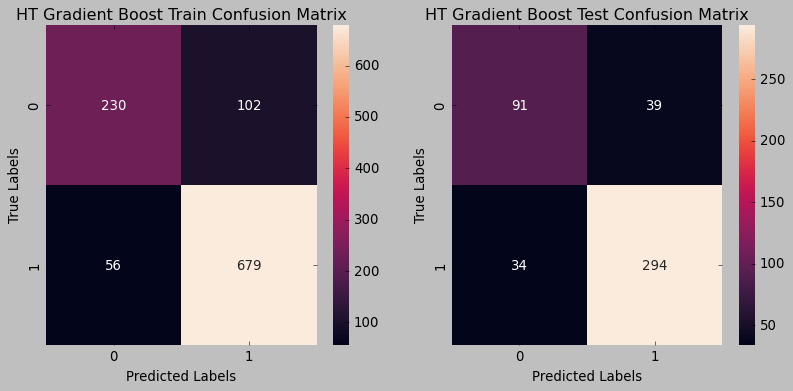

Classification Report - Training Data
              precision    recall  f1-score   support

           0       0.80      0.69      0.74       332
           1       0.87      0.92      0.90       735

    accuracy                           0.85      1067
   macro avg       0.84      0.81      0.82      1067
weighted avg       0.85      0.85      0.85      1067


Classification Report - Test Data
              precision    recall  f1-score   support

           0       0.73      0.70      0.71       130
           1       0.88      0.90      0.89       328

    accuracy                           0.84       458
   macro avg       0.81      0.80      0.80       458
weighted avg       0.84      0.84      0.84       458



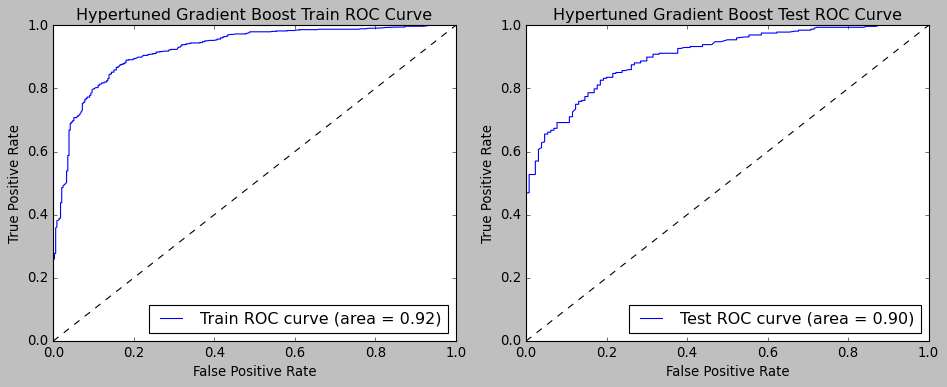

[CV] END learning_rate=0.01, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.01

In [2289]:
# Confusion Matrix after Hypertuning
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

conf_matrix_train = confusion_matrix(y_train, best_model_gradient_boosting.predict(X_train))
conf_matrix_test = confusion_matrix(y_test, best_model_gradient_boosting.predict(X_test))

sns.heatmap(conf_matrix_train, annot=True, ax=ax[0], fmt='g')
ax[0].set_title('HT Gradient Boost Train Confusion Matrix')
ax[0].set_xlabel('Predicted Labels')
ax[0].set_ylabel('True Labels')

sns.heatmap(conf_matrix_test, annot=True, ax=ax[1], fmt='g')
ax[1].set_title('HT Gradient Boost Test Confusion Matrix')
ax[1].set_xlabel('Predicted Labels')
ax[1].set_ylabel('True Labels')

plt.show()

# Classification Report after Hypertuning
print("Classification Report - Training Data")
print(classification_report(y_train, best_model_gradient_boosting.predict(X_train)))
print("\nClassification Report - Test Data")
print(classification_report(y_test, best_model_gradient_boosting.predict(X_test)))

# ROC AUC Curve after Hypertuning
y_train_prob = best_model_gradient_boosting.predict_proba(X_train)[:, 1]
y_test_prob = best_model_gradient_boosting.predict_proba(X_test)[:, 1]

fpr_train, tpr_train, _ = roc_curve(y_train, y_train_prob)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)

roc_auc_train = auc(fpr_train, tpr_train)
roc_auc_test = auc(fpr_test, tpr_test)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Train ROC Curve
ax[0].plot(fpr_train, tpr_train, label=f'Train ROC curve (area = {roc_auc_train:.2f})')
ax[0].plot([0, 1], [0, 1], 'k--')
ax[0].set_xlabel('False Positive Rate')
ax[0].set_ylabel('True Positive Rate')
ax[0].set_title('Hypertuned Gradient Boost Train ROC Curve')
ax[0].legend(loc='lower right')

# Test ROC Curve
ax[1].plot(fpr_test, tpr_test, label=f'Test ROC curve (area = {roc_auc_test:.2f})')
ax[1].plot([0, 1], [0, 1], 'k--')
ax[1].set_xlabel('False Positive Rate')
ax[1].set_ylabel('True Positive Rate')
ax[1].set_title('Hypertuned Gradient Boost Test ROC Curve')
ax[1].legend(loc='lower right')

plt.tight_layout()
plt.show()



## F. Final Model Selection - Compare all the model built so far - Select the final model with the proper justification - Check the most important features in the final model and draw inferences

### Premise for Comparing and Selecting the Final Model:

1. The model with the highest overall F1 score for the test set is the Random Forest model with Grid Search CV hyperparameter tuning. For the Labour party (class 1), this model achieved an F1 score of 87%
2. The model with the highest F1 score for the minority class (Conservative Party) in the test data is the Bagging model, after the application of Grid Search CV. This model achieved an F1 score of 70% for the minority class in the test set. 
3. The model with the highest overall precision for the test set is the Ada Boost model. For the Labour party (class 1), which is the majority class, the precision was 88%, indicating that 88% of the predictions for the Labour party were correct. This high precision score demonstrates the model's effectiveness in accurately identifying the majority class in the test data. 
4. The Bagging model has the highest precision for the minority class (Conservative party, class 0) in the test set, achieving a precision of 100%. This means that all of the predictions made by the Bagging model for the Conservative party in the test set were correct 
5. The model with the highest overall recall for the test set is the Random Forest model. It achieved a recall of 87% for the Labour party (class 1), indicating its effectiveness in correctly identifying the majority class in the test data 
6. The K-Nearest Neighbors (KNN) model, after applying the Synthetic Minority Oversampling Technique (SMOTE), achieved the highest recall for the minority class (Conservative Party) on the test data, with a recall of 84%. This indicates that the KNN model, particularly after SMOTE was applied, was most effective in correctly identifying instances of the minority class in the test set among the models evaluated. 
7. The K-Nearest Neighbors (KNN) model, with the number of neighbors (K) set to 7, achieved the highest accuracy on the test data, with an accuracy score of 84%. This indicates that the KNN model, under these specific parameters, was the most effective in predicting voter preferences in the test set among the models evaluated in the project. 

### Objective based on Problem Statement:

Our objective is to leverage machine learning to build a predictive model capable of forecasting which political party a voter is likely to support. This predictive model, developed based on the provided information, will serve as the foundation for creating an exit poll. The exit poll aims to contribute to the accurate prediction of the overall election outcomes, including determining which party is likely to secure the majority of seats. 

### Task:

Give our premise and objective, our task is to compare all the model built so far and select the final model with the proper justification.


### Selecting the Final Model:

Given the objective of forecasting voter preferences to create an accurate exit poll, it's crucial to select a model that balances accuracy, precision, recall, and F1 score effectively. Here's a summary of the models and their performance on the test set:

1.	Random Forest with Grid Search CV:
• Highest overall F1 score: 87% for Labour party (class 1)
• Highest overall Recall: 87% for Labour party (class 1)
• Performs well in identifying the majority class, but may have limitations in predicting the minority class.

2.	Bagging Model with Grid Search CV:
•	Highest F1 score for the minority class: 70%
•	Highest Precision for the minority class: 100%
•	Excellent in predicting the minority class but may not be as effective for the majority class.

3.	Ada Boost Model:
•	Highest overall Precision: 88% for Labour party (class 1)
•	Strong in accurately identifying the majority class.

4.	K-Nearest Neighbors (KNN) with SMOTE:
•	Highest Recall for minority class: 84% for Conservative party (class 0)
•	Effective in identifying instances of the minority class but may not be as precise.

5.	K-Nearest Neighbors (KNN):
•	Highest Accuracy: 84%
•	Good general performance but doesn't excel in any specific area.

### Selection Justification:

•	Overall Performance: The Random Forest model with Grid Search CV demonstrates a strong balance between recall and F1 score, especially for the majority class, which is crucial for exit polls.
•	Predicting Minority Class: The Bagging model excels in precision for the minority class. However, its lower F1 score suggests it might not be as balanced as the Random Forest model.
•	Majority Class Prediction: The Ada Boost model shows high precision for the majority class but may not balance well with minority class prediction.
•	Balanced Accuracy: The KNN model, while having the highest accuracy, does not particularly excel in precision or recall for any class.

### Final Model Selection: 

The Random Forest model with Grid Search CV is recommended as the final model. 

It provides a well-balanced approach with high overall recall and F1 score, crucial for an accurate and comprehensive exit poll. 

This model is likely to offer the best combination of identifying both majority and minority class voters, thus ensuring a more accurate prediction of overall election outcomes.

### Inferences drawn from Feature Importance of Final Model Selection - Random Forest model with Grid Search CV: 

Here's what we can infer from the Feature Importance data:

1. Hague (24.8%): This is the most important feature for the model, implying that the Hague ratings is the most significant predictor for the outcome variable which is the voting preference – Conservative or Labour.
2. Europe (22.54%): This feature, related to opinions regarding Europe Integration, is the second most important, suggesting that it has a strong influence on the model's predictions.
3. Blair (17.46%): Another significant predictor, which could be related to ratings associated with Blair.
4. Age (12.3%): This indicates that the age of the respondents is a moderately strong predictor, which is logical as age can influence political preferences.
5. Political Knowledge (8.86%): The respondent's political knowledge is somewhat influential. This could relate to how informed a person is about politics and how that knowledge affects their voting behavior.
6. Economic Conditions - National (7.37%) and Household (4.69%): These suggest that perceptions of the national and household economic conditions are also important, but less so than the top three features.
7. Gender_Male (1.92%): The least important feature among those listed, indicating that gender has a relatively small but still significant influence on the predictions.

In summary, the model places the most importance on specific political figures/issues (Hague and Blair) and the broader topic of Europe, indicating these are key drivers in the voting behavior as captured in the dataset used. 

Economic conditions and demographic features like age and gender also play a role, but to a lesser extent. These insights can help political analysts understand what factors are most influential in voter decision-making.


## G. Actionable Insights & Recommendations - Compare all four models - Conclude with the key takeaways for the business

### Model Performance Metrics Summary:

1)	K-Nearest Neighbors (KNN): Exhibits the highest accuracy among all models at 84%, making it the most reliable for consistently correct predictions across the board. With SMOTE, it also has the best recall for the minority class, essential for capturing the complete picture of this voter segment.

2)	Random Forest with Grid Search CV: This model stands out with the highest F1 score for the Labour party, indicating an excellent balance of precision and recall, making it ideal for analyzing the majority class voter tendencies.

3)	Bagging with Grid Search CV: Offers the highest F1 score for the Conservative party, the minority class in this context, along with perfect precision, ensuring that predictions for this group are both accurate and reliable.

4)	Ada Boost: Achieves the top precision for the Labour party, which is particularly valuable when the accuracy of predictions for the majority class is a priority.

### In-Depth Insights:

1)	The importance attributed to Hague and Blair in the Random Forest model suggests that voters are significantly influenced by key political personalities, potentially more than by party platforms or other issues.

2)	European Integration sentiment stands as a crucial issue, pointing to the importance of regional and international concerns in shaping voter preferences, perhaps due to the implications of policies related to European integration or trade.

3)	The demographic feature "age" has a moderate influence, signifying potential variations in political preference across different age groups, possibly driven by factors such as values, life stage, or historical context.

4)	The minor influence of "political knowledge" could imply that the electorate may be swayed by the charisma or visibility of political figures rather than detailed policy knowledge or political literacy.

5)	Economic indicators are less prominent compared to political figures and European issues, but they still play a role, suggesting that while voters care about the economy, it may not be their primary concern at the polls.

6)	The minimal importance of "gender_male" suggests that while gender may have some impact, it's not a defining factor in voter behavior within the dataset.

### Business Recommendations for CNBE News Channel:

1)	CNBE must focus programming and political analysis on the impact of individual politicians like Hague and Blair, using the Random Forest model's insights to understand how these figures may influence the overall election outcome.

2)	CNBE must investigate and report on European affairs thoroughly, tapping into the audience's concern about these issues and using this focus to differentiate CNBE's content from competitors.

3)	Advised to design age-centric content to address the distinct political priorities seen across different age demographics, possibly including retrospective segments on how past political eras shape current voting patterns.

4)	While recognizing that political knowledge isn't a leading factor, CNBE must provide educational segments to improve political literacy, which could increase the engagement of viewers and their loyalty to the channel.

5)	Recommended to cover economic conditions in a balanced way, contextualizing them within political debates rather than as standalone issues, which aligns with their lower relative importance in voter decision-making.

6)	Treat gender as one of several demographic factors to consider when analysing voting trends, not overemphasizing it but not neglecting it either.

7)	Regularly incorporate the latest voter behavior data to update the channel's predictive models, ensuring that election coverage remains accurate and relevant.

8)	Offer interactive digital platforms for viewers to see how their preferences compare with broader trends, potentially increasing viewer interaction and data collection opportunities.

9)	Regularly reassess the importance of various features in predictive models to adjust the channel's focus and strategy in real-time.

10)	Utilize a mix of models for comprehensive analysis, using Ada Boost for segments requiring high precision for the majority class and KNN for general trends due to its overall accuracy.

By implementing these recommendations, CNBE News Channel can provide more nuanced, accurate, and engaging political reporting that caters to the needs of a diverse viewership.


## Problem 2
 

### In this particular project, we are going to work on the inaugural corpora from the nltk in Python. We will be looking at the following speeches of the Presidents of the United States of America:

### President Franklin D. Roosevelt in 1941
### President John F. Kennedy in 1961
### President Richard Nixon in 1973


In [2294]:
import nltk
nltk.download('inaugural')
from nltk.corpus import inaugural
inaugural.fileids()
inaugural.raw('1941-Roosevelt.txt')
inaugural.raw('1961-Kennedy.txt')
inaugural.raw('1973-Nixon.txt')

[nltk_data] Downloading package inaugural to /Users/admin/nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


'Mr. Vice President, Mr. Speaker, Mr. Chief Justice, Senator Cook, Mrs. Eisenhower, and my fellow citizens of this great and good country we share together:\n\nWhen we met here four years ago, America was bleak in spirit, depressed by the prospect of seemingly endless war abroad and of destructive conflict at home.\n\nAs we meet here today, we stand on the threshold of a new era of peace in the world.\n\nThe central question before us is: How shall we use that peace? Let us resolve that this era we are about to enter will not be what other postwar periods have so often been: a time of retreat and isolation that leads to stagnation at home and invites new danger abroad.\n\nLet us resolve that this will be what it can become: a time of great responsibilities greatly borne, in which we renew the spirit and the promise of America as we enter our third century as a nation.\n\nThis past year saw far-reaching results from our new policies for peace. By continuing to revitalize our traditional

### Problem 2 
### A. Define the problem and Perform Exploratory Data Analysis
### -Problem Definition - Find the number of Character, words & sentences in all three speeches

#### The problem we are looking at here is that of drawing meaning out of these speeches by converting these unstructured data into structured data by converting them into a form which can be used for Semantic Analysis and Sentiment Analysis. 

In [2295]:
# File IDs for the speeches
file_ids = ['1941-Roosevelt.txt', '1961-Kennedy.txt', '1973-Nixon.txt']

In [2296]:
# Initialize dictionaries to store counts
char_counts = {}
word_counts = {}
sent_counts = {}

In [2297]:
# Calculate the counts for each speech
for file_id in file_ids:
    # Number of characters
    char_counts[file_id] = len(inaugural.raw(file_id))
    
    # Number of words
    word_counts[file_id] = len(inaugural.words(file_id))
    
    # Number of sentences
    sent_counts[file_id] = len(inaugural.sents(file_id))

# Display the results
print("Character Counts:", char_counts)
print("Word Counts:", word_counts)
print("Sentence Counts:", sent_counts)

Character Counts: {'1941-Roosevelt.txt': 7571, '1961-Kennedy.txt': 7618, '1973-Nixon.txt': 9991}
Word Counts: {'1941-Roosevelt.txt': 1536, '1961-Kennedy.txt': 1546, '1973-Nixon.txt': 2028}
Sentence Counts: {'1941-Roosevelt.txt': 68, '1961-Kennedy.txt': 52, '1973-Nixon.txt': 69}


### Problem 2 
### B. Text cleaning
### Stopword removal - Stemming - find the 3 most common words used in all three speeches

In [2298]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from collections import Counter

In [2299]:
# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /Users/admin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/admin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2300]:
# Initialize the stemmer
stemmer = PorterStemmer()

In [2301]:
# File IDs for the speeches
file_ids = ['1941-Roosevelt.txt', '1961-Kennedy.txt', '1973-Nixon.txt']

In [2302]:
# Initialize a list to store all words from the speeches
all_words = []

In [2303]:
# Load, clean, and tokenize each speech
for file_id in file_ids:
    text = inaugural.raw(file_id).lower()  # Lowercasing
    tokens = word_tokenize(text)  # Tokenization
    tokens = [word for word in tokens if word.isalpha()]  # Remove non-alphabetic tokens
    tokens = [word for word in tokens if word not in nltk.corpus.stopwords.words('english')]  # Stopword removal
    tokens = [stemmer.stem(word) for word in tokens]  # Stemming
    all_words.extend(tokens)
all_words

['nation',
 'day',
 'inaugur',
 'sinc',
 'peopl',
 'renew',
 'sens',
 'dedic',
 'unit',
 'state',
 'washington',
 'day',
 'task',
 'peopl',
 'creat',
 'weld',
 'togeth',
 'nation',
 'lincoln',
 'day',
 'task',
 'peopl',
 'preserv',
 'nation',
 'disrupt',
 'within',
 'day',
 'task',
 'peopl',
 'save',
 'nation',
 'institut',
 'disrupt',
 'without',
 'us',
 'come',
 'time',
 'midst',
 'swift',
 'happen',
 'paus',
 'moment',
 'take',
 'stock',
 'recal',
 'place',
 'histori',
 'rediscov',
 'may',
 'risk',
 'real',
 'peril',
 'inact',
 'live',
 'nation',
 'determin',
 'count',
 'year',
 'lifetim',
 'human',
 'spirit',
 'life',
 'man',
 'year',
 'ten',
 'littl',
 'littl',
 'less',
 'life',
 'nation',
 'full',
 'measur',
 'live',
 'men',
 'doubt',
 'men',
 'believ',
 'democraci',
 'form',
 'govern',
 'frame',
 'life',
 'limit',
 'measur',
 'kind',
 'mystic',
 'artifici',
 'fate',
 'unexplain',
 'reason',
 'tyranni',
 'slaveri',
 'becom',
 'surg',
 'wave',
 'futur',
 'freedom',
 'eb',
 'tide',

In [2304]:
# Count word frequencies
word_freq = Counter(all_words)

# Find the three most common words
most_common_words = word_freq.most_common(3)

# Display the results
print(most_common_words)

[('us', 46), ('nation', 40), ('let', 39)]


### Problem 2
### C. Plot Word cloud of all three speeches
### Show the most common words used in all three speeches in the form of word clouds

In [2305]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [2306]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2307]:
# Concatenate the text from all speeches
full_text = ''
for file_id in file_ids:
    text = inaugural.raw(file_id).lower()
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word.isalpha()]
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    tokens = [stemmer.stem(word) for word in tokens]
    full_text += ' '.join(tokens)

In [2308]:
# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(full_text)

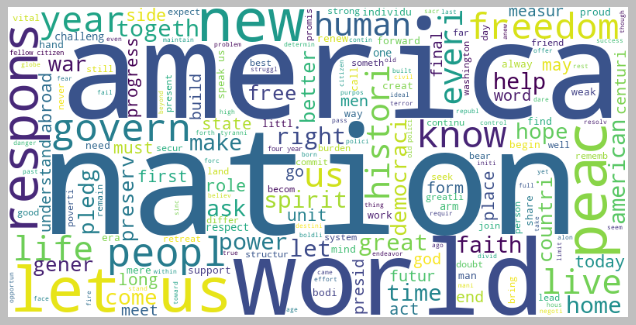

In [2309]:
# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Insights from WordCloud

The word cloud generated from the inaugural speeches of Roosevelt (1941), Kennedy (1961), and Nixon (1973) provides a visual representation of the most frequently used words. Here are some insights based on the word cloud:

**Common Themes**: The largest words like "people," "nation," "America," "must," "us," "new," and "peace" suggest key themes. These words are likely to be central to the messages conveyed in the speeches, highlighting focus on the American people, the nation's unity, and perhaps a call for peace which would be fitting given the historical contexts of these speeches.

**National Spirit and Unity**: Words such as "America," "nation," "home," and "country" indicate a strong emphasis on national identity and unity. This is common in inaugural addresses, which often aim to unite the country and set a collective direction.

**Responsibility and Action**: The prominence of words like "must," "can," and "responsibility" points to a call to action or a sense of duty that the Presidents were likely instilling in their messages. They emphasize the need for action, possibly in response to the specific challenges of their times.

**Vision and Future Orientation**: Words such as "new," "year," "era," and "future" suggest a forward-looking perspective, which is typical of inaugural speeches as they often outline the incoming administration's vision.

**Emphasis on Values**: The visibility of words like "faith," "free," "freedom," "live," and "spirit" reflects an appeal to American values and ideals, which are commonly invoked as guiding principles.

**Peace and Challenges**: The word "peace" stands out, which could indicate a focus on foreign policy, international relations, or a desire for domestic tranquility. This would align with the post-Depression era of Roosevelt, the Cold War backdrop for Kennedy, and the Vietnam War period for Nixon.

**Inclusiveness and Togetherness**: The repeated use of "us" and "people" underscores a message of inclusiveness and collective effort.

**Action Words**: The presence of verbs like "know," "make," "ask," "bear," and "live" suggests a dynamic and active tone, encouraging engagement and participation from the audience.

The word cloud visually emphasizes the most recurrent and salient words, providing a quick way to gauge the main messages and themes the Presidents chose to focus on in their addresses. It's important to note that this interpretation is based on the frequency and prominence of words and doesn't account for the context in which they were used. 